<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Creating anime characters using Deep Convolutional Generative Adversarial Networks (DCGANs) and Keras**


Estimated time needed: **60** minutes


Imagine if you are in a video game company, your games is famous for its unique characters for every player. With the growth of the player amount, it comes to be a nearly impossible mission to hand plot the characters for millions of players. Your boss plans to keep the unique character creating function in the game, and you need a method to handle the task. <br>

__Generative adversarial networks (GANs) might help!__<br>
It is a class of machine learning frameworks, first published in June 2014 <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>. <br>
GANs could generate new data following the statistic features of the data in the training set. GANs is widely used to generate new and realistic photograph that is authentic to human observers. <br>

Convolutional networks (CNNs) has seen huge adoption in computer vision applications. Applying the CNNs to GANs models could help us in building a photo generating model. The combined method is called Deep Convolutional Generative Adversarial Networks (DCGANs). <br>

In this lab, we will first focus on simulated data to better understand GANs. <br>
Further, we will use the case of massive anime avatar production to introduce how to use DCGANs.<br>
__You will create anime characters like the ones below in this project.__

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/face_cartton.png" width="700" alt="Skills Network Logo">


----
<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown4.jpeg" width="50%"></center>


## __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="#Basic:-Generative-Adversarial-Networks-(GANs)">Basic: Generative Adversarial Networks (GANs)</a>
        <ol>
            <li><a href="#Introduction">Introduction</a></li>
            <li><a href="#Toy-Data">Toy Data</a></li>
            <li><a href="#The-Generator">The Generator</a></li>
            <li><a href="#The-Loss-Function-GANs-(Optional)">The Loss Function GANs (Optional)</a></li>
            <li><a href="#Training-GANs">Training GANs</a></li>
        </ol>
    </li>
    <li>
        <a href="#Deep-Convolutional-Generative-Adversarial-Networks-(DCGANs)">Deep Convolutional Generative Adversarial Networks (DCGANs)</a></li>
        <ol>
            <li><a href="#Case-background">Case background</a></li>
            <li><a href="#Loading-the-Dataset">Loading the Dataset</a></li>
            <li><a href="#Creating-Data-Generator">Creating Data Generator</a></li>
            <li><a href="#Generator-and-Discriminator-(for-DCGANs)">Generator and Discriminator  (for DCGANs)</a></li>
            <li><a href="#Defining-Loss-Functions">Defining Loss Functions</a></li>
            <li><a href="#Defining-Optimizers">Defining Optimizers</a></li>
            <li><a href="#Create-Train-Step-Function">Create Train Step Function</a></li>
            <li><a href="#Training-DCGANs">Training DCGANs</a></li>
        </ol>
    <li>
    <a href="#Explore-Latent-Variables">Explore Latent Variables</a>
        <ol>
            <li><a href="#Exercise-1">Exercise 1</a></li>
            <li><a href="#Exercise-2">Exercise 2</a></li>
            <li><a href="#Exercise-3">Exercise 3</a></li>
        </ol>
    </li>
</ol>


## Objectives

After completing this lab, you will be able to:

- __Understand__ the original formulation of GANs, and their two separately trained networks: Generator and Discriminator
- __Implement__ GANs on simulated and real datasets
- __Apply__ DCGANs to a dataset
- __Understand__ how to train DCGANs
- __Generate__ an image using a DCGAN
- __Understand__ how changing the input of the latent space of DCGANs changes the generated image


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`keras`](https://keras.io/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for loading datasets.
*   [`tensorflow`](https://www.tensorflow.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and neural network related functions.




### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:

_You need ~30 seconds to install._


In [2]:
!mamba install -qy tqdm

/bin/bash: line 1: mamba: command not found


Run the following upgrade and then **RESTART YOUR KERNEL**. Make sure the version of tensorflow imported below is **no less than 2.9.0**.


In [3]:
!pip3 install  --upgrade tensorflow

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_

_You need ~1 minute to import._


In [4]:
!pip install skillsnetwork

In [5]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
print(f"tensorflow version: {tf.__version__}")
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2DTranspose,BatchNormalization,ReLU,Conv2D,LeakyReLU
import time

import keras

from IPython import display
import skillsnetwork
print(f"skillsnetwork version: {skillsnetwork.__version__}")

import matplotlib.pyplot as plt
%matplotlib inline

import os
from os import listdir
from pathlib import Path
import imghdr

from tqdm import tqdm

tensorflow version: 2.18.0
skillsnetwork version: 0.21.9


### Defining Helper Functions


In [6]:
# This function will allow us to easily plot data taking in x values, y values, and a title
def plot_distribution(real_data,generated_data,discriminator=None,density=True):

    plt.hist(real_data.numpy(), 100, density=density, facecolor='g', alpha=0.75, label='real data')
    plt.hist(generated_data.numpy(), 100, density=density, facecolor='r', alpha=0.75,label='generated data q(z) ')

    if discriminator:
        max_=np.max([int(real_data.numpy().max()),int(generated_data.numpy().max())])
        min_=np.min([int(real_data.numpy().min()),int(generated_data.numpy().min())])
        x=np.linspace(min_, max_, 1000).reshape(-1,1)
        plt.plot(x,tf.math.sigmoid(discriminator(x,training=False).numpy()),label='discriminator',color='k')
        plt.plot(x,0.5*np.ones(x.shape),label='0.5',color='b')
        plt.xlabel('x')

    plt.legend()
    plt.show()

def plot_array(X,title=""):

    plt.rcParams['figure.figsize'] = (20,20)

    for i,x in enumerate(X[0:5]):
        x=x.numpy()
        max_=x.max()
        min_=x.min()
        xnew=np.uint(255*(x-min_)/(max_-min_))
        plt.subplot(1,5,i+1)
        plt.imshow(xnew)
        plt.axis("off")

    plt.show()

----


## Basic: Generative Adversarial Networks (GANs)


### Introduction


__Generative Adversarial Networks (GANs)__ are generative models that convert random samples of one distribution into another distribution. They have several applications, like the following:

*  Generate Examples for Image Datasets
*  Generate Photographs of Human Faces
*  Generate Realistic Photographs
*  Generate Cartoon Characters
*  Image-to-Image Translation
*  Text-to-Image Translation
*  Face Frontal View Generation
*  Generate New Human Poses
*  Face Aging
*  Photo Blending
*  Super Resolution
*  Photo Inpainting
*  Clothing Translation
*  Video Prediction

In this GANs section of the Lab, we will use a toy example to help understand the __basic theoretical principles__ behind GANs. The original form of GANs consisted of a __discriminator__ and a __generator__; let's use the analogy of a currency forger and the police.

The Generator is the currency forger, and the output is the counterfeit, for example, a 100-dollar bill. The discriminator is analogous to the police taking the counterfeit and trying to determine if it's real by comparing it to a real $100 bill. In real life, if the counterfeit is easy to detect, the forger will adapt; conversely, the police will also improve; GANs emulate this game of cat and mouse.  

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/General%20diagram.png" alt="generator image" width="700px"></center>

What makes GANs interesting is that the __discriminator and generator continuously improve__ each other by a well-formulated cost function that backpropagates the errors. GANs are a family of algorithms that use _learning by comparison_. In the lab, we will review the original formulation and use a simulated dataset. We will also point you to some more advanced methods and issues you will encounter with the real datasets for the next lab.


### Toy Data

Consider the following data, $\mathbf{x}$, that is normally distributed $\mathbf{x} \sim \mathcal{N}(\mathbf{x}|10,1) $ with a mean of 10 and a standard deviation of 1. Now we would like to randomly sample data from this distribution.


In [7]:
mean = [10]
cov = [[1]]
X = tf.random.normal((5000,1),mean=10,stddev=1.0)

print("mean:",np.mean(X))
print("standard deviation:",np.std(X))

mean: 10.015262
standard deviation: 1.0061831


We also have the data sample, z, which is also normally distributed $\mathbf{z} \sim \mathcal{N}(\mathbf{z}|0,2) $, with mean of 0 and a standard deviation of 2:



In [8]:
Z = tf.random.normal((5000,1),mean=0,stddev=2)

In [9]:
print("mean:",np.mean(Z))
print("standard deviation:",np.std(Z))

mean: -0.04032379
standard deviation: 2.008195


Let's compare the two distributions:


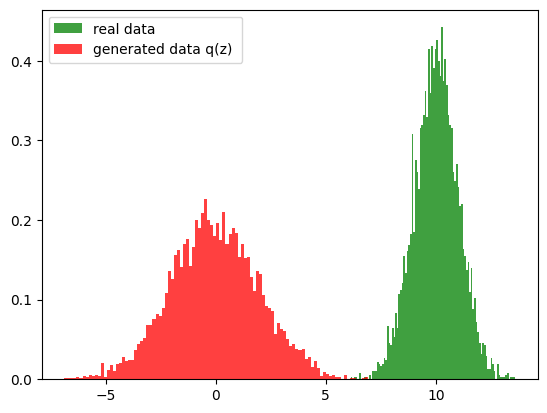

In [10]:
plot_distribution(X,Z,discriminator=None,density=True)

Let's create our first generative model by adding 10 to every sample of $z$. We will call the result $\hat{\mathbf{x}}$  as it's an approximation of $\mathbf{x}$. It is not too difficult to show that $\hat{\mathbf{x}} \sim \mathcal{N}(\mathbf{x}|10,1)$.Xhat=Z+10


In [11]:
Xhat=Z+10

We see that the mean and standard deviation are almost identical


In [12]:
print("mean:",np.mean(Xhat))
print("standard deviation:",np.std(Xhat))

mean: 9.959677
standard deviation: 2.0081952


Similarly for the histograms


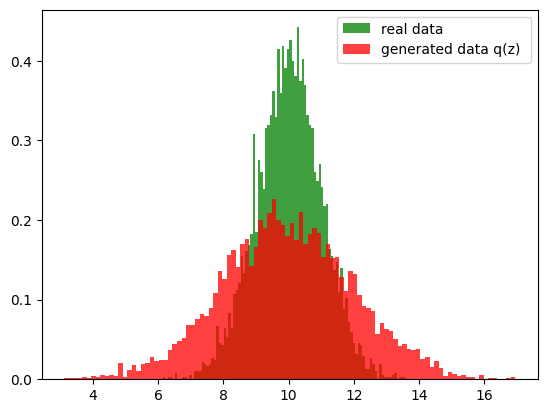

In [13]:
plot_distribution(X,Xhat,discriminator=None,density=True)

In the case above, since we just add 10 to the latent variable $z$, we transform $z$ using a deterministic function. We can call this an implicit generative model.


### The Generator


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/Unknown.png" width="300px">

There are two networks involved in a GAN, the Generator and the Discriminator. Let's understand the Generator network first.

The Generator is a neural network denoted by $G$; the idea is that a neural network can approximate any function (by the [Universal Approximation Theorem](https://en.wikipedia.org/wiki/Universal_approximation_theorem?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01)), so you should be able to generate data samples from any type of distribution.

Our goal is to convert the samples, $\mathbf{z}$, to one that approximates $\hat{\mathbf{x}}$,  i.e $\hat{\mathbf{x}}=G(\mathbf{z})$. Let's build a simple Generator $G(\mathbf{z})=\mathbf{W}^{T}\mathbf{z}+\mathbf{b} $ using Keras.

The following is a function that outputs a generator using Kera's Sequential model object.


In [14]:
def make_generator_model():
    generator = tf.keras.Sequential()
    generator.add(layers.Dense(1))
    return generator

We can use the Generator to convert $\mathbf{z}$ and make a prediction $\hat{\mathbf{x}}$, and display the histogram of the distributions of $\hat{\mathbf{x}}$ and $\mathbf{x}$. As the model is not trained, the trained distributions are quite different:


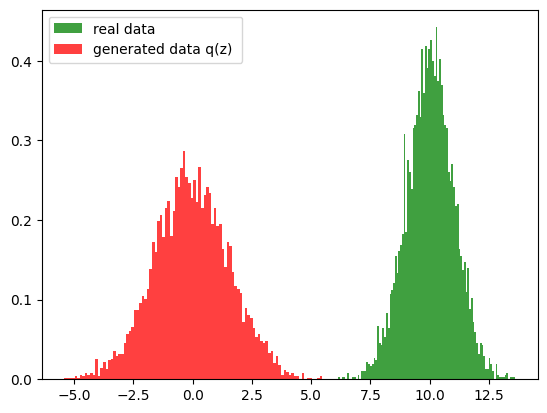

In [15]:
generator=make_generator_model()

Xhat = generator(Z, training=False)
plot_distribution(real_data=X,generated_data=Xhat)

We will discuss the use of the parameter ```training=False``` later on.


### The Discriminator


<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/Unknown1.png" width="300px">

The discriminator $D(\mathbf{x})$ is a neural network that learns to distinguish between actual and generated samples. The simplest Discriminator is a simple logistic regression function. Let's create a discriminator in Keras with one Dense layer; we leave the logistic function out as it will be incorporated in the cost function, which is the convention in Keras.


In [16]:
def make_discriminator_model():
    discriminator=tf.keras.Sequential()
    discriminator.add(layers.Dense(1))
    return discriminator

discriminator=make_discriminator_model()

The discriminator and generator are randomly initialized, but we can plot the output of each and compare it to the true data distribution, with the generated data in red and the real data in green, and the logistic function as a function of the x axis. We also include the threshold. If the output of the logistic function is less than 0.5, the sample is classified as generated data; conversely, if the output is greater than 0.5, the sample will be classified as data that came from the real distribution.


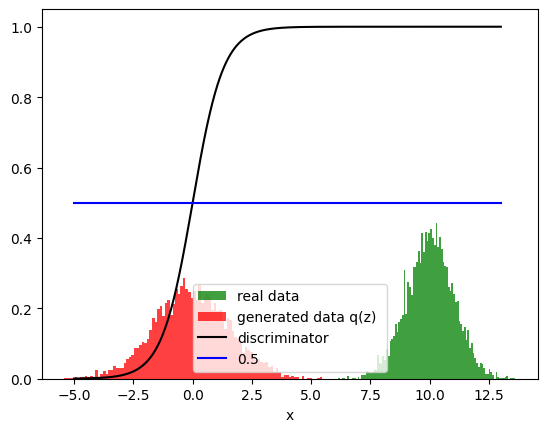

In [17]:
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator)

Applying the sigmoid function to the discriminator output, we get the probabilites that the samples belong to the real distribution. We can count the number of true samples that the discriminator correctly classifies.

For the real data, the discriminator successfully assigns a probability greater than 0.5 for all 5000 samples:


In [18]:
py_x=tf.math.sigmoid(discriminator(X,training=False))
np.sum(py_x>0.5)

5000

For the generated data, only a part of the 5000 samples are classified as having more than 50% chance of coming from the real distribution.


In [19]:
py_x=discriminator(Xhat)
np.sum(py_x>0.5)

2034

We can also use the following to find the average value of the sigmoid function for all the samples.  


In [20]:
def get_accuracy(X,Xhat):
    total=0
    py_x=tf.math.sigmoid(discriminator(X,training=False))
    total=np.mean(py_x)
    py_x=tf.math.sigmoid(discriminator(Xhat,training=False))
    total+=np.mean(py_x)
    return total/2

In [21]:
get_accuracy(X,Xhat)

0.7457817196846008

In many cases, we can instead study the difference in the distribution; in this case, the discriminator is called a <a href='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/2107.06700.pdf'>Critic</a>, a real-valued function.


### The Loss Function GANs (Optional)
GANs convert an unsupervised learning problem to a supervised one. Instead of formulating the problem like a two-player minimax game with a value function like in <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>, we can treat the problem of maximizing the familiar log-likelihood of the logistic function analogous to minimizing the cross-entropy loss, then incorporate the generator and discriminator.

___Discriminator___

In order to train the GANS, we start off with standard maximization of the likelihood for the discriminator for the standard dataset $\mathcal{D}=\{{(x_1, y_1), ..., (x_N, y_N)}\}$:

$$V(D)=\sum_{n=1}^N \left( y_n \ln(D(\mathbf{x}_n))+(1-y_n) \ln(1-D(\mathbf{x}_n))\right)$$

Where $y=1$ for samples from the true distribution and $y=0$ for samples from the generator. The goal is to maximize this term with respect to $D$:

$$max_{D}(V(D))$$


To also incorporate the generated samples, we augment the right side of the equation with the generated $k$th sample $\hat{\mathbf{x}}_k$. As they are not part of the dataset $k \notin \mathcal{D} $, we have to include a second summation where $y=0$. Finally, combining the cases of $y=1$ and $y=0$, we get:

$$V(D)=\sum_{ n	\in \mathcal{D}}  \ln(D(\mathbf{x}_n))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(\hat{\mathbf{x}}_k) ) $$


___Generator___

For the generator we simply replace $\hat{\mathbf{x}}_k$ with the $G(\mathbf{z}_k)$ .


$$V(G,D)=\sum_{n	\in \mathcal{D}} \ln(D(\mathbf{x}_n))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(G(\mathbf{z}_k))) $$

As this is a density estimation problem, it is common to replace the summation with the expected value like in <a href=https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1406.2661.pdf >[1]</a>. We replace the summations with an expectation where $p(\mathbf{x})$ is the true distribution and $p(\mathbf{z})$ is the distribution of $\mathbf{z}$.


$$V(D,G)=\mathbb{E}_{x\sim p(\mathbf{x})} \ln(D(\mathbf{x})) + \mathbb{E}_{\mathbf{z} \sim p(\mathbf{z})} \ln(1-D(G(\mathbf{z}) )) $$

As we are trying to trick the discriminator, we would like to find a $G$ that minimize the above expression, such as:

$$min_{G} max_{D} V(D,G)$$


### Training GANs

GANs are quite difficult to train, even for a simple example. Let's start off with training the generator in practice.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown3.jpeg" width="500px">

___Training Generator___

$log(1 − D(G(\mathbf{z})))$ is difficult to work with as $D(G(\mathbf{z}))$ is near one or zero for the first few iterations. This is because the generator is not yet properly trained, and the discriminator can easily distinguish between the generated and actual samples. Therefore we maximize $log(D(G(\mathbf{z}_k)) )$.

Although the output of the generator passes through the discriminator, we do not update the generator in the optimization step, hence we set the parameter ```training=False``` in the actual training steps.


Instead of maximizing the term, we can take the negative and minimize it. The resultant expression can be calculated in Keras using the cross-entropy loss where all the target values are set to one:

$$\sum_{k 	\notin \mathcal{D}} log(1 - D(G(\mathbf{z}_k)) )$$


In [22]:
# This method returns a helper function to compute crossentropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

___Training Discriminator___

We can also use the cross-entropy to train the discriminator; we simply multiply $V(G,D)$ by a negative number, set $y=0$ for the generated values and $y=1$ for the real values. We do not update the generator parameters.

$$V(G)=\sum_{n	\in \mathcal{D}} (\ln(D(\mathbf{x}_n)))+\sum_{k 	\notin \mathcal{D}} \ln(1-D(G(\mathbf{z}_k) )) $$


The first term is the real loss and the second is the fake loss in Keras.


In [23]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

We create the optimizer for the discriminator and generator:


In [24]:
generator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5,beta_2=0.8)

discriminator_optimizer = tf.keras.optimizers.Adam(5e-1,beta_1=0.5, beta_2=0.8)

We now train the model; as the dataset is small, we will use batch gradient descent.

For each iteration we will generate $M$ real examples $\{\mathbf{x}_{1}, ...,\mathbf{x}_{M}\}$, these are from the generating distribution $p(\mathbf{x})$. This would be our actual dataset if we used real data.  

We will then generate a sample batch of $M$ noise samples $\{\mathbf{z}_{1}, ...,\mathbf{z}_{M}\}$ from noise prior $p(\mathbf{z})$ and convert the result to a generated image using the generator $\{\hat{\mathbf{x}}_{1}, ...,\hat{\mathbf{x}}_{M}\}$.

We determine the output of the discriminator for both the real and generated samples. We calculate the loss and then update the discriminator and generator through their respective stochastic gradients.


The convergence of GAN training is a subject in itself. But let's explore a method that works for this simple dataset. Intuitively, we know that if our generated data is identical to our actual data, the probability of correctly classifying is random. Therefore if the generated and actual data are of equal proportion, $D(\mathbf{x}_n)=0.5$ and $D(\hat{\mathbf{x}}_n)=0.5$.  

We only display iterations where the average discriminator output gets closer to 50% for both the generated data and actual data.


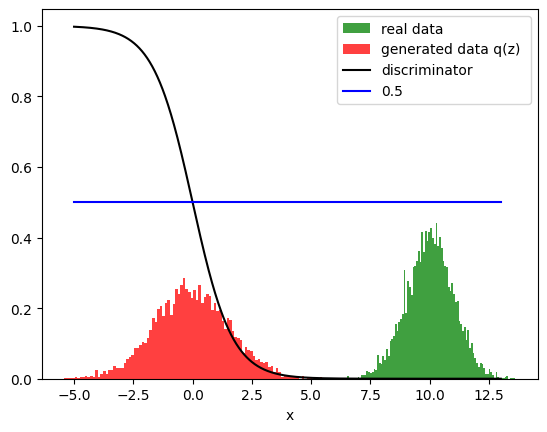

epoch 0


  0%|          | 0/20 [00:00<?, ?it/s]

0.276145339012146


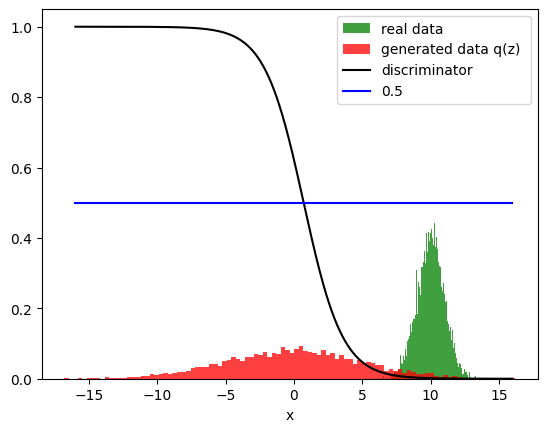

  5%|▌         | 1/20 [00:01<00:37,  1.98s/it]

epoch 0
0.49379074573516846


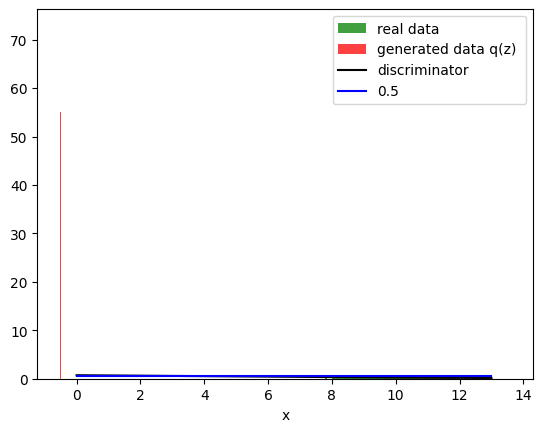

 20%|██        | 4/20 [00:02<00:07,  2.17it/s]

epoch 1


 60%|██████    | 12/20 [00:03<00:00,  8.66it/s]

0.504420280456543


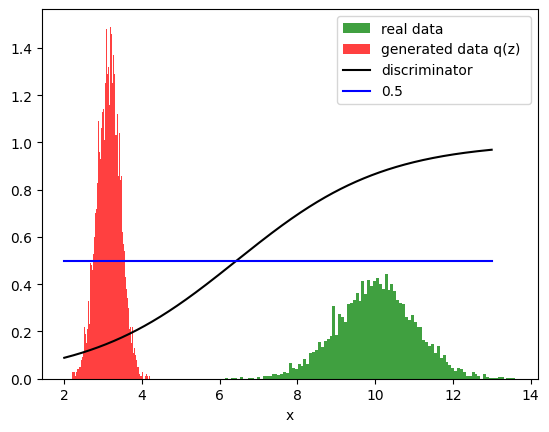

 80%|████████  | 16/20 [00:03<00:00,  7.22it/s]

epoch 13


100%|██████████| 20/20 [00:04<00:00,  4.97it/s]


In [25]:
#parameters for training
epochs=20
BATCH_SIZE=5000
noise_dim=1
epsilon=100


#discrimator and gernerator
tf.random.set_seed(0)
discriminator=make_discriminator_model()
generator=make_generator_model()

tf.config.run_functions_eagerly(True)



gen_loss_epoch=[]
disc_loss_epoch=[]
plot_distribution(real_data=X,generated_data=Xhat,discriminator=discriminator )
print("epoch",0)

for epoch in tqdm(range(epochs)):
    #data for the true distribution of your real data samples training ste
    x = tf.random.normal((BATCH_SIZE,1),mean=10,stddev=1.0)
    #random samples it was found if you increase the standard deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, noise_dim],mean=0,stddev=10)
    # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(x, training=True)
        #the output of the discriminator  data
        fake_output = discriminator(xhat, training=True)
        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
    # Compute the gradients for gen_loss and generator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    # Save and display the generator and discriminator if the performance increases
    if abs(0.5-get_accuracy(x,xhat))<epsilon:
        epsilon=abs(0.5-get_accuracy(x,xhat))
        generator.save('generator.keras') # Added .keras extension
        discriminator.save('discriminator.keras') # Added .keras extension
        print(get_accuracy(x,xhat))
        plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )
        print("epoch",epoch)

For more on training GANs check out the following <a href="https://jonathan-hui.medium.com/gan-why-it-is-so-hard-to-train-generative-advisory-networks-819a86b3750b?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01">blog</a>. We can display the best performing model


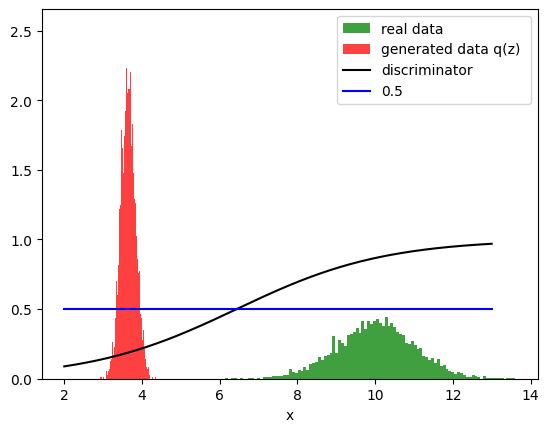

In [26]:
generator=make_generator_model()
generator= models.load_model('generator.keras') # Load with .keras extension
xhat=generator(z)
discriminator=models.load_model('discriminator.keras') # Load with .keras extension
plot_distribution(real_data=X,generated_data=xhat,discriminator=discriminator )

----


In the content above, you learned about the working mechanics of Generative Adversarial Networks (GANs) and their various applications, such as Image Generation. However, GANs have also been known to be unstable to train, and often, the generated images suffer from being noisy and incomprehensible.

For a improved result in the case example, we are applying Convolutional Neural Networks to GANS. They are called Deep Convolutional Generative Adversarial Networks (DCGANs).
We will build and train DCGANs in the following content, using several approaches introduced in the original <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">DCGANs paper</a>.



----


## Deep Convolutional Generative Adversarial Networks (DCGANs)


### Case background


In the case example, you work for an online anime video game company; the company would like to create a unique anime avatar for a game for each player. As there are millions of players, you must use a DCGANs to create each character.

The proposed approaches are summarized here:

- Replace any pooling layers with **strided convolutions (discriminator)** and **fractional-strided
convolutions (generator)**.
- Use **batchnorm** in both the generator and the discriminator.
- **Remove fully connected hidden layers** for deeper architectures.
- Use **ReLU** activation in generator for all layers except for the output, which uses **Tanh**.
- Use **LeakyReLU** activation in the discriminator for all layers except for the output, which uses **Sigmoid**.
- Use **Adam optimizer**.  

These approaches will result in more stable training of deeper generative models.


### Loading the Dataset

We will mainly work with the Anime Face dataset from [Kaggle](https://www.kaggle.com/datasets/splcher/animefacedataset?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01). The original dataset has 63,632 "high-quality" anime faces, but to make the models train faster in this lab, we randomly sampled 20,000 images and prepared a dataset called `cartoon_20000`.

Let's download the smaller dataset using the Skills Network library's `prepare` function:


In [ ]:
dataset_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module6/cartoon_20000.zip"
await skillsnetwork.prepare(dataset_url, overwrite=True)

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [ ]:
from google.colab import output
output.disable_custom_widget_manager()

The Anime Face or the Cartoon images are stored in the `cartoon_2000` folder in your current working directory. As a preprocessing step, we have removed any files that are not proper image formats (based on the file extensions) and any duplicate images.


Below is the full data from kaggle

In [27]:
import zipfile
with zipfile.ZipFile("archive.zip", "r") as zip_ref:
    zip_ref.extractall("archive")  # Sesuaikan nama folder

### Creating Data Generator


First, we declare some properties of our images, including image height, image width, and batch size.


In [28]:
img_height, img_width, batch_size=64,64,128

Next, we create a Keras <code>image_dataset_from_directory</code> object with a specified image directory and the parameters are defined as above. This process may take some time:


In [29]:
train_ds = tf.keras.utils.image_dataset_from_directory(directory='archive', # Adjust it to the dataset you want to use
                                                       image_size=(img_height, img_width),
                                                       batch_size=batch_size,
                                                       label_mode=None)

Found 63565 files.


The `train_ds` we defined is a `tf.data.Dataset` that yields batches of images with `image_size = (64, 64)` from the directory specified or subdirectories (if any).


**(OPTIONAL)** If you are running this notebook locally and you have multiple cores, then we can use the runtime to tune the value dynamically at runtime as follows:


In [30]:
#AUTOTUNE = tf.data.experimental.AUTOTUNE

#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

We apply the Lambda function on `train_ds` to normalize the pixel values of all the input images from $[0, 255]$ to $[-1, 1]$:


In [31]:
import tensorflow as tf

# Rescaling is no longer under 'experimental' in newer TensorFlow versions.
normalization_layer = tf.keras.layers.Rescaling(scale=1./127.5, offset=-1)
normalized_ds = train_ds.map(lambda x: normalization_layer(x))

Let's take one batch of images for displaying:


In [32]:
images=train_ds.take(1)

Convert the batch dimension to the indexes in a list:


In [33]:
X=[x for x in images]

We can then plot the first five images in the batch using the function   ```plot_array```:


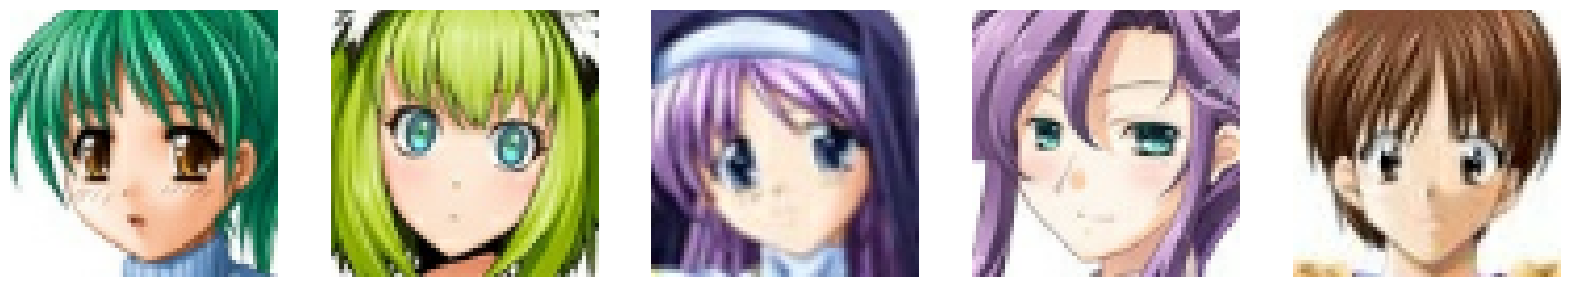

In [34]:
plot_array(X[0])

###  Generator and Discriminator (for DCGANs)


___Building the Generator___


The Generator is comprised of several layers of transposed convolution, the opposite of convolution operations.

- Each Conv2DTranspose layer (except the final layer) is followed by a Batch Normalization layer and a **Relu activation**; for more implementation details, check out <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">[2]</a>.
- The final transpose convolution layer has three output channels since the output needs to be a color image. We use the **Tanh activation** in the final layer.

See the illustration of the architecture from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/papers/1511.06434.pdf">[2]</a> below.

<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/generator.png" alt="generator image" width="80%"></center>


We build the Generator network by using the parameter values from <a href="https://learnopencv.com/deep-convolutional-gan-in-pytorch-and-tensorflow/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01" >[3]<a>.


In [35]:
def make_generator():

    model=Sequential()

    # input is latent vector of 100 dimensions
    model.add(Input(shape=(1, 1, 100), name='input_layer'))

    # Block 1 dimensionality of the output space  64 * 8
    model.add(Conv2DTranspose(64 * 8, kernel_size=4, strides= 4, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_1'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(ReLU(name='relu_1'))

    # Block 2: input is 4 x 4 x (64 * 8)
    model.add(Conv2DTranspose(64 * 4, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(ReLU(name='relu_2'))

    # Block 3: input is 8 x 8 x (64 * 4)
    model.add(Conv2DTranspose(64 * 2, kernel_size=4,strides=  2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8,  center=1.0, scale=0.02, name='bn_3'))
    model.add(ReLU(name='relu_3'))


    # Block 4: input is 16 x 16 x (64 * 2)
    model.add(Conv2DTranspose(64 * 1, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_transpose_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8,  center=1.0, scale=0.02, name='bn_4'))
    model.add(ReLU(name='relu_4'))

    model.add(Conv2DTranspose(3, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                              activation='tanh', name='conv_transpose_5'))

    return model

By printing the summary of the Generator architecture, we can see that the transposed convolutions **upsample** a 100-dim input vector to a high-dimensional image of size 64 x 64 x 3.


In [36]:
gen = make_generator()
gen.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_transpose_1 (Conv2DTranspose)   │ (None, 4, 4, 512)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 4, 4, 512)           │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_1 (ReLU)                        │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_2 (Conv2DTranspose)   │ (None, 8, 8, 256)           │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 8, 8, 256)           │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_2 (ReLU)                        │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_3 (Conv2DTranspose)   │ (None, 16, 16, 128)         │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_3 (ReLU)                        │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_4 (Conv2DTranspose)   │ (None, 32, 32, 64)          │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_4 (BatchNormalization)            │ (None, 32, 32, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ relu_4 (ReLU)                        │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_transpose_5 (Conv2DTranspose)   │ (None, 64, 64, 3)           │           3,072 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,578,624 (13.65 MB)

 Trainable params: 3,576,704 (13.64 MB)

 Non-trainable params: 1,920 (7.50 KB)

___Building the Discriminator___


The Discriminator has five convolution layers.

- All but the first and final Conv2D layers have Batch Normalization, since directly applying batchnorm to all layers could result in sample oscillation and model instability;
- The first four Conv2D layers use the **Leaky-Relu activation** with a slope of 0.2.
- Lastly, instead of a fully connected layer, the  output layer has a convolution layer with a **Sigmoid activation** function.


In [37]:
def make_discriminator():

    model=Sequential()

    # Block 1: input is 64 x 64 x (3)
    model.add(Input(shape=(64, 64, 3), name='input_layer'))
    model.add(Conv2D(64, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_1'))

    # Block 2: input is 32 x 32 x (64)
    model.add(Conv2D(64 * 2, kernel_size=4, strides= 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_2'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_1'))
    model.add(LeakyReLU(0.2, name='leaky_relu_2'))

    # Block 3
    model.add(Conv2D(64 * 4, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_3'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_2'))
    model.add(LeakyReLU(0.2, name='leaky_relu_3'))


    #Block 4
    model.add(Conv2D(64 * 8, 4, 2, padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False, name='conv_4'))
    model.add(BatchNormalization(momentum=0.1,  epsilon=0.8, center=1.0, scale=0.02, name='bn_3'))
    model.add(LeakyReLU(0.2, name='leaky_relu_4'))


    #Block 5
    model.add(Conv2D(1, 4, 2,padding='same', kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02), use_bias=False,
                     activation='sigmoid', name='conv_5'))

    return model

By printing the summary of the Discriminator architecture, we can see that the strided convolutions **downsample** an input image of size 64 x 64 x 3.


In [38]:
disc = make_discriminator()
disc.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                      │ (None, 32, 32, 64)          │           3,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_1 (LeakyReLU)             │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_2 (Conv2D)                      │ (None, 16, 16, 128)         │         131,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_1 (BatchNormalization)            │ (None, 16, 16, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_2 (LeakyReLU)             │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_3 (Conv2D)                      │ (None, 8, 8, 256)           │         524,288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_2 (BatchNormalization)            │ (None, 8, 8, 256)           │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_3 (LeakyReLU)             │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_4 (Conv2D)                      │ (None, 4, 4, 512)           │       2,097,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn_3 (BatchNormalization)            │ (None, 4, 4, 512)           │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_relu_4 (LeakyReLU)             │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_5 (Conv2D)                      │ (None, 2, 2, 1)             │           8,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,767,360 (10.56 MB)

 Trainable params: 2,765,568 (10.55 MB)

 Non-trainable params: 1,792 (7.00 KB)

### Defining Loss Functions

As we discussed in the previous section, the min-max optimization problem can be formulated by minimizing the cross entropy loss for the Generator and Discriminator.  

The `cross_entropy` object is the Binary Cross Entropy loss that will be used to model the objectives of the two networks.


In [39]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [40]:
def generator_loss(Xhat):
    return cross_entropy(tf.ones_like(Xhat), Xhat)

In [41]:
def discriminator_loss(X, Xhat):
    real_loss = cross_entropy(tf.ones_like(X), X)
    fake_loss = cross_entropy(tf.zeros_like(Xhat), Xhat)
    total_loss = 0.5*(real_loss + fake_loss)
    return total_loss

### Defining Optimizers

We create two Adam optimizers for the discriminator and the generator, respectively. We pass the following arguments to the optimizers:

- learning rate of 0.0002.
- beta coefficients $\beta_1 = 0.5$ and $\beta_2 = 0.999$, which are responsible for computing the running averages of the gradients during backpropagation.


In [42]:
learning_rate = 0.0002

# Use 'learning_rate' instead of 'lr'
generator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

# Use 'learning_rate' instead of 'lr'
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0002, beta_1 = 0.5, beta_2 = 0.999 )

### Create Train Step Function

As this lab is more computationally intensive than the last lab, we convert the training step into a function and then use the  @tf.function decorator, which allows the function to be "compiled" into a **callable TensorFlow graph**. This will speed up the training; for more information, read <a href="https://www.tensorflow.org/guide/function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01">here </a>


In [43]:
@tf.function

def train_step(X):

    #random samples it was found if you increase the  stander deviation, you get better results
    z= tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
      # needed to compute the gradients for a list of variables.
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #generated sample
        xhat = generator(z, training=True)
        #the output of the discriminator for real data
        real_output = discriminator(X, training=True)
        #the output of the discriminator for fake data
        fake_output = discriminator(xhat, training=True)

        #loss for each
        gen_loss= generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
      # Compute the gradients for gen_loss and generator

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    # Compute the gradients for gen_loss and discriminator
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    # Ask the optimizer to apply the processed gradients
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

Don't be intimidated by the code above, here is a summary of what a train step accomplishes:

- First, we sample `z`, a batch of noise vectors from a normal distribution ($\mu = 1, \sigma = 1$) and feed it to the Generator.
- The Generator produces generated or "fake" images `xhat`.
- We feed real images `X` and fake images `xhat` to the Discriminator and obtain `real_output` and `fake_output` respectively as the scores.
- We calculate Generator loss `gen_loss` using the `fake_output` from Discriminator since we want the fake images to fool the Discriminator as much as possible.
- We calculate Discriminator loss `disc_loss` using both the `real_output` and `fake_output` since we want the Discriminator to distinguish the two as much as possible.
- We calculate `gradients_of_generator` and  `gradients_of_discriminator` based on the losses obtained.
- Finally, we update the Generator and Discriminator by letting their respective optimizers apply the processed gradients on the trainable model parameters.


We can transform the random noise using the generator. As the generator is not trained yet, the output appears to be noises:


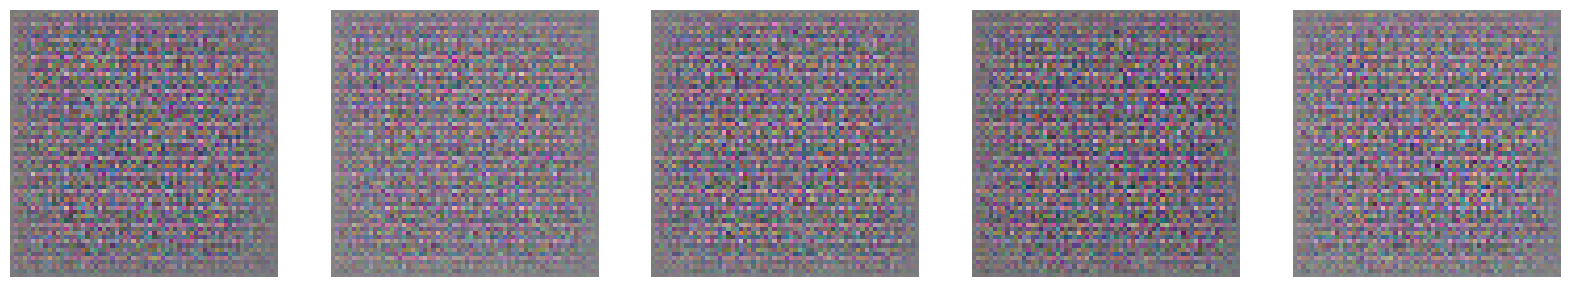

In [44]:
generator= make_generator()
BATCH_SIZE=128

latent_dim=100
noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
Xhat=generator(noise,training=False)
plot_array(Xhat)

### Training DCGANs


As this method is computationally intensive, we will train the model for one epoch and then use the generator to produce artificial images.

__Even 1 epoch in DCGANs training takes long time.__ You can __stop the training__ here and import the pre-trained model following the instruction below.


In [45]:
import tensorflow as tf
from tensorflow.keras import layers

def make_generator():
    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(1, 1, latent_dim)))
    model.add(layers.Conv2DTranspose(128, kernel_size=4, strides=1, padding="valid", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding="same", use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    # Change the number of filters to 3 to generate 3-channel output
    model.add(layers.Conv2DTranspose(3, kernel_size=4, strides=2, padding="same", use_bias=False, activation="tanh"))

    return model

epoch 1:   0%|          | 0/497 [00:00<?, ?it/s]

epoch 1, iteration 1


epoch 1:   0%|          | 1/497 [00:02<18:55,  2.29s/it]

epoch 1, iteration 2


epoch 1:   0%|          | 2/497 [00:02<09:32,  1.16s/it]

epoch 1, iteration 3


epoch 1:   1%|          | 3/497 [00:03<06:31,  1.26it/s]

epoch 1, iteration 4


epoch 1:   1%|          | 4/497 [00:03<05:08,  1.60it/s]

epoch 1, iteration 5


epoch 1:   1%|          | 5/497 [00:03<04:22,  1.87it/s]

epoch 1, iteration 6


epoch 1:   1%|          | 6/497 [00:04<03:36,  2.27it/s]

epoch 1, iteration 7


epoch 1:   1%|▏         | 7/497 [00:04<03:05,  2.64it/s]

epoch 1, iteration 8


epoch 1:   2%|▏         | 8/497 [00:04<02:47,  2.92it/s]

epoch 1, iteration 9


epoch 1:   2%|▏         | 9/497 [00:04<02:35,  3.13it/s]

epoch 1, iteration 10


epoch 1:   2%|▏         | 10/497 [00:05<02:27,  3.29it/s]

epoch 1, iteration 11


epoch 1:   2%|▏         | 11/497 [00:05<02:23,  3.39it/s]

epoch 1, iteration 12


epoch 1:   2%|▏         | 12/497 [00:05<02:20,  3.46it/s]

epoch 1, iteration 13


epoch 1:   3%|▎         | 13/497 [00:05<02:18,  3.50it/s]

epoch 1, iteration 14


epoch 1:   3%|▎         | 14/497 [00:06<02:15,  3.57it/s]

epoch 1, iteration 15


epoch 1:   3%|▎         | 15/497 [00:06<02:15,  3.57it/s]

epoch 1, iteration 16


epoch 1:   3%|▎         | 16/497 [00:06<02:15,  3.56it/s]

epoch 1, iteration 17


epoch 1:   3%|▎         | 17/497 [00:07<02:14,  3.58it/s]

epoch 1, iteration 18


epoch 1:   4%|▎         | 18/497 [00:07<02:11,  3.65it/s]

epoch 1, iteration 19


epoch 1:   4%|▍         | 19/497 [00:07<02:11,  3.62it/s]

epoch 1, iteration 20


epoch 1:   4%|▍         | 20/497 [00:07<02:10,  3.66it/s]

epoch 1, iteration 21


epoch 1:   4%|▍         | 21/497 [00:08<02:07,  3.72it/s]

epoch 1, iteration 22


epoch 1:   4%|▍         | 22/497 [00:08<02:06,  3.77it/s]

epoch 1, iteration 23


epoch 1:   5%|▍         | 23/497 [00:08<02:08,  3.69it/s]

epoch 1, iteration 24


epoch 1:   5%|▍         | 24/497 [00:08<02:07,  3.71it/s]

epoch 1, iteration 25


epoch 1:   5%|▌         | 25/497 [00:09<02:26,  3.23it/s]

epoch 1, iteration 26


epoch 1:   5%|▌         | 26/497 [00:09<02:46,  2.83it/s]

epoch 1, iteration 27


epoch 1:   5%|▌         | 27/497 [00:10<02:55,  2.68it/s]

epoch 1, iteration 28


epoch 1:   6%|▌         | 28/497 [00:10<03:04,  2.54it/s]

epoch 1, iteration 29


epoch 1:   6%|▌         | 29/497 [00:11<03:23,  2.30it/s]

epoch 1, iteration 30


epoch 1:   6%|▌         | 30/497 [00:11<03:36,  2.16it/s]

epoch 1, iteration 31


epoch 1:   6%|▌         | 31/497 [00:12<03:50,  2.02it/s]

epoch 1, iteration 32


epoch 1:   6%|▋         | 32/497 [00:12<03:39,  2.12it/s]

epoch 1, iteration 33


epoch 1:   7%|▋         | 33/497 [00:13<03:32,  2.18it/s]

epoch 1, iteration 34


epoch 1:   7%|▋         | 34/497 [00:13<03:28,  2.22it/s]

epoch 1, iteration 35


epoch 1:   7%|▋         | 35/497 [00:14<04:16,  1.80it/s]

epoch 1, iteration 36


epoch 1:   7%|▋         | 36/497 [00:15<04:57,  1.55it/s]

epoch 1, iteration 37


epoch 1:   7%|▋         | 37/497 [00:16<05:24,  1.42it/s]

epoch 1, iteration 38


epoch 1:   8%|▊         | 38/497 [00:17<06:04,  1.26it/s]

epoch 1, iteration 39


epoch 1:   8%|▊         | 39/497 [00:17<05:48,  1.31it/s]

epoch 1, iteration 40


epoch 1:   8%|▊         | 40/497 [00:18<05:12,  1.46it/s]

epoch 1, iteration 41


epoch 1:   8%|▊         | 41/497 [00:18<04:44,  1.60it/s]

epoch 1, iteration 42


epoch 1:   8%|▊         | 42/497 [00:19<04:38,  1.63it/s]

epoch 1, iteration 43


epoch 1:   9%|▊         | 43/497 [00:19<04:18,  1.76it/s]

epoch 1, iteration 44


epoch 1:   9%|▉         | 44/497 [00:20<04:38,  1.63it/s]

epoch 1, iteration 45


epoch 1:   9%|▉         | 45/497 [00:21<04:51,  1.55it/s]

epoch 1, iteration 46


epoch 1:   9%|▉         | 46/497 [00:21<04:43,  1.59it/s]

epoch 1, iteration 47


epoch 1:   9%|▉         | 47/497 [00:22<04:40,  1.60it/s]

epoch 1, iteration 48


epoch 1:  10%|▉         | 48/497 [00:23<05:11,  1.44it/s]

epoch 1, iteration 49


epoch 1:  10%|▉         | 49/497 [00:23<05:16,  1.42it/s]

epoch 1, iteration 50


epoch 1:  10%|█         | 50/497 [00:24<04:52,  1.53it/s]

epoch 1, iteration 51


epoch 1:  10%|█         | 51/497 [00:24<04:04,  1.82it/s]

epoch 1, iteration 52


epoch 1:  10%|█         | 52/497 [00:25<03:29,  2.13it/s]

epoch 1, iteration 53


epoch 1:  11%|█         | 53/497 [00:25<03:02,  2.43it/s]

epoch 1, iteration 54


epoch 1:  11%|█         | 54/497 [00:25<02:45,  2.67it/s]

epoch 1, iteration 55


epoch 1:  11%|█         | 55/497 [00:25<02:31,  2.92it/s]

epoch 1, iteration 56


epoch 1:  11%|█▏        | 56/497 [00:26<02:22,  3.10it/s]

epoch 1, iteration 57


epoch 1:  11%|█▏        | 57/497 [00:26<02:15,  3.25it/s]

epoch 1, iteration 58


epoch 1:  12%|█▏        | 58/497 [00:26<02:09,  3.38it/s]

epoch 1, iteration 59


epoch 1:  12%|█▏        | 59/497 [00:27<02:06,  3.47it/s]

epoch 1, iteration 60


epoch 1:  12%|█▏        | 60/497 [00:27<02:03,  3.53it/s]

epoch 1, iteration 61


epoch 1:  12%|█▏        | 61/497 [00:27<02:07,  3.43it/s]

epoch 1, iteration 62


epoch 1:  12%|█▏        | 62/497 [00:27<02:15,  3.22it/s]

epoch 1, iteration 63


epoch 1:  13%|█▎        | 63/497 [00:28<02:18,  3.14it/s]

epoch 1, iteration 64


epoch 1:  13%|█▎        | 64/497 [00:28<02:23,  3.01it/s]

epoch 1, iteration 65


epoch 1:  13%|█▎        | 65/497 [00:29<02:27,  2.93it/s]

epoch 1, iteration 66


epoch 1:  13%|█▎        | 66/497 [00:29<02:32,  2.83it/s]

epoch 1, iteration 67


epoch 1:  13%|█▎        | 67/497 [00:29<02:34,  2.78it/s]

epoch 1, iteration 68


epoch 1:  14%|█▎        | 68/497 [00:30<02:36,  2.74it/s]

epoch 1, iteration 69


epoch 1:  14%|█▍        | 69/497 [00:30<02:32,  2.81it/s]

epoch 1, iteration 70


epoch 1:  14%|█▍        | 70/497 [00:30<02:22,  2.99it/s]

epoch 1, iteration 71


epoch 1:  14%|█▍        | 71/497 [00:31<02:14,  3.16it/s]

epoch 1, iteration 72


epoch 1:  14%|█▍        | 72/497 [00:31<02:07,  3.33it/s]

epoch 1, iteration 73


epoch 1:  15%|█▍        | 73/497 [00:31<02:03,  3.44it/s]

epoch 1, iteration 74


epoch 1:  15%|█▍        | 74/497 [00:31<01:59,  3.54it/s]

epoch 1, iteration 75


epoch 1:  15%|█▌        | 75/497 [00:32<01:56,  3.63it/s]

epoch 1, iteration 76


epoch 1:  15%|█▌        | 76/497 [00:32<01:55,  3.66it/s]

epoch 1, iteration 77


epoch 1:  15%|█▌        | 77/497 [00:32<01:55,  3.62it/s]

epoch 1, iteration 78


epoch 1:  16%|█▌        | 78/497 [00:32<01:56,  3.61it/s]

epoch 1, iteration 79


epoch 1:  16%|█▌        | 79/497 [00:33<01:55,  3.63it/s]

epoch 1, iteration 80


epoch 1:  16%|█▌        | 80/497 [00:33<01:53,  3.68it/s]

epoch 1, iteration 81


epoch 1:  16%|█▋        | 81/497 [00:33<01:53,  3.65it/s]

epoch 1, iteration 82


epoch 1:  16%|█▋        | 82/497 [00:34<01:53,  3.64it/s]

epoch 1, iteration 83


epoch 1:  17%|█▋        | 83/497 [00:34<01:52,  3.68it/s]

epoch 1, iteration 84


epoch 1:  17%|█▋        | 84/497 [00:34<01:53,  3.65it/s]

epoch 1, iteration 85


epoch 1:  17%|█▋        | 85/497 [00:34<01:53,  3.64it/s]

epoch 1, iteration 86


epoch 1:  17%|█▋        | 86/497 [00:35<01:52,  3.67it/s]

epoch 1, iteration 87


epoch 1:  18%|█▊        | 87/497 [00:35<01:50,  3.72it/s]

epoch 1, iteration 88


epoch 1:  18%|█▊        | 88/497 [00:35<01:52,  3.65it/s]

epoch 1, iteration 89


epoch 1:  18%|█▊        | 89/497 [00:35<01:50,  3.69it/s]

epoch 1, iteration 90


epoch 1:  18%|█▊        | 90/497 [00:36<01:48,  3.73it/s]

epoch 1, iteration 91


epoch 1:  18%|█▊        | 91/497 [00:36<01:48,  3.75it/s]

epoch 1, iteration 92


epoch 1:  19%|█▊        | 92/497 [00:36<01:48,  3.74it/s]

epoch 1, iteration 93


epoch 1:  19%|█▊        | 93/497 [00:36<01:47,  3.74it/s]

epoch 1, iteration 94


epoch 1:  19%|█▉        | 94/497 [00:37<01:46,  3.77it/s]

epoch 1, iteration 95


epoch 1:  19%|█▉        | 95/497 [00:37<01:46,  3.76it/s]

epoch 1, iteration 96


epoch 1:  19%|█▉        | 96/497 [00:37<01:49,  3.68it/s]

epoch 1, iteration 97


epoch 1:  20%|█▉        | 97/497 [00:38<01:47,  3.72it/s]

epoch 1, iteration 98


epoch 1:  20%|█▉        | 98/497 [00:38<01:45,  3.79it/s]

epoch 1, iteration 99


epoch 1:  20%|█▉        | 99/497 [00:38<01:47,  3.70it/s]

epoch 1, iteration 100


epoch 1:  20%|██        | 100/497 [00:38<01:47,  3.70it/s]

epoch 1, iteration 101


epoch 1:  20%|██        | 101/497 [00:39<01:46,  3.71it/s]

epoch 1, iteration 102


epoch 1:  21%|██        | 102/497 [00:39<01:44,  3.77it/s]

epoch 1, iteration 103


epoch 1:  21%|██        | 103/497 [00:39<01:45,  3.75it/s]

epoch 1, iteration 104


epoch 1:  21%|██        | 104/497 [00:39<01:43,  3.79it/s]

epoch 1, iteration 105


epoch 1:  21%|██        | 105/497 [00:40<01:42,  3.82it/s]

epoch 1, iteration 106


epoch 1:  21%|██▏       | 106/497 [00:40<01:45,  3.69it/s]

epoch 1, iteration 107


epoch 1:  22%|██▏       | 107/497 [00:40<01:54,  3.41it/s]

epoch 1, iteration 108


epoch 1:  22%|██▏       | 108/497 [00:41<01:56,  3.33it/s]

epoch 1, iteration 109


epoch 1:  22%|██▏       | 109/497 [00:41<01:58,  3.27it/s]

epoch 1, iteration 110


epoch 1:  22%|██▏       | 110/497 [00:41<02:05,  3.09it/s]

epoch 1, iteration 111


epoch 1:  22%|██▏       | 111/497 [00:42<02:08,  3.00it/s]

epoch 1, iteration 112


epoch 1:  23%|██▎       | 112/497 [00:42<02:11,  2.94it/s]

epoch 1, iteration 113


epoch 1:  23%|██▎       | 113/497 [00:42<02:15,  2.83it/s]

epoch 1, iteration 114


epoch 1:  23%|██▎       | 114/497 [00:43<02:13,  2.87it/s]

epoch 1, iteration 115


epoch 1:  23%|██▎       | 115/497 [00:43<02:03,  3.08it/s]

epoch 1, iteration 116


epoch 1:  23%|██▎       | 116/497 [00:43<01:58,  3.21it/s]

epoch 1, iteration 117


epoch 1:  24%|██▎       | 117/497 [00:44<01:54,  3.33it/s]

epoch 1, iteration 118


epoch 1:  24%|██▎       | 118/497 [00:44<01:49,  3.45it/s]

epoch 1, iteration 119


epoch 1:  24%|██▍       | 119/497 [00:44<01:46,  3.56it/s]

epoch 1, iteration 120


epoch 1:  24%|██▍       | 120/497 [00:44<01:44,  3.60it/s]

epoch 1, iteration 121


epoch 1:  24%|██▍       | 121/497 [00:45<01:41,  3.69it/s]

epoch 1, iteration 122


epoch 1:  25%|██▍       | 122/497 [00:45<01:41,  3.71it/s]

epoch 1, iteration 123


epoch 1:  25%|██▍       | 123/497 [00:45<01:41,  3.69it/s]

epoch 1, iteration 124


epoch 1:  25%|██▍       | 124/497 [00:45<01:40,  3.69it/s]

epoch 1, iteration 125


epoch 1:  25%|██▌       | 125/497 [00:46<01:39,  3.74it/s]

epoch 1, iteration 126


epoch 1:  25%|██▌       | 126/497 [00:46<01:38,  3.78it/s]

epoch 1, iteration 127


epoch 1:  26%|██▌       | 127/497 [00:46<01:37,  3.80it/s]

epoch 1, iteration 128


epoch 1:  26%|██▌       | 128/497 [00:46<01:37,  3.78it/s]

epoch 1, iteration 129


epoch 1:  26%|██▌       | 129/497 [00:47<01:36,  3.80it/s]

epoch 1, iteration 130


epoch 1:  26%|██▌       | 130/497 [00:47<01:37,  3.78it/s]

epoch 1, iteration 131


epoch 1:  26%|██▋       | 131/497 [00:47<01:37,  3.75it/s]

epoch 1, iteration 132


epoch 1:  27%|██▋       | 132/497 [00:48<01:37,  3.73it/s]

epoch 1, iteration 133


epoch 1:  27%|██▋       | 133/497 [00:48<01:36,  3.76it/s]

epoch 1, iteration 134


epoch 1:  27%|██▋       | 134/497 [00:48<01:35,  3.79it/s]

epoch 1, iteration 135


epoch 1:  27%|██▋       | 135/497 [00:48<01:35,  3.78it/s]

epoch 1, iteration 136


epoch 1:  27%|██▋       | 136/497 [00:49<01:37,  3.70it/s]

epoch 1, iteration 137


epoch 1:  28%|██▊       | 137/497 [00:49<01:36,  3.73it/s]

epoch 1, iteration 138


epoch 1:  28%|██▊       | 138/497 [00:49<01:35,  3.74it/s]

epoch 1, iteration 139


epoch 1:  28%|██▊       | 139/497 [00:49<01:34,  3.78it/s]

epoch 1, iteration 140


epoch 1:  28%|██▊       | 140/497 [00:50<01:34,  3.76it/s]

epoch 1, iteration 141


epoch 1:  28%|██▊       | 141/497 [00:50<01:33,  3.80it/s]

epoch 1, iteration 142


epoch 1:  29%|██▊       | 142/497 [00:50<01:32,  3.84it/s]

epoch 1, iteration 143


epoch 1:  29%|██▉       | 143/497 [00:50<01:32,  3.83it/s]

epoch 1, iteration 144


epoch 1:  29%|██▉       | 144/497 [00:51<01:33,  3.77it/s]

epoch 1, iteration 145


epoch 1:  29%|██▉       | 145/497 [00:51<01:32,  3.81it/s]

epoch 1, iteration 146


epoch 1:  29%|██▉       | 146/497 [00:51<01:32,  3.81it/s]

epoch 1, iteration 147


epoch 1:  30%|██▉       | 147/497 [00:51<01:32,  3.77it/s]

epoch 1, iteration 148


epoch 1:  30%|██▉       | 148/497 [00:52<01:34,  3.70it/s]

epoch 1, iteration 149


epoch 1:  30%|██▉       | 149/497 [00:52<01:33,  3.72it/s]

epoch 1, iteration 150


epoch 1:  30%|███       | 150/497 [00:52<01:33,  3.72it/s]

epoch 1, iteration 151


epoch 1:  30%|███       | 151/497 [00:53<01:34,  3.67it/s]

epoch 1, iteration 152


epoch 1:  31%|███       | 152/497 [00:53<01:41,  3.39it/s]

epoch 1, iteration 153


epoch 1:  31%|███       | 153/497 [00:53<01:47,  3.20it/s]

epoch 1, iteration 154


epoch 1:  31%|███       | 154/497 [00:54<01:53,  3.03it/s]

epoch 1, iteration 155


epoch 1:  31%|███       | 155/497 [00:54<01:55,  2.97it/s]

epoch 1, iteration 156


epoch 1:  31%|███▏      | 156/497 [00:54<01:58,  2.89it/s]

epoch 1, iteration 157


epoch 1:  32%|███▏      | 157/497 [00:55<02:01,  2.81it/s]

epoch 1, iteration 158


epoch 1:  32%|███▏      | 158/497 [00:55<02:01,  2.80it/s]

epoch 1, iteration 159


epoch 1:  32%|███▏      | 159/497 [00:55<02:00,  2.80it/s]

epoch 1, iteration 160


epoch 1:  32%|███▏      | 160/497 [00:56<01:52,  3.00it/s]

epoch 1, iteration 161


epoch 1:  32%|███▏      | 161/497 [00:56<01:48,  3.10it/s]

epoch 1, iteration 162


epoch 1:  33%|███▎      | 162/497 [00:56<01:43,  3.24it/s]

epoch 1, iteration 163


epoch 1:  33%|███▎      | 163/497 [00:57<01:38,  3.41it/s]

epoch 1, iteration 164


epoch 1:  33%|███▎      | 164/497 [00:57<01:35,  3.49it/s]

epoch 1, iteration 165


epoch 1:  33%|███▎      | 165/497 [00:57<01:34,  3.53it/s]

epoch 1, iteration 166


epoch 1:  33%|███▎      | 166/497 [00:57<01:31,  3.61it/s]

epoch 1, iteration 167


epoch 1:  34%|███▎      | 167/497 [00:58<01:29,  3.68it/s]

epoch 1, iteration 168


epoch 1:  34%|███▍      | 168/497 [00:58<01:29,  3.66it/s]

epoch 1, iteration 169


epoch 1:  34%|███▍      | 169/497 [00:58<01:28,  3.70it/s]

epoch 1, iteration 170


epoch 1:  34%|███▍      | 170/497 [00:58<01:27,  3.73it/s]

epoch 1, iteration 171


epoch 1:  34%|███▍      | 171/497 [00:59<01:29,  3.62it/s]

epoch 1, iteration 172


epoch 1:  35%|███▍      | 172/497 [00:59<01:27,  3.70it/s]

epoch 1, iteration 173


epoch 1:  35%|███▍      | 173/497 [00:59<01:27,  3.72it/s]

epoch 1, iteration 174


epoch 1:  35%|███▌      | 174/497 [01:00<01:26,  3.73it/s]

epoch 1, iteration 175


epoch 1:  35%|███▌      | 175/497 [01:00<01:26,  3.71it/s]

epoch 1, iteration 176


epoch 1:  35%|███▌      | 176/497 [01:00<01:26,  3.70it/s]

epoch 1, iteration 177


epoch 1:  36%|███▌      | 177/497 [01:00<01:27,  3.67it/s]

epoch 1, iteration 178


epoch 1:  36%|███▌      | 178/497 [01:01<01:26,  3.70it/s]

epoch 1, iteration 179


epoch 1:  36%|███▌      | 179/497 [01:01<01:25,  3.71it/s]

epoch 1, iteration 180


epoch 1:  36%|███▌      | 180/497 [01:01<01:24,  3.75it/s]

epoch 1, iteration 181


epoch 1:  36%|███▋      | 181/497 [01:01<01:23,  3.79it/s]

epoch 1, iteration 182


epoch 1:  37%|███▋      | 182/497 [01:02<01:23,  3.78it/s]

epoch 1, iteration 183


epoch 1:  37%|███▋      | 183/497 [01:02<01:22,  3.79it/s]

epoch 1, iteration 184


epoch 1:  37%|███▋      | 184/497 [01:02<01:22,  3.79it/s]

epoch 1, iteration 185


epoch 1:  37%|███▋      | 185/497 [01:02<01:23,  3.73it/s]

epoch 1, iteration 186


epoch 1:  37%|███▋      | 186/497 [01:03<01:23,  3.73it/s]

epoch 1, iteration 187


epoch 1:  38%|███▊      | 187/497 [01:03<01:22,  3.74it/s]

epoch 1, iteration 188


epoch 1:  38%|███▊      | 188/497 [01:03<01:23,  3.70it/s]

epoch 1, iteration 189


epoch 1:  38%|███▊      | 189/497 [01:04<01:22,  3.73it/s]

epoch 1, iteration 190


epoch 1:  38%|███▊      | 190/497 [01:04<01:23,  3.70it/s]

epoch 1, iteration 191


epoch 1:  38%|███▊      | 191/497 [01:04<01:23,  3.66it/s]

epoch 1, iteration 192


epoch 1:  39%|███▊      | 192/497 [01:04<01:23,  3.67it/s]

epoch 1, iteration 193


epoch 1:  39%|███▉      | 193/497 [01:05<01:22,  3.70it/s]

epoch 1, iteration 194


epoch 1:  39%|███▉      | 194/497 [01:05<01:21,  3.70it/s]

epoch 1, iteration 195


epoch 1:  39%|███▉      | 195/497 [01:05<01:20,  3.73it/s]

epoch 1, iteration 196


epoch 1:  39%|███▉      | 196/497 [01:05<01:21,  3.68it/s]

epoch 1, iteration 197


epoch 1:  40%|███▉      | 197/497 [01:06<01:29,  3.36it/s]

epoch 1, iteration 198


epoch 1:  40%|███▉      | 198/497 [01:06<01:31,  3.26it/s]

epoch 1, iteration 199


epoch 1:  40%|████      | 199/497 [01:06<01:33,  3.20it/s]

epoch 1, iteration 200


epoch 1:  40%|████      | 200/497 [01:07<01:34,  3.13it/s]

epoch 1, iteration 201


epoch 1:  40%|████      | 201/497 [01:07<01:40,  2.96it/s]

epoch 1, iteration 202


epoch 1:  41%|████      | 202/497 [01:08<01:43,  2.85it/s]

epoch 1, iteration 203


epoch 1:  41%|████      | 203/497 [01:08<01:43,  2.84it/s]

epoch 1, iteration 204


epoch 1:  41%|████      | 204/497 [01:08<01:46,  2.75it/s]

epoch 1, iteration 205


epoch 1:  41%|████      | 205/497 [01:09<01:38,  2.97it/s]

epoch 1, iteration 206


epoch 1:  41%|████▏     | 206/497 [01:09<01:33,  3.13it/s]

epoch 1, iteration 207


epoch 1:  42%|████▏     | 207/497 [01:09<01:28,  3.27it/s]

epoch 1, iteration 208


epoch 1:  42%|████▏     | 208/497 [01:09<01:25,  3.40it/s]

epoch 1, iteration 209


epoch 1:  42%|████▏     | 209/497 [01:10<01:22,  3.51it/s]

epoch 1, iteration 210


epoch 1:  42%|████▏     | 210/497 [01:10<01:19,  3.63it/s]

epoch 1, iteration 211


epoch 1:  42%|████▏     | 211/497 [01:10<01:17,  3.67it/s]

epoch 1, iteration 212


epoch 1:  43%|████▎     | 212/497 [01:10<01:17,  3.67it/s]

epoch 1, iteration 213


epoch 1:  43%|████▎     | 213/497 [01:11<01:16,  3.71it/s]

epoch 1, iteration 214


epoch 1:  43%|████▎     | 214/497 [01:11<01:16,  3.72it/s]

epoch 1, iteration 215


epoch 1:  43%|████▎     | 215/497 [01:11<01:17,  3.66it/s]

epoch 1, iteration 216


epoch 1:  43%|████▎     | 216/497 [01:12<01:15,  3.70it/s]

epoch 1, iteration 217


epoch 1:  44%|████▎     | 217/497 [01:12<01:15,  3.71it/s]

epoch 1, iteration 218


epoch 1:  44%|████▍     | 218/497 [01:12<01:15,  3.69it/s]

epoch 1, iteration 219


epoch 1:  44%|████▍     | 219/497 [01:12<01:16,  3.65it/s]

epoch 1, iteration 220


epoch 1:  44%|████▍     | 220/497 [01:13<01:14,  3.72it/s]

epoch 1, iteration 221


epoch 1:  44%|████▍     | 221/497 [01:13<01:14,  3.73it/s]

epoch 1, iteration 222


epoch 1:  45%|████▍     | 222/497 [01:13<01:14,  3.70it/s]

epoch 1, iteration 223


epoch 1:  45%|████▍     | 223/497 [01:13<01:13,  3.72it/s]

epoch 1, iteration 224


epoch 1:  45%|████▌     | 224/497 [01:14<01:12,  3.79it/s]

epoch 1, iteration 225


epoch 1:  45%|████▌     | 225/497 [01:14<01:12,  3.76it/s]

epoch 1, iteration 226


epoch 1:  45%|████▌     | 226/497 [01:14<01:12,  3.75it/s]

epoch 1, iteration 227


epoch 1:  46%|████▌     | 227/497 [01:14<01:12,  3.75it/s]

epoch 1, iteration 228


epoch 1:  46%|████▌     | 228/497 [01:15<01:11,  3.78it/s]

epoch 1, iteration 229


epoch 1:  46%|████▌     | 229/497 [01:15<01:10,  3.80it/s]

epoch 1, iteration 230


epoch 1:  46%|████▋     | 230/497 [01:15<01:12,  3.70it/s]

epoch 1, iteration 231


epoch 1:  46%|████▋     | 231/497 [01:16<01:11,  3.70it/s]

epoch 1, iteration 232


epoch 1:  47%|████▋     | 232/497 [01:16<01:11,  3.72it/s]

epoch 1, iteration 233


epoch 1:  47%|████▋     | 233/497 [01:16<01:11,  3.67it/s]

epoch 1, iteration 234


epoch 1:  47%|████▋     | 234/497 [01:16<01:11,  3.69it/s]

epoch 1, iteration 235


epoch 1:  47%|████▋     | 235/497 [01:17<01:10,  3.74it/s]

epoch 1, iteration 236


epoch 1:  47%|████▋     | 236/497 [01:17<01:09,  3.77it/s]

epoch 1, iteration 237


epoch 1:  48%|████▊     | 237/497 [01:17<01:08,  3.80it/s]

epoch 1, iteration 238


epoch 1:  48%|████▊     | 238/497 [01:17<01:09,  3.74it/s]

epoch 1, iteration 239


epoch 1:  48%|████▊     | 239/497 [01:18<01:08,  3.76it/s]

epoch 1, iteration 240


epoch 1:  48%|████▊     | 240/497 [01:18<01:07,  3.81it/s]

epoch 1, iteration 241


epoch 1:  48%|████▊     | 241/497 [01:18<01:07,  3.78it/s]

epoch 1, iteration 242


epoch 1:  49%|████▊     | 242/497 [01:19<01:12,  3.50it/s]

epoch 1, iteration 243


epoch 1:  49%|████▉     | 243/497 [01:19<01:17,  3.29it/s]

epoch 1, iteration 244


epoch 1:  49%|████▉     | 244/497 [01:19<01:20,  3.13it/s]

epoch 1, iteration 245


epoch 1:  49%|████▉     | 245/497 [01:20<01:23,  3.03it/s]

epoch 1, iteration 246


epoch 1:  49%|████▉     | 246/497 [01:20<01:27,  2.88it/s]

epoch 1, iteration 247


epoch 1:  50%|████▉     | 247/497 [01:20<01:29,  2.79it/s]

epoch 1, iteration 248


epoch 1:  50%|████▉     | 248/497 [01:21<01:29,  2.77it/s]

epoch 1, iteration 249


epoch 1:  50%|█████     | 249/497 [01:21<01:31,  2.70it/s]

epoch 1, iteration 250


epoch 1:  50%|█████     | 250/497 [01:21<01:24,  2.92it/s]

epoch 1, iteration 251


epoch 1:  51%|█████     | 251/497 [01:22<01:20,  3.06it/s]

epoch 1, iteration 252


epoch 1:  51%|█████     | 252/497 [01:22<01:16,  3.22it/s]

epoch 1, iteration 253


epoch 1:  51%|█████     | 253/497 [01:22<01:13,  3.34it/s]

epoch 1, iteration 254


epoch 1:  51%|█████     | 254/497 [01:23<01:11,  3.38it/s]

epoch 1, iteration 255


epoch 1:  51%|█████▏    | 255/497 [01:23<01:09,  3.49it/s]

epoch 1, iteration 256


epoch 1:  52%|█████▏    | 256/497 [01:23<01:08,  3.54it/s]

epoch 1, iteration 257


epoch 1:  52%|█████▏    | 257/497 [01:23<01:06,  3.61it/s]

epoch 1, iteration 258


epoch 1:  52%|█████▏    | 258/497 [01:24<01:05,  3.66it/s]

epoch 1, iteration 259


epoch 1:  52%|█████▏    | 259/497 [01:24<01:04,  3.71it/s]

epoch 1, iteration 260


epoch 1:  52%|█████▏    | 260/497 [01:24<01:06,  3.57it/s]

epoch 1, iteration 261


epoch 1:  53%|█████▎    | 261/497 [01:24<01:05,  3.61it/s]

epoch 1, iteration 262


epoch 1:  53%|█████▎    | 262/497 [01:25<01:04,  3.65it/s]

epoch 1, iteration 263


epoch 1:  53%|█████▎    | 263/497 [01:25<01:02,  3.72it/s]

epoch 1, iteration 264


epoch 1:  53%|█████▎    | 264/497 [01:25<01:02,  3.75it/s]

epoch 1, iteration 265


epoch 1:  53%|█████▎    | 265/497 [01:25<01:01,  3.79it/s]

epoch 1, iteration 266


epoch 1:  54%|█████▎    | 266/497 [01:26<01:01,  3.77it/s]

epoch 1, iteration 267


epoch 1:  54%|█████▎    | 267/497 [01:26<01:00,  3.83it/s]

epoch 1, iteration 268


epoch 1:  54%|█████▍    | 268/497 [01:26<01:00,  3.78it/s]

epoch 1, iteration 269


epoch 1:  54%|█████▍    | 269/497 [01:27<01:00,  3.74it/s]

epoch 1, iteration 270


epoch 1:  54%|█████▍    | 270/497 [01:27<01:00,  3.74it/s]

epoch 1, iteration 271


epoch 1:  55%|█████▍    | 271/497 [01:27<01:01,  3.70it/s]

epoch 1, iteration 272


epoch 1:  55%|█████▍    | 272/497 [01:27<01:00,  3.71it/s]

epoch 1, iteration 273


epoch 1:  55%|█████▍    | 273/497 [01:28<01:00,  3.71it/s]

epoch 1, iteration 274


epoch 1:  55%|█████▌    | 274/497 [01:28<00:59,  3.75it/s]

epoch 1, iteration 275


epoch 1:  55%|█████▌    | 275/497 [01:28<00:58,  3.77it/s]

epoch 1, iteration 276


epoch 1:  56%|█████▌    | 276/497 [01:28<00:57,  3.81it/s]

epoch 1, iteration 277


epoch 1:  56%|█████▌    | 277/497 [01:29<00:59,  3.73it/s]

epoch 1, iteration 278


epoch 1:  56%|█████▌    | 278/497 [01:29<00:58,  3.75it/s]

epoch 1, iteration 279


epoch 1:  56%|█████▌    | 279/497 [01:29<00:59,  3.65it/s]

epoch 1, iteration 280


epoch 1:  56%|█████▋    | 280/497 [01:30<00:59,  3.67it/s]

epoch 1, iteration 281


epoch 1:  57%|█████▋    | 281/497 [01:30<00:58,  3.68it/s]

epoch 1, iteration 282


epoch 1:  57%|█████▋    | 282/497 [01:30<00:58,  3.67it/s]

epoch 1, iteration 283


epoch 1:  57%|█████▋    | 283/497 [01:30<00:58,  3.63it/s]

epoch 1, iteration 284


epoch 1:  57%|█████▋    | 284/497 [01:31<00:57,  3.67it/s]

epoch 1, iteration 285


epoch 1:  57%|█████▋    | 285/497 [01:31<00:58,  3.64it/s]

epoch 1, iteration 286


epoch 1:  58%|█████▊    | 286/497 [01:31<00:57,  3.64it/s]

epoch 1, iteration 287


epoch 1:  58%|█████▊    | 287/497 [01:32<01:03,  3.33it/s]

epoch 1, iteration 288


epoch 1:  58%|█████▊    | 288/497 [01:32<01:04,  3.22it/s]

epoch 1, iteration 289


epoch 1:  58%|█████▊    | 289/497 [01:32<01:05,  3.18it/s]

epoch 1, iteration 290


epoch 1:  58%|█████▊    | 290/497 [01:33<01:07,  3.06it/s]

epoch 1, iteration 291


epoch 1:  59%|█████▊    | 291/497 [01:33<01:09,  2.95it/s]

epoch 1, iteration 292


epoch 1:  59%|█████▉    | 292/497 [01:33<01:11,  2.85it/s]

epoch 1, iteration 293


epoch 1:  59%|█████▉    | 293/497 [01:34<01:11,  2.87it/s]

epoch 1, iteration 294


epoch 1:  59%|█████▉    | 294/497 [01:34<01:11,  2.84it/s]

epoch 1, iteration 295


epoch 1:  59%|█████▉    | 295/497 [01:34<01:07,  2.99it/s]

epoch 1, iteration 296


epoch 1:  60%|█████▉    | 296/497 [01:35<01:03,  3.15it/s]

epoch 1, iteration 297


epoch 1:  60%|█████▉    | 297/497 [01:35<01:01,  3.25it/s]

epoch 1, iteration 298


epoch 1:  60%|█████▉    | 298/497 [01:35<01:00,  3.29it/s]

epoch 1, iteration 299


epoch 1:  60%|██████    | 299/497 [01:35<00:58,  3.36it/s]

epoch 1, iteration 300


epoch 1:  60%|██████    | 300/497 [01:36<00:57,  3.44it/s]

epoch 1, iteration 301


epoch 1:  61%|██████    | 301/497 [01:36<00:55,  3.54it/s]

epoch 1, iteration 302


epoch 1:  61%|██████    | 302/497 [01:36<00:54,  3.57it/s]

epoch 1, iteration 303


epoch 1:  61%|██████    | 303/497 [01:37<00:54,  3.59it/s]

epoch 1, iteration 304


epoch 1:  61%|██████    | 304/497 [01:37<00:52,  3.64it/s]

epoch 1, iteration 305


epoch 1:  61%|██████▏   | 305/497 [01:37<00:53,  3.61it/s]

epoch 1, iteration 306


epoch 1:  62%|██████▏   | 306/497 [01:37<00:52,  3.64it/s]

epoch 1, iteration 307


epoch 1:  62%|██████▏   | 307/497 [01:38<00:51,  3.67it/s]

epoch 1, iteration 308


epoch 1:  62%|██████▏   | 308/497 [01:38<00:50,  3.71it/s]

epoch 1, iteration 309


epoch 1:  62%|██████▏   | 309/497 [01:38<00:51,  3.64it/s]

epoch 1, iteration 310


epoch 1:  62%|██████▏   | 310/497 [01:38<00:51,  3.65it/s]

epoch 1, iteration 311


epoch 1:  63%|██████▎   | 311/497 [01:39<00:50,  3.66it/s]

epoch 1, iteration 312


epoch 1:  63%|██████▎   | 312/497 [01:39<00:49,  3.71it/s]

epoch 1, iteration 313


epoch 1:  63%|██████▎   | 313/497 [01:39<00:51,  3.61it/s]

epoch 1, iteration 314


epoch 1:  63%|██████▎   | 314/497 [01:40<00:50,  3.61it/s]

epoch 1, iteration 315


epoch 1:  63%|██████▎   | 315/497 [01:40<00:49,  3.67it/s]

epoch 1, iteration 316


epoch 1:  64%|██████▎   | 316/497 [01:40<00:50,  3.59it/s]

epoch 1, iteration 317


epoch 1:  64%|██████▍   | 317/497 [01:40<00:50,  3.60it/s]

epoch 1, iteration 318


epoch 1:  64%|██████▍   | 318/497 [01:41<00:49,  3.63it/s]

epoch 1, iteration 319


epoch 1:  64%|██████▍   | 319/497 [01:41<00:48,  3.70it/s]

epoch 1, iteration 320


epoch 1:  64%|██████▍   | 320/497 [01:41<00:48,  3.68it/s]

epoch 1, iteration 321


epoch 1:  65%|██████▍   | 321/497 [01:41<00:47,  3.70it/s]

epoch 1, iteration 322


epoch 1:  65%|██████▍   | 322/497 [01:42<00:47,  3.69it/s]

epoch 1, iteration 323


epoch 1:  65%|██████▍   | 323/497 [01:42<00:46,  3.71it/s]

epoch 1, iteration 324


epoch 1:  65%|██████▌   | 324/497 [01:42<00:47,  3.63it/s]

epoch 1, iteration 325


epoch 1:  65%|██████▌   | 325/497 [01:43<00:47,  3.64it/s]

epoch 1, iteration 326


epoch 1:  66%|██████▌   | 326/497 [01:43<00:47,  3.62it/s]

epoch 1, iteration 327


epoch 1:  66%|██████▌   | 327/497 [01:43<00:46,  3.66it/s]

epoch 1, iteration 328


epoch 1:  66%|██████▌   | 328/497 [01:43<00:47,  3.59it/s]

epoch 1, iteration 329


epoch 1:  66%|██████▌   | 329/497 [01:44<00:46,  3.60it/s]

epoch 1, iteration 330


epoch 1:  66%|██████▋   | 330/497 [01:44<00:45,  3.64it/s]

epoch 1, iteration 331


epoch 1:  67%|██████▋   | 331/497 [01:44<00:48,  3.40it/s]

epoch 1, iteration 332


epoch 1:  67%|██████▋   | 332/497 [01:45<00:51,  3.20it/s]

epoch 1, iteration 333


epoch 1:  67%|██████▋   | 333/497 [01:45<00:51,  3.18it/s]

epoch 1, iteration 334


epoch 1:  67%|██████▋   | 334/497 [01:45<00:52,  3.08it/s]

epoch 1, iteration 335


epoch 1:  67%|██████▋   | 335/497 [01:46<00:53,  3.02it/s]

epoch 1, iteration 336


epoch 1:  68%|██████▊   | 336/497 [01:46<00:56,  2.87it/s]

epoch 1, iteration 337


epoch 1:  68%|██████▊   | 337/497 [01:46<00:58,  2.73it/s]

epoch 1, iteration 338


epoch 1:  68%|██████▊   | 338/497 [01:47<01:00,  2.64it/s]

epoch 1, iteration 339


epoch 1:  68%|██████▊   | 339/497 [01:47<00:56,  2.82it/s]

epoch 1, iteration 340


epoch 1:  68%|██████▊   | 340/497 [01:47<00:52,  3.00it/s]

epoch 1, iteration 341


epoch 1:  69%|██████▊   | 341/497 [01:48<00:49,  3.15it/s]

epoch 1, iteration 342


epoch 1:  69%|██████▉   | 342/497 [01:48<00:46,  3.30it/s]

epoch 1, iteration 343


epoch 1:  69%|██████▉   | 343/497 [01:48<00:45,  3.35it/s]

epoch 1, iteration 344


epoch 1:  69%|██████▉   | 344/497 [01:49<00:44,  3.43it/s]

epoch 1, iteration 345


epoch 1:  69%|██████▉   | 345/497 [01:49<00:43,  3.53it/s]

epoch 1, iteration 346


epoch 1:  70%|██████▉   | 346/497 [01:49<00:42,  3.59it/s]

epoch 1, iteration 347


epoch 1:  70%|██████▉   | 347/497 [01:49<00:41,  3.64it/s]

epoch 1, iteration 348


epoch 1:  70%|███████   | 348/497 [01:50<00:41,  3.60it/s]

epoch 1, iteration 349


epoch 1:  70%|███████   | 349/497 [01:50<00:40,  3.66it/s]

epoch 1, iteration 350


epoch 1:  70%|███████   | 350/497 [01:50<00:40,  3.66it/s]

epoch 1, iteration 351


epoch 1:  71%|███████   | 351/497 [01:50<00:39,  3.65it/s]

epoch 1, iteration 352


epoch 1:  71%|███████   | 352/497 [01:51<00:38,  3.72it/s]

epoch 1, iteration 353


epoch 1:  71%|███████   | 353/497 [01:51<00:38,  3.71it/s]

epoch 1, iteration 354


epoch 1:  71%|███████   | 354/497 [01:51<00:38,  3.71it/s]

epoch 1, iteration 355


epoch 1:  71%|███████▏  | 355/497 [01:51<00:38,  3.64it/s]

epoch 1, iteration 356


epoch 1:  72%|███████▏  | 356/497 [01:52<00:38,  3.66it/s]

epoch 1, iteration 357


epoch 1:  72%|███████▏  | 357/497 [01:52<00:37,  3.69it/s]

epoch 1, iteration 358


epoch 1:  72%|███████▏  | 358/497 [01:52<00:37,  3.69it/s]

epoch 1, iteration 359


epoch 1:  72%|███████▏  | 359/497 [01:53<00:37,  3.70it/s]

epoch 1, iteration 360


epoch 1:  72%|███████▏  | 360/497 [01:53<00:36,  3.73it/s]

epoch 1, iteration 361


epoch 1:  73%|███████▎  | 361/497 [01:53<00:36,  3.70it/s]

epoch 1, iteration 362


epoch 1:  73%|███████▎  | 362/497 [01:53<00:35,  3.76it/s]

epoch 1, iteration 363


epoch 1:  73%|███████▎  | 363/497 [01:54<00:35,  3.76it/s]

epoch 1, iteration 364


epoch 1:  73%|███████▎  | 364/497 [01:54<00:35,  3.76it/s]

epoch 1, iteration 365


epoch 1:  73%|███████▎  | 365/497 [01:54<00:35,  3.76it/s]

epoch 1, iteration 366


epoch 1:  74%|███████▎  | 366/497 [01:54<00:35,  3.69it/s]

epoch 1, iteration 367


epoch 1:  74%|███████▍  | 367/497 [01:55<00:36,  3.60it/s]

epoch 1, iteration 368


epoch 1:  74%|███████▍  | 368/497 [01:55<00:35,  3.64it/s]

epoch 1, iteration 369


epoch 1:  74%|███████▍  | 369/497 [01:55<00:35,  3.64it/s]

epoch 1, iteration 370


epoch 1:  74%|███████▍  | 370/497 [01:56<00:34,  3.64it/s]

epoch 1, iteration 371


epoch 1:  75%|███████▍  | 371/497 [01:56<00:34,  3.67it/s]

epoch 1, iteration 372


epoch 1:  75%|███████▍  | 372/497 [01:56<00:34,  3.60it/s]

epoch 1, iteration 373


epoch 1:  75%|███████▌  | 373/497 [01:56<00:34,  3.63it/s]

epoch 1, iteration 374


epoch 1:  75%|███████▌  | 374/497 [01:57<00:33,  3.70it/s]

epoch 1, iteration 375


epoch 1:  75%|███████▌  | 375/497 [01:57<00:33,  3.65it/s]

epoch 1, iteration 376


epoch 1:  76%|███████▌  | 376/497 [01:57<00:35,  3.38it/s]

epoch 1, iteration 377


epoch 1:  76%|███████▌  | 377/497 [01:58<00:36,  3.27it/s]

epoch 1, iteration 378


epoch 1:  76%|███████▌  | 378/497 [01:58<00:37,  3.21it/s]

epoch 1, iteration 379


epoch 1:  76%|███████▋  | 379/497 [01:58<00:37,  3.13it/s]

epoch 1, iteration 380


epoch 1:  76%|███████▋  | 380/497 [01:59<00:39,  2.98it/s]

epoch 1, iteration 381


epoch 1:  77%|███████▋  | 381/497 [01:59<00:40,  2.85it/s]

epoch 1, iteration 382


epoch 1:  77%|███████▋  | 382/497 [01:59<00:41,  2.74it/s]

epoch 1, iteration 383


epoch 1:  77%|███████▋  | 383/497 [02:00<00:41,  2.76it/s]

epoch 1, iteration 384


epoch 1:  77%|███████▋  | 384/497 [02:00<00:38,  2.96it/s]

epoch 1, iteration 385


epoch 1:  77%|███████▋  | 385/497 [02:00<00:35,  3.11it/s]

epoch 1, iteration 386


epoch 1:  78%|███████▊  | 386/497 [02:01<00:33,  3.30it/s]

epoch 1, iteration 387


epoch 1:  78%|███████▊  | 387/497 [02:01<00:32,  3.39it/s]

epoch 1, iteration 388


epoch 1:  78%|███████▊  | 388/497 [02:01<00:31,  3.45it/s]

epoch 1, iteration 389


epoch 1:  78%|███████▊  | 389/497 [02:02<00:38,  2.81it/s]

epoch 1, iteration 390


epoch 1:  78%|███████▊  | 390/497 [02:02<00:38,  2.82it/s]

epoch 1, iteration 391


epoch 1:  79%|███████▊  | 391/497 [02:02<00:35,  2.95it/s]

epoch 1, iteration 392


epoch 1:  79%|███████▉  | 392/497 [02:03<00:33,  3.13it/s]

epoch 1, iteration 393


epoch 1:  79%|███████▉  | 393/497 [02:03<00:31,  3.26it/s]

epoch 1, iteration 394


epoch 1:  79%|███████▉  | 394/497 [02:03<00:30,  3.36it/s]

epoch 1, iteration 395


epoch 1:  79%|███████▉  | 395/497 [02:03<00:29,  3.49it/s]

epoch 1, iteration 396


epoch 1:  80%|███████▉  | 396/497 [02:04<00:28,  3.58it/s]

epoch 1, iteration 397


epoch 1:  80%|███████▉  | 397/497 [02:04<00:27,  3.62it/s]

epoch 1, iteration 398


epoch 1:  80%|████████  | 398/497 [02:04<00:27,  3.62it/s]

epoch 1, iteration 399


epoch 1:  80%|████████  | 399/497 [02:04<00:27,  3.61it/s]

epoch 1, iteration 400


epoch 1:  80%|████████  | 400/497 [02:05<00:26,  3.63it/s]

epoch 1, iteration 401


epoch 1:  81%|████████  | 401/497 [02:05<00:26,  3.64it/s]

epoch 1, iteration 402


epoch 1:  81%|████████  | 402/497 [02:05<00:26,  3.65it/s]

epoch 1, iteration 403


epoch 1:  81%|████████  | 403/497 [02:06<00:25,  3.68it/s]

epoch 1, iteration 404


epoch 1:  81%|████████▏ | 404/497 [02:06<00:25,  3.71it/s]

epoch 1, iteration 405


epoch 1:  81%|████████▏ | 405/497 [02:06<00:25,  3.57it/s]

epoch 1, iteration 406


epoch 1:  82%|████████▏ | 406/497 [02:06<00:25,  3.62it/s]

epoch 1, iteration 407


epoch 1:  82%|████████▏ | 407/497 [02:07<00:24,  3.65it/s]

epoch 1, iteration 408


epoch 1:  82%|████████▏ | 408/497 [02:07<00:24,  3.64it/s]

epoch 1, iteration 409


epoch 1:  82%|████████▏ | 409/497 [02:07<00:24,  3.61it/s]

epoch 1, iteration 410


epoch 1:  82%|████████▏ | 410/497 [02:08<00:23,  3.66it/s]

epoch 1, iteration 411


epoch 1:  83%|████████▎ | 411/497 [02:08<00:23,  3.70it/s]

epoch 1, iteration 412


epoch 1:  83%|████████▎ | 412/497 [02:08<00:23,  3.68it/s]

epoch 1, iteration 413


epoch 1:  83%|████████▎ | 413/497 [02:08<00:23,  3.65it/s]

epoch 1, iteration 414


epoch 1:  83%|████████▎ | 414/497 [02:09<00:22,  3.65it/s]

epoch 1, iteration 415


epoch 1:  84%|████████▎ | 415/497 [02:09<00:22,  3.69it/s]

epoch 1, iteration 416


epoch 1:  84%|████████▎ | 416/497 [02:09<00:22,  3.67it/s]

epoch 1, iteration 417


epoch 1:  84%|████████▍ | 417/497 [02:09<00:21,  3.72it/s]

epoch 1, iteration 418


epoch 1:  84%|████████▍ | 418/497 [02:10<00:21,  3.75it/s]

epoch 1, iteration 419


epoch 1:  84%|████████▍ | 419/497 [02:10<00:23,  3.34it/s]

epoch 1, iteration 420


epoch 1:  85%|████████▍ | 420/497 [02:10<00:24,  3.19it/s]

epoch 1, iteration 421


epoch 1:  85%|████████▍ | 421/497 [02:11<00:24,  3.12it/s]

epoch 1, iteration 422


epoch 1:  85%|████████▍ | 422/497 [02:11<00:25,  2.97it/s]

epoch 1, iteration 423


epoch 1:  85%|████████▌ | 423/497 [02:12<00:26,  2.79it/s]

epoch 1, iteration 424


epoch 1:  85%|████████▌ | 424/497 [02:12<00:26,  2.76it/s]

epoch 1, iteration 425


epoch 1:  86%|████████▌ | 425/497 [02:12<00:26,  2.72it/s]

epoch 1, iteration 426


epoch 1:  86%|████████▌ | 426/497 [02:13<00:25,  2.81it/s]

epoch 1, iteration 427


epoch 1:  86%|████████▌ | 427/497 [02:13<00:22,  3.05it/s]

epoch 1, iteration 428


epoch 1:  86%|████████▌ | 428/497 [02:13<00:21,  3.18it/s]

epoch 1, iteration 429


epoch 1:  86%|████████▋ | 429/497 [02:13<00:20,  3.28it/s]

epoch 1, iteration 430


epoch 1:  87%|████████▋ | 430/497 [02:14<00:19,  3.43it/s]

epoch 1, iteration 431


epoch 1:  87%|████████▋ | 431/497 [02:14<00:18,  3.50it/s]

epoch 1, iteration 432


epoch 1:  87%|████████▋ | 432/497 [02:14<00:18,  3.47it/s]

epoch 1, iteration 433


epoch 1:  87%|████████▋ | 433/497 [02:15<00:18,  3.55it/s]

epoch 1, iteration 434


epoch 1:  87%|████████▋ | 434/497 [02:15<00:17,  3.56it/s]

epoch 1, iteration 435


epoch 1:  88%|████████▊ | 435/497 [02:15<00:17,  3.57it/s]

epoch 1, iteration 436


epoch 1:  88%|████████▊ | 436/497 [02:15<00:16,  3.62it/s]

epoch 1, iteration 437


epoch 1:  88%|████████▊ | 437/497 [02:16<00:16,  3.67it/s]

epoch 1, iteration 438


epoch 1:  88%|████████▊ | 438/497 [02:16<00:15,  3.70it/s]

epoch 1, iteration 439


epoch 1:  88%|████████▊ | 439/497 [02:16<00:16,  3.62it/s]

epoch 1, iteration 440


epoch 1:  89%|████████▊ | 440/497 [02:16<00:15,  3.57it/s]

epoch 1, iteration 441


epoch 1:  89%|████████▊ | 441/497 [02:17<00:15,  3.60it/s]

epoch 1, iteration 442


epoch 1:  89%|████████▉ | 442/497 [02:17<00:15,  3.60it/s]

epoch 1, iteration 443


epoch 1:  89%|████████▉ | 443/497 [02:17<00:15,  3.55it/s]

epoch 1, iteration 444


epoch 1:  89%|████████▉ | 444/497 [02:18<00:14,  3.58it/s]

epoch 1, iteration 445


epoch 1:  90%|████████▉ | 445/497 [02:18<00:14,  3.62it/s]

epoch 1, iteration 446


epoch 1:  90%|████████▉ | 446/497 [02:18<00:14,  3.58it/s]

epoch 1, iteration 447


epoch 1:  90%|████████▉ | 447/497 [02:18<00:13,  3.62it/s]

epoch 1, iteration 448


epoch 1:  90%|█████████ | 448/497 [02:19<00:13,  3.69it/s]

epoch 1, iteration 449


epoch 1:  90%|█████████ | 449/497 [02:19<00:12,  3.73it/s]

epoch 1, iteration 450


epoch 1:  91%|█████████ | 450/497 [02:19<00:12,  3.74it/s]

epoch 1, iteration 451


epoch 1:  91%|█████████ | 451/497 [02:19<00:12,  3.73it/s]

epoch 1, iteration 452


epoch 1:  91%|█████████ | 452/497 [02:20<00:11,  3.77it/s]

epoch 1, iteration 453


epoch 1:  91%|█████████ | 453/497 [02:20<00:11,  3.74it/s]

epoch 1, iteration 454


epoch 1:  91%|█████████▏| 454/497 [02:20<00:11,  3.66it/s]

epoch 1, iteration 455


epoch 1:  92%|█████████▏| 455/497 [02:21<00:11,  3.62it/s]

epoch 1, iteration 456


epoch 1:  92%|█████████▏| 456/497 [02:21<00:11,  3.69it/s]

epoch 1, iteration 457


epoch 1:  92%|█████████▏| 457/497 [02:21<00:10,  3.73it/s]

epoch 1, iteration 458


epoch 1:  92%|█████████▏| 458/497 [02:21<00:10,  3.73it/s]

epoch 1, iteration 459


epoch 1:  92%|█████████▏| 459/497 [02:22<00:10,  3.70it/s]

epoch 1, iteration 460


epoch 1:  93%|█████████▎| 460/497 [02:22<00:09,  3.71it/s]

epoch 1, iteration 461


epoch 1:  93%|█████████▎| 461/497 [02:22<00:09,  3.71it/s]

epoch 1, iteration 462


epoch 1:  93%|█████████▎| 462/497 [02:22<00:09,  3.71it/s]

epoch 1, iteration 463


epoch 1:  93%|█████████▎| 463/497 [02:23<00:09,  3.46it/s]

epoch 1, iteration 464


epoch 1:  93%|█████████▎| 464/497 [02:23<00:10,  3.29it/s]

epoch 1, iteration 465


epoch 1:  94%|█████████▎| 465/497 [02:23<00:09,  3.23it/s]

epoch 1, iteration 466


epoch 1:  94%|█████████▍| 466/497 [02:24<00:09,  3.12it/s]

epoch 1, iteration 467


epoch 1:  94%|█████████▍| 467/497 [02:24<00:10,  2.97it/s]

epoch 1, iteration 468


epoch 1:  94%|█████████▍| 468/497 [02:25<00:10,  2.81it/s]

epoch 1, iteration 469


epoch 1:  94%|█████████▍| 469/497 [02:25<00:10,  2.74it/s]

epoch 1, iteration 470


epoch 1:  95%|█████████▍| 470/497 [02:25<00:09,  2.72it/s]

epoch 1, iteration 471


epoch 1:  95%|█████████▍| 471/497 [02:26<00:09,  2.80it/s]

epoch 1, iteration 472


epoch 1:  95%|█████████▍| 472/497 [02:26<00:08,  3.03it/s]

epoch 1, iteration 473


epoch 1:  95%|█████████▌| 473/497 [02:26<00:07,  3.21it/s]

epoch 1, iteration 474


epoch 1:  95%|█████████▌| 474/497 [02:26<00:06,  3.30it/s]

epoch 1, iteration 475


epoch 1:  96%|█████████▌| 475/497 [02:27<00:07,  2.77it/s]

epoch 1, iteration 476


epoch 1:  96%|█████████▌| 476/497 [02:27<00:07,  2.79it/s]

epoch 1, iteration 477


epoch 1:  96%|█████████▌| 477/497 [02:28<00:06,  3.02it/s]

epoch 1, iteration 478


epoch 1:  96%|█████████▌| 478/497 [02:28<00:07,  2.56it/s]

epoch 1, iteration 479


epoch 1:  96%|█████████▋| 479/497 [02:28<00:06,  2.79it/s]

epoch 1, iteration 480


epoch 1:  97%|█████████▋| 480/497 [02:29<00:05,  2.94it/s]

epoch 1, iteration 481


epoch 1:  97%|█████████▋| 481/497 [02:29<00:05,  3.14it/s]

epoch 1, iteration 482


epoch 1:  97%|█████████▋| 482/497 [02:29<00:04,  3.20it/s]

epoch 1, iteration 483


epoch 1:  97%|█████████▋| 483/497 [02:30<00:04,  3.10it/s]

epoch 1, iteration 484


epoch 1:  97%|█████████▋| 484/497 [02:30<00:04,  3.04it/s]

epoch 1, iteration 485


epoch 1:  98%|█████████▊| 485/497 [02:30<00:04,  3.00it/s]

epoch 1, iteration 486


epoch 1:  98%|█████████▊| 486/497 [02:31<00:03,  2.92it/s]

epoch 1, iteration 487


epoch 1:  98%|█████████▊| 487/497 [02:31<00:03,  2.82it/s]

epoch 1, iteration 488


epoch 1:  98%|█████████▊| 488/497 [02:31<00:03,  2.75it/s]

epoch 1, iteration 489


epoch 1:  98%|█████████▊| 489/497 [02:32<00:02,  2.74it/s]

epoch 1, iteration 490


epoch 1:  99%|█████████▊| 490/497 [02:32<00:02,  2.75it/s]

epoch 1, iteration 491


epoch 1:  99%|█████████▉| 491/497 [02:32<00:02,  2.98it/s]

epoch 1, iteration 492


epoch 1:  99%|█████████▉| 492/497 [02:33<00:01,  3.09it/s]

epoch 1, iteration 493


epoch 1:  99%|█████████▉| 493/497 [02:33<00:01,  3.25it/s]

epoch 1, iteration 494


epoch 1:  99%|█████████▉| 494/497 [02:33<00:00,  3.41it/s]

epoch 1, iteration 495


epoch 1: 100%|█████████▉| 495/497 [02:33<00:00,  3.59it/s]

epoch 1, iteration 496


epoch 1: 100%|█████████▉| 496/497 [02:34<00:00,  3.75it/s]

epoch 1, iteration 497


epoch 1: 100%|██████████| 497/497 [03:21<00:00,  2.46it/s]


orignal images


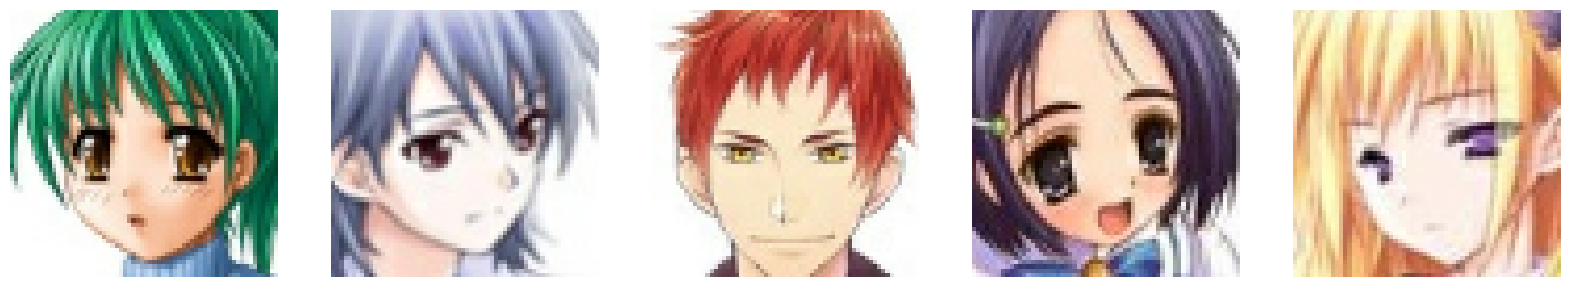

generated images


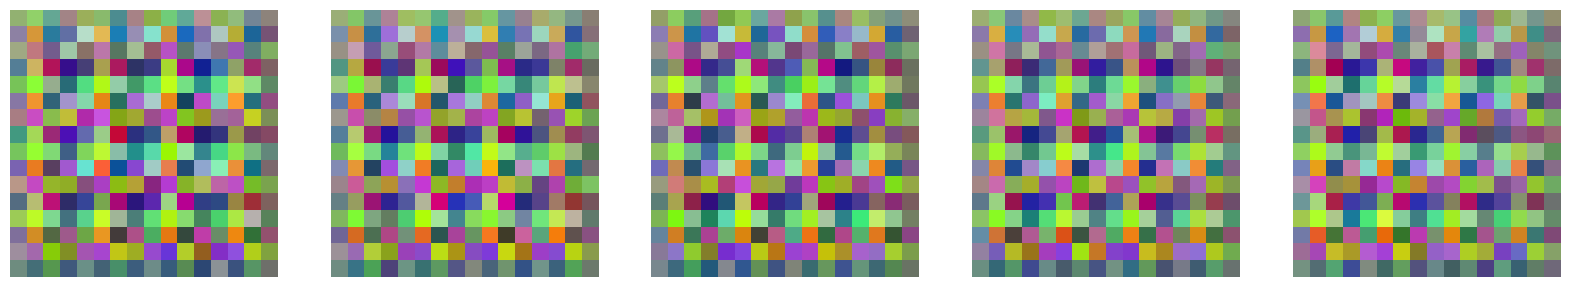

Time for epoch 1 is 223.46474933624268 sec


In [46]:
epochs=1

discriminator=make_discriminator()

generator= make_generator()


for epoch in range(epochs):

    #data for the true distribution of your real data samples training ste
    start = time.time()
    i=0
    for X in tqdm(normalized_ds, desc=f"epoch {epoch+1}", total=len(normalized_ds)):

        i+=1
        if i%1000:
            print("epoch {}, iteration {}".format(epoch+1, i))

        train_step(X)


    noise = tf.random.normal([BATCH_SIZE, 1, 1, latent_dim])
    Xhat=generator(noise,training=False)
    X=[x for x in normalized_ds]
    print("orignal images")
    plot_array(X[0])
    print("generated images")
    plot_array(Xhat)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

As you can see that, with only one epoch of training and a reduced number of training images, our GAN didn't learn much information, and thus, the generator wasn't able to produce images that make sense to human eyes. There are two quick actions you can take to try to improve the results:

1. Re-train the GAN using the full dataset that has 63,632 images.
    - To do so, simply go back to the **Loading the Dataset** section in **DCGANs**, replace the url of the dataset with "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module5/L2/cartoon_data.tgz", change the `directory` argument in `tf.keras.utils.image_dataset_from_directory` to `'cartoon_data'` in **Creating data generator** section and re-run all the cells.
    - Note that using more training data does allows the model to learn better and perform better, but it will result in longer training time! **With 63K training images and batch size of 128, your model will train for ~497 iterations.**


2. Use a pre-trained generator model to generate images.
    - You don't need to experience the training time at all!
    - Proceed to the next subsection to load a pre-trained model, and you will see that the generator trained with 150 epochs can produce almost realistic anime faces.


___Loading Pre-trained model (150 epochs)___


As you saw, training a GAN with only one epoch takes quite a long time. If we want to evaluate the performance of a fully trained and optimized GAN, we would need to increase the number of epochs.
Thus, to help you **avoid extremely long training time** in this lab, we will just **download the pre-trained Generator network parameters** and then use Kera `load_model` function to obtain a **pre-trained Generator**, which we will use to generate images directly.


In [47]:
generator_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/data/generator.tar"
await skillsnetwork.prepare(generator_url, overwrite=True)

  0%|          | 0/7 [00:00<?, ?it/s]

Saved to '.'


Load the generator:


In [48]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import TFSMLayer

# Assuming the 'generator' directory contains a SavedModel
full_generator = TFSMLayer("generator", call_endpoint='serving_default')

Let's generate several images using the fully trained Generator and display them:


dict_keys(['conv_transpose_5'])


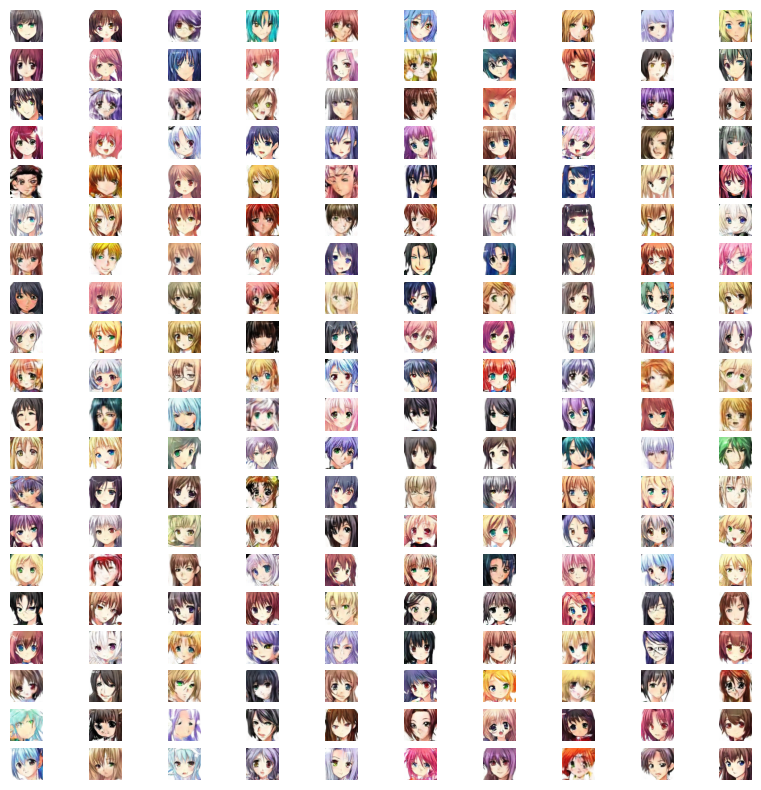

In [49]:
import tensorflow as tf
from tensorflow.keras.layers import TFSMLayer
import matplotlib.pyplot as plt

# Load the generator model using TFSMLayer for inference
full_generator = TFSMLayer("generator", call_endpoint='serving_default')

latent_dim = 100

# Generate noise vectors
noise = tf.random.normal([200, 1, 1, latent_dim])

# Feed the noise vectors to the generator
Xhat_dict = full_generator(noise, training=False)

# Identify the correct key in the dictionary
print(Xhat_dict.keys())  # This will display the available keys

# Access the tensor output from the dictionary
Xhat = Xhat_dict['conv_transpose_5']  # Replace 'conv_transpose_5' with the actual key

# Normalize the values to [0, 1] for display
Xhat = tf.clip_by_value((Xhat - tf.reduce_min(Xhat)) / (tf.reduce_max(Xhat) - tf.reduce_min(Xhat)), 0, 1)

# Define a function to plot generated samples
def plot_array(array):
    num_images = array.shape[0]
    num_cols = 10
    num_rows = num_images // num_cols

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(array[i].numpy().squeeze(), cmap="gray")  # adjust for color channels if needed
        plt.axis("off")
    plt.show()

# Plot the generated images
plot_array(Xhat)

## Explore Latent Variables

Values of $\mathbf{z}$ that are relatively close together will produce similar images. For example, we can assigns elements of $\mathbf{z}$ close values such as $[1,0.8,..,0.4]$.


dict_keys(['conv_transpose_5'])


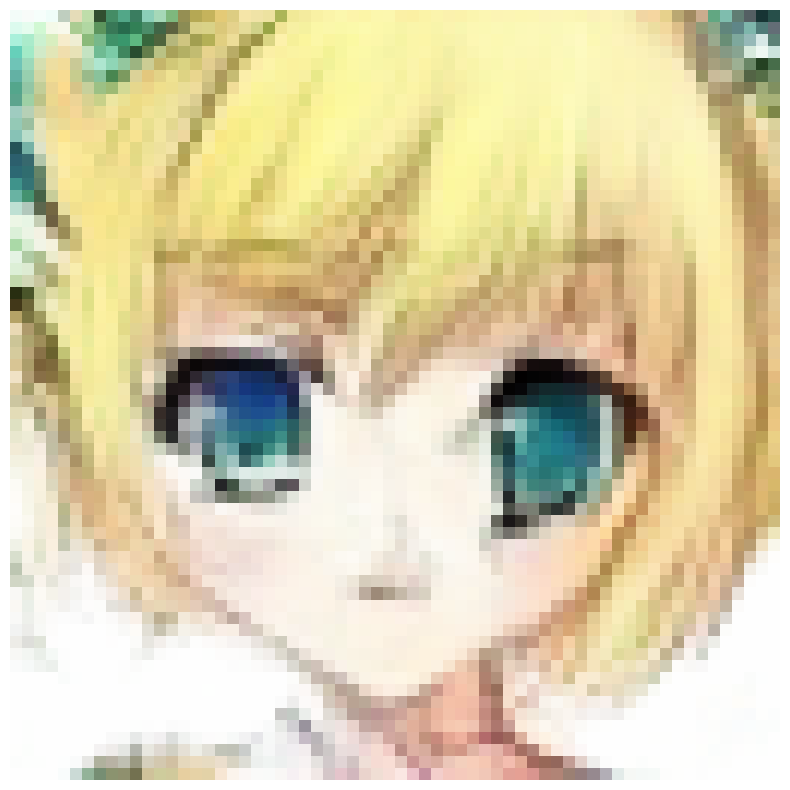

dict_keys(['conv_transpose_5'])


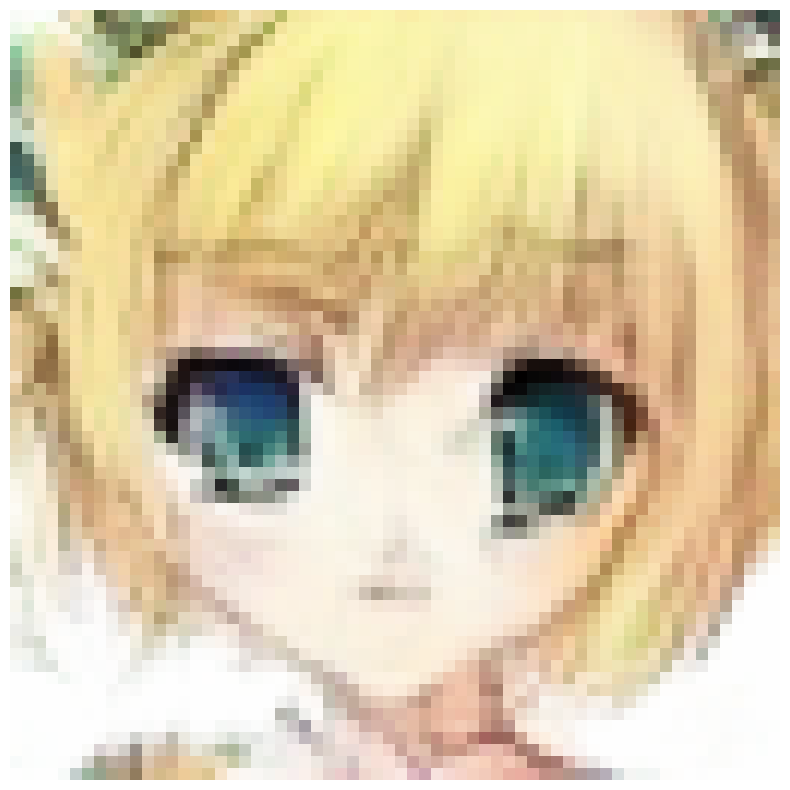

dict_keys(['conv_transpose_5'])


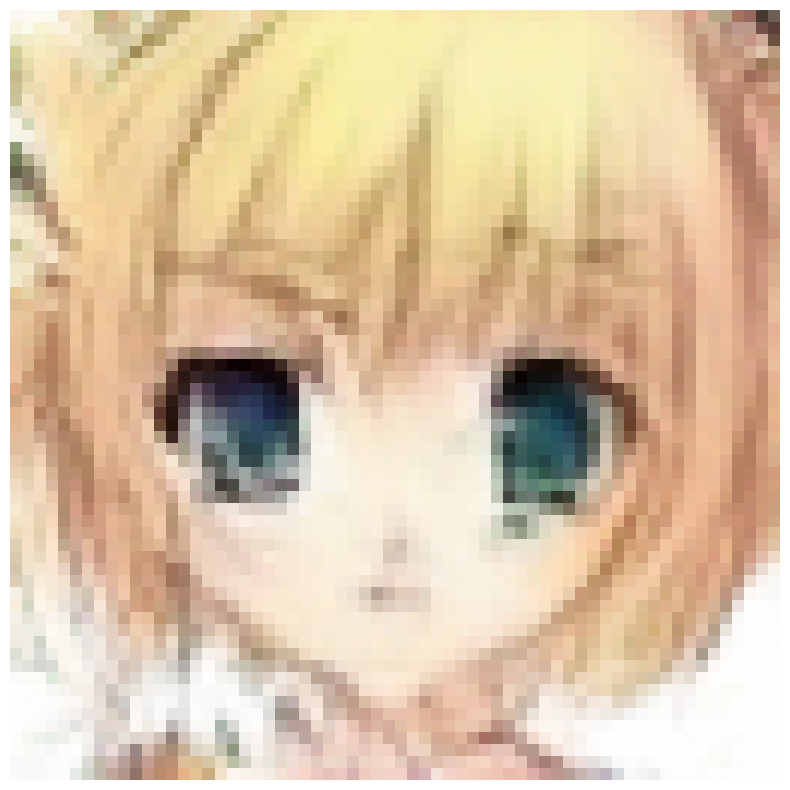

dict_keys(['conv_transpose_5'])


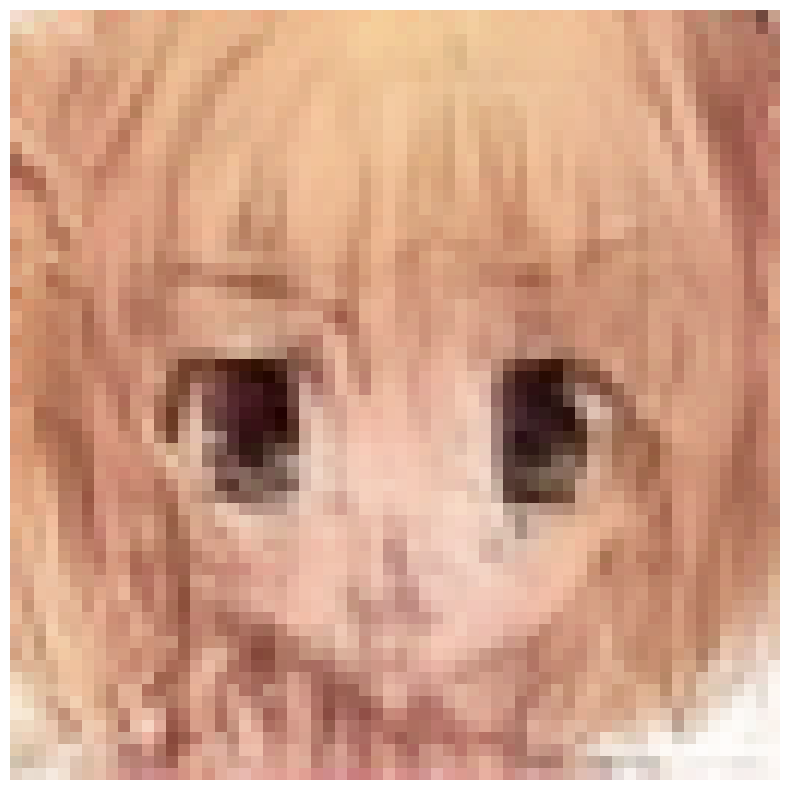

In [50]:
import tensorflow as tf
from tensorflow.keras.layers import TFSMLayer
import matplotlib.pyplot as plt

# Load the generator model using TFSMLayer for inference
full_generator = TFSMLayer("generator", call_endpoint='serving_default')

latent_dim = 100

# Function to normalize the tensor to the [0, 1] range for display
def normalize_for_display(tensor):
    return tf.clip_by_value((tensor - tf.reduce_min(tensor)) / (tf.reduce_max(tensor) - tf.reduce_min(tensor)), 0, 1)

# Function to plot generated samples
def plot_array(array):
    num_images = array.shape[0]
    num_cols = min(num_images, 10)  # Limit to 10 columns
    num_rows = (num_images + num_cols - 1) // num_cols  # Adjust number of rows based on total images

    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(array[i].numpy().squeeze(), cmap="gray")  # Adjust for grayscale or RGB
        plt.axis("off")
    plt.show()

# Generate and plot images with different scaling factors
for c in [1, 0.8, 0.6, 0.4]:
    noise = c * tf.ones([1, 1, 1, latent_dim])
    Xhat_dict = full_generator(noise, training=False)

    # Print keys to confirm the correct key in Xhat_dict if needed
    print(Xhat_dict.keys())  # Remove this after identifying the correct key

    # Replace 'conv_transpose_5' with the actual key if different
    Xhat = Xhat_dict.get('conv_transpose_5')  # Adjust if key differs
    if Xhat is not None:
        Xhat = normalize_for_display(Xhat)  # Normalize for display
        plot_array(Xhat)
    else:
        print("The specified key was not found in the output dictionary.")

### Exercise 1

Plot the generated images by the Generator with elements of $\mathbf{z}$ equal $[-1,-0.8,-0.6,-0.4]$.


Available keys: dict_keys(['conv_transpose_5'])
Available keys: dict_keys(['conv_transpose_5'])
Available keys: dict_keys(['conv_transpose_5'])
Available keys: dict_keys(['conv_transpose_5'])


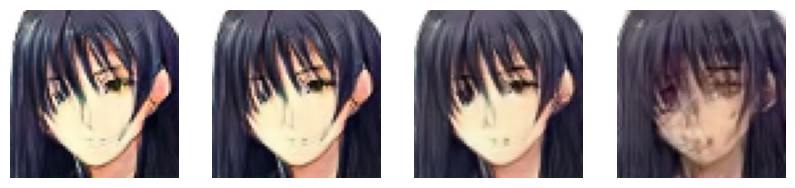

In [51]:
import tensorflow as tf
from tensorflow.keras.layers import TFSMLayer
import matplotlib.pyplot as plt

# Load the generator model using TFSMLayer for inference
full_generator = TFSMLayer("generator", call_endpoint='serving_default')
latent_dim = 100

def normalize_for_display(tensor):
    """Normalize tensor values to [0, 1] range for display."""
    return tf.clip_by_value((tensor - tf.reduce_min(tensor)) / (tf.reduce_max(tensor) - tf.reduce_min(tensor)), 0, 1)

def generate_images(c_values):
    """
    Menghasilkan gambar dari nilai c yang berbeda.

    Args:
      c_values: Daftar nilai c.

    Returns:
      Tensor gambar yang dihasilkan.
    """
    all_images = []
    for c in c_values:
        # Generate image using the generator
        xhat_dict = full_generator(-c * tf.ones([1, 1, 1, latent_dim]), training=False)

        # Print keys to confirm correct output key if necessary
        print("Available keys:", xhat_dict.keys())

        # Access the correct tensor key from xhat_dict
        # Replace 'conv_transpose_5' with actual key if different
        xhat = xhat_dict.get('conv_transpose_5')
        if xhat is not None:
            xhat = normalize_for_display(xhat)  # Normalize each image
            all_images.append(xhat)
        else:
            print("Key 'conv_transpose_5' not found in the output dictionary.")

    return tf.concat(all_images, axis=0)

# Generate images for different c values
c_values = [1, 0.8, 0.6, 0.4]
images = generate_images(c_values)

# Plot images
plot_array(images)

<details>
    <summary>Click here for Solution</summary>

```python
for c in [1,0.8,0.6,0.4]:
    Xhat=full_generator(-c*tf.ones([1, 1, 1, latent_dim]),training=False)
    plot_array(Xhat)
 ```   

</details>


Available keys: dict_keys(['conv_transpose_5'])


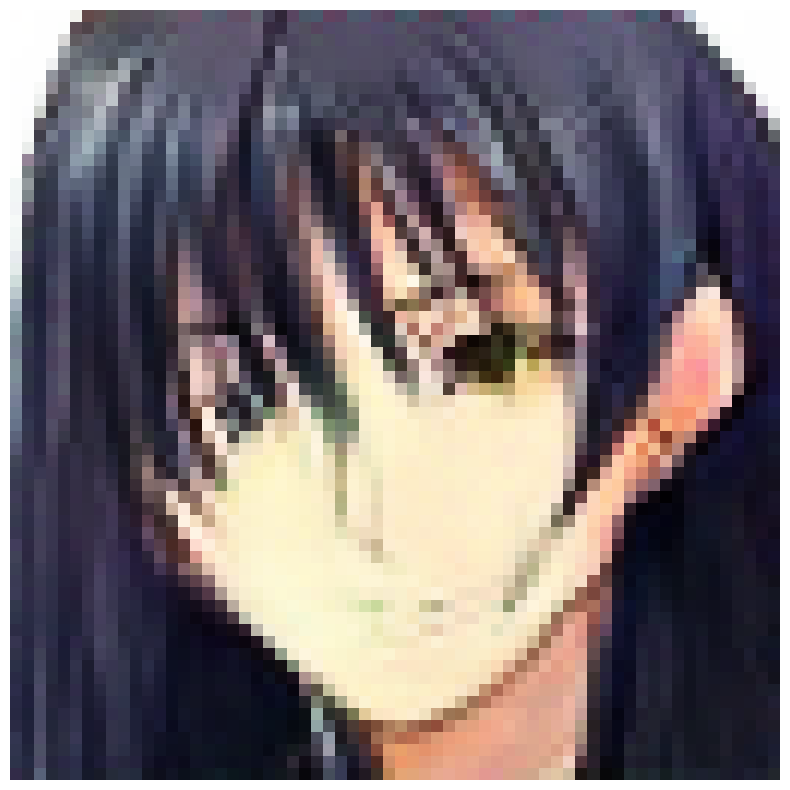

Available keys: dict_keys(['conv_transpose_5'])


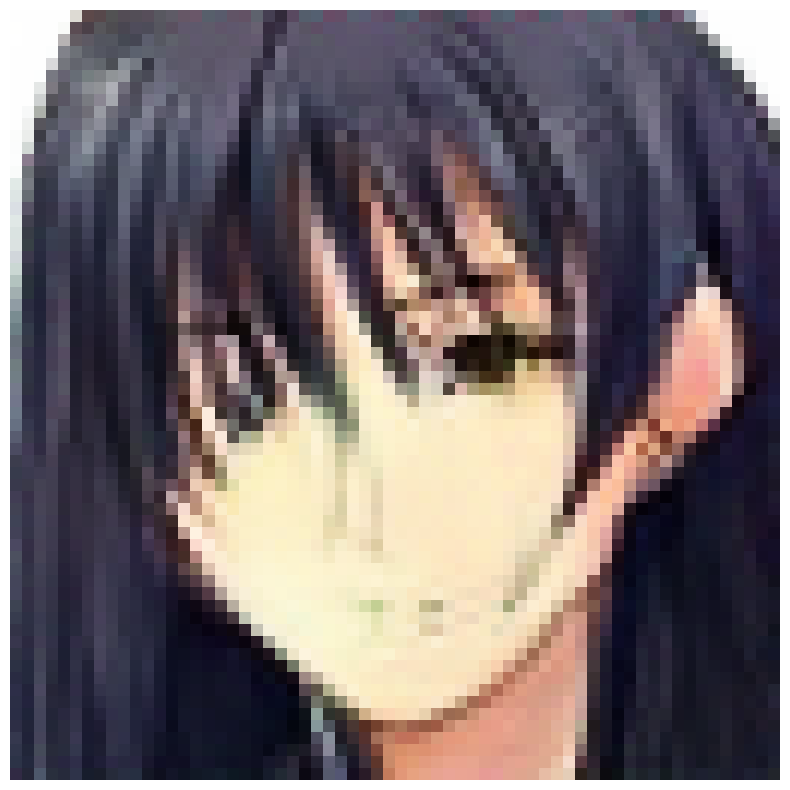

Available keys: dict_keys(['conv_transpose_5'])


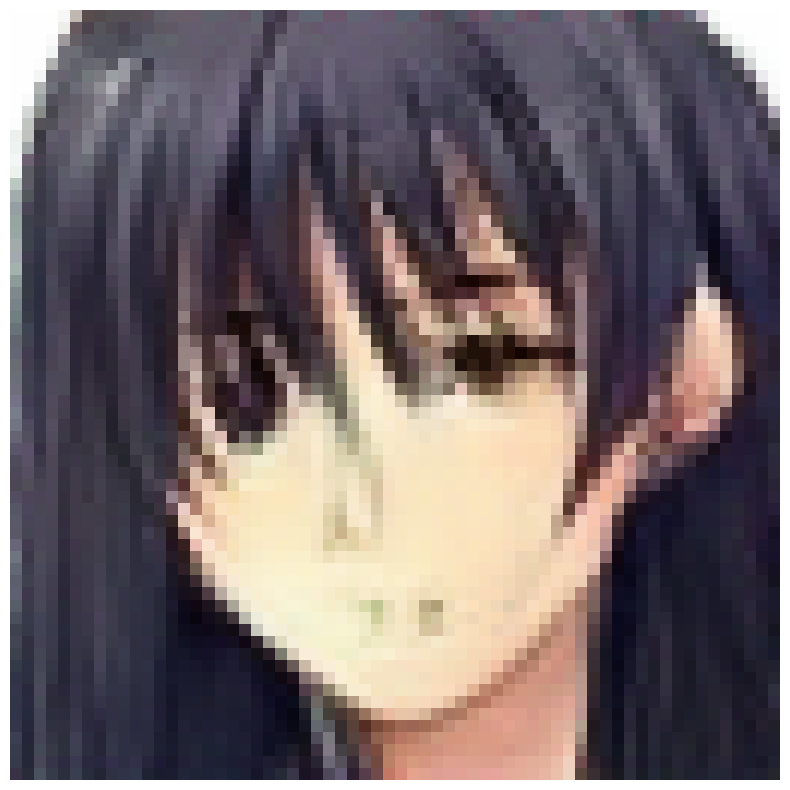

Available keys: dict_keys(['conv_transpose_5'])


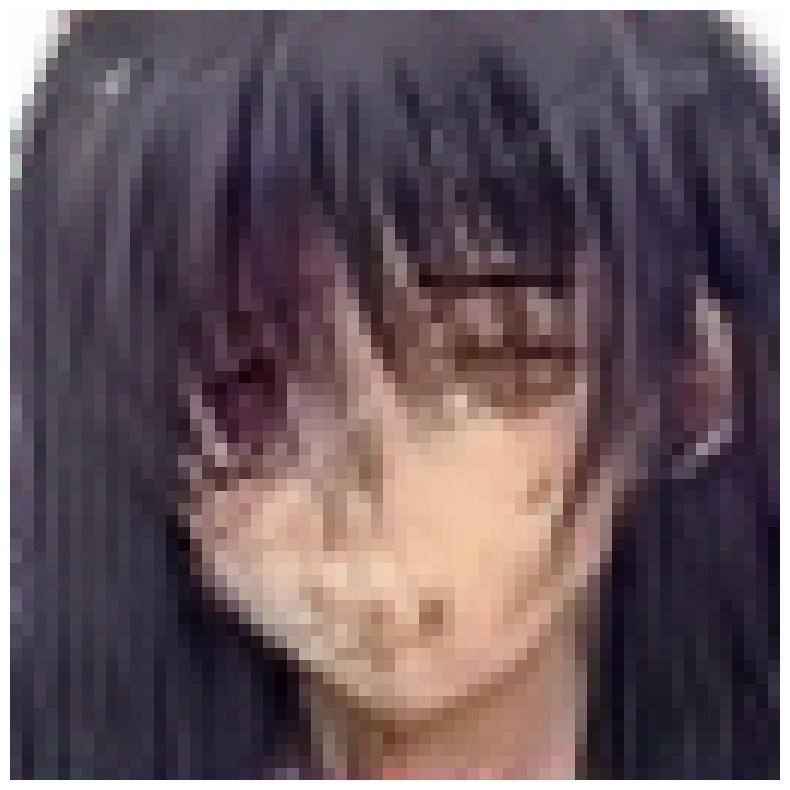

In [52]:
'''
Alternative Solution for Exercise 1
'''

def normalize_for_display(tensor):
    """Normalize tensor values to the [0, 1] range for display."""
    return tf.clip_by_value((tensor - tf.reduce_min(tensor)) / (tf.reduce_max(tensor) - tf.reduce_min(tensor)), 0, 1)

for c in [1, 0.8, 0.6, 0.4]:
    # Generate the output dictionary from the generator
    Xhat_dict = full_generator(-c * tf.ones([1, 1, 1, latent_dim]), training=False)

    # Print keys to verify the correct one if necessary
    print("Available keys:", Xhat_dict.keys())

    # Access the tensor output; adjust key if different
    if 'conv_transpose_5' in Xhat_dict:
        Xhat = Xhat_dict['conv_transpose_5']
        Xhat = normalize_for_display(Xhat)  # Normalize for display

        # Plot the normalized tensor
        plot_array(Xhat)

We can see how changing the latent variable changes the generated image. Here we alter more and more subsequent values of $\mathbf{z}$ from 1 to -1; we see the images change accordingly; this is evident in the anime character's hair color:


Elements from 0 to 10 are set to -1


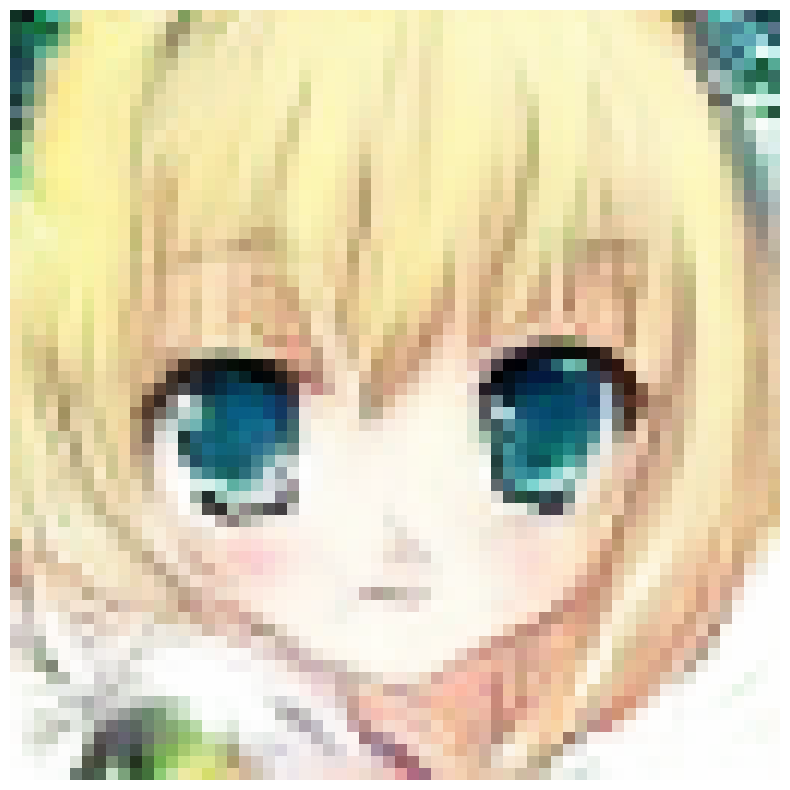

Elements from 0 to 20 are set to -1


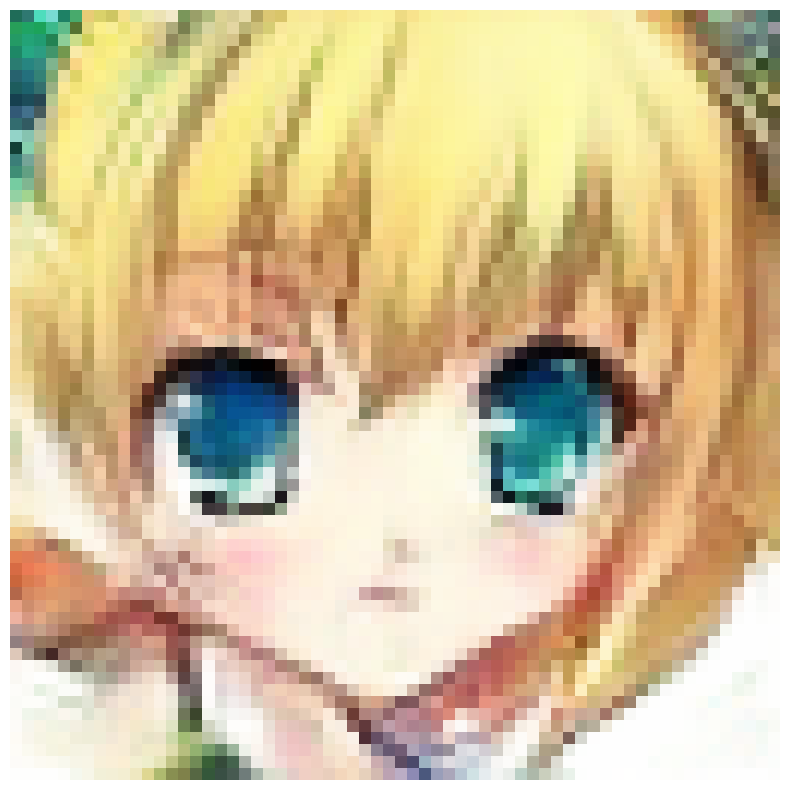

Elements from 0 to 30 are set to -1


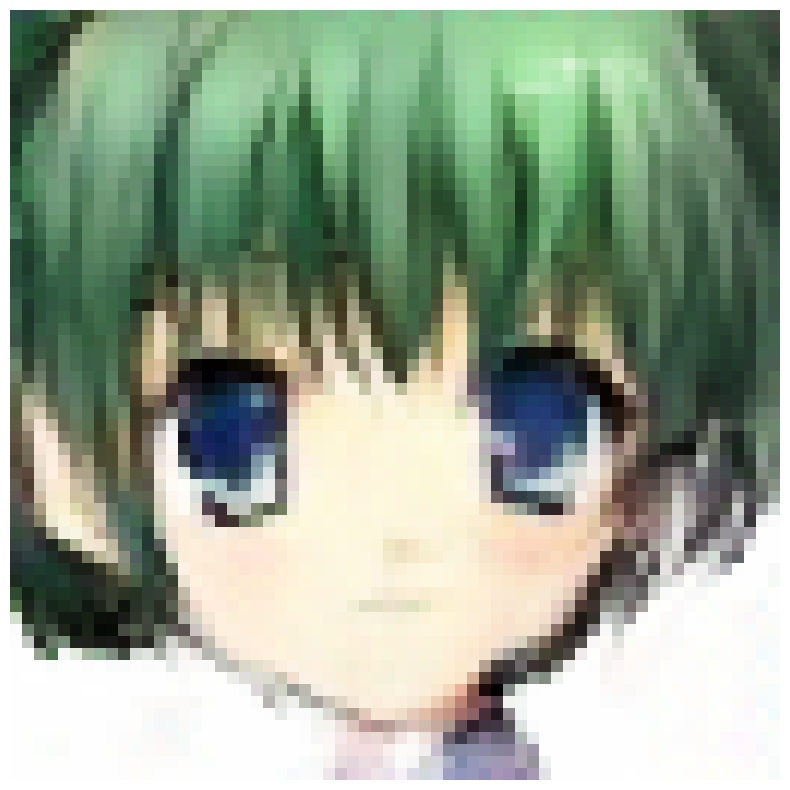

Elements from 0 to 40 are set to -1


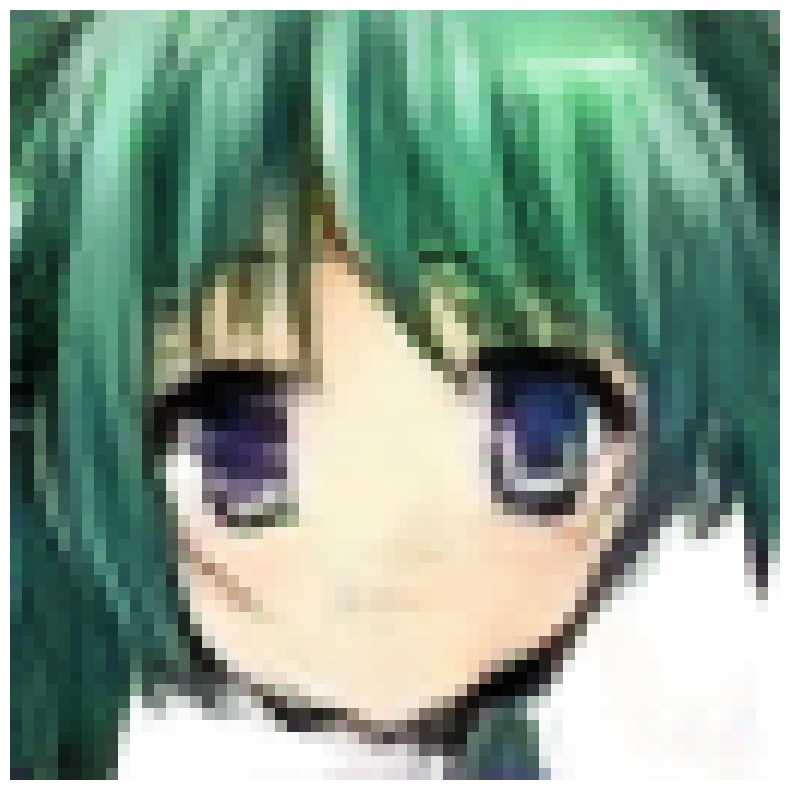

Elements from 0 to 50 are set to -1


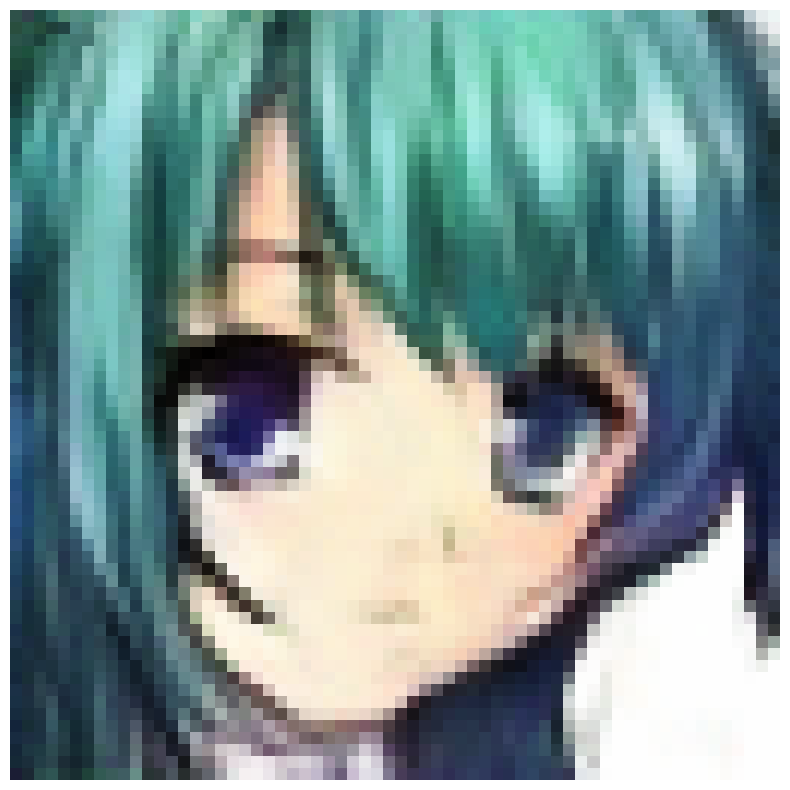

Elements from 0 to 60 are set to -1


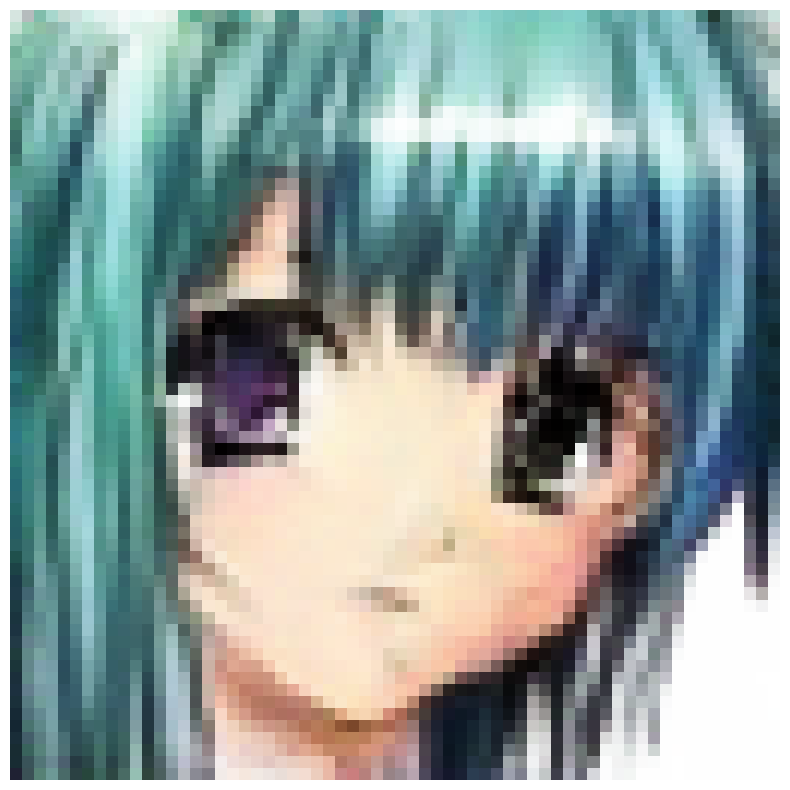

Elements from 0 to 70 are set to -1


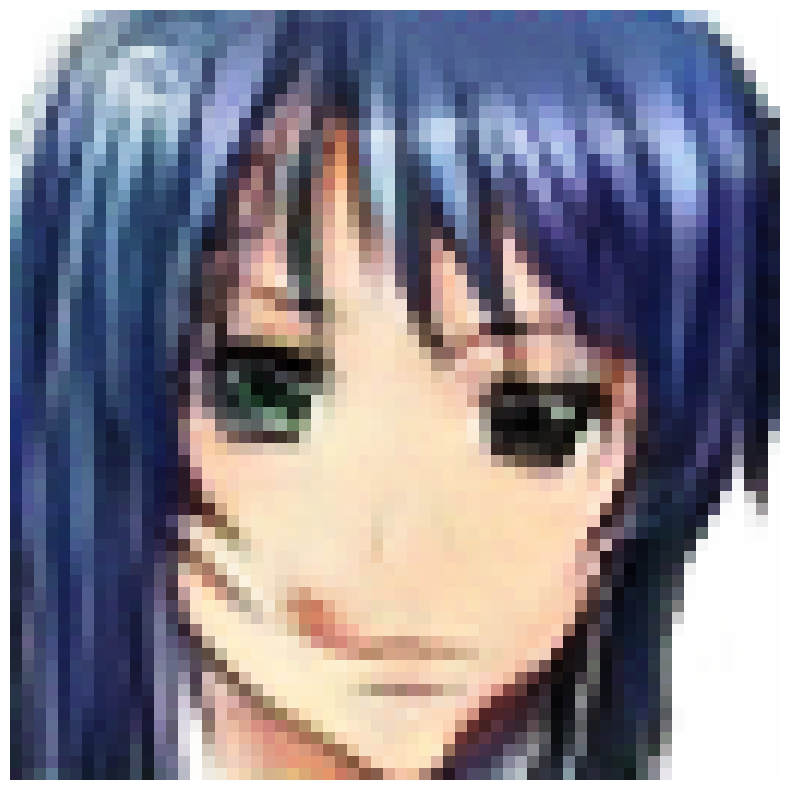

Elements from 0 to 80 are set to -1


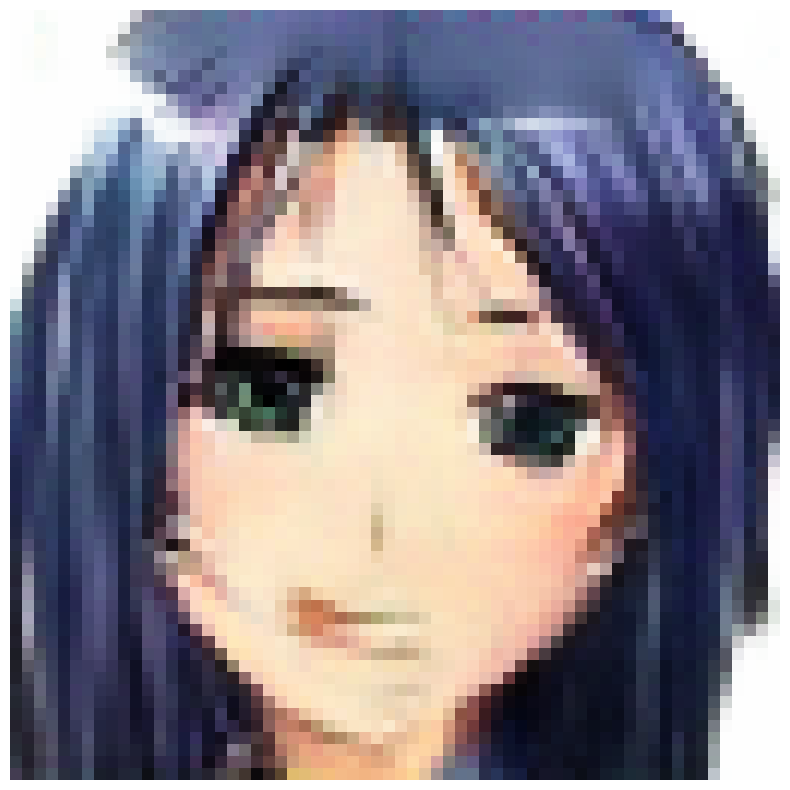

Elements from 0 to 90 are set to -1


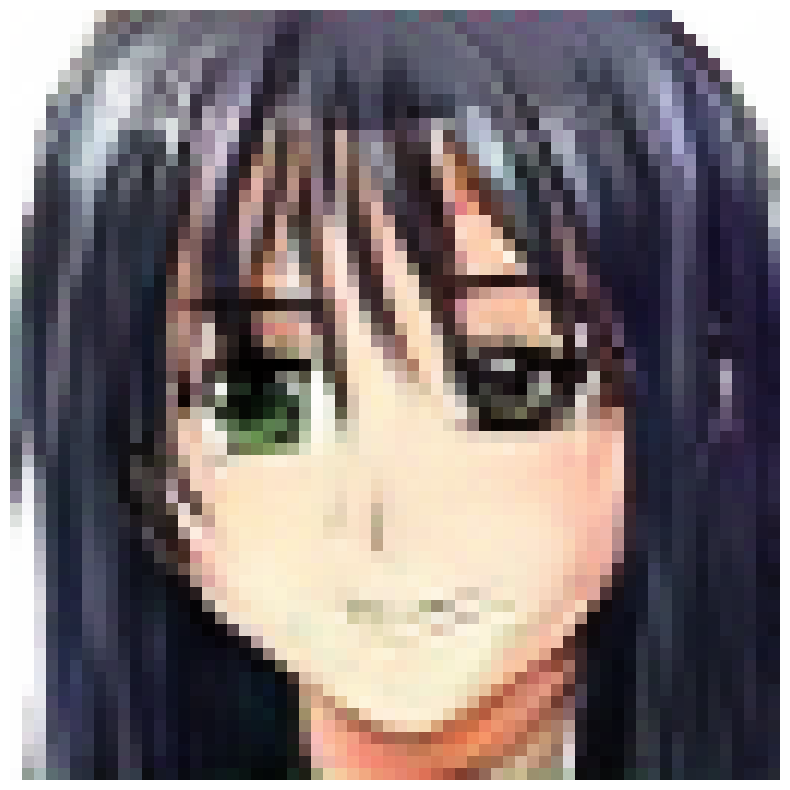

Elements from 0 to 100 are set to -1


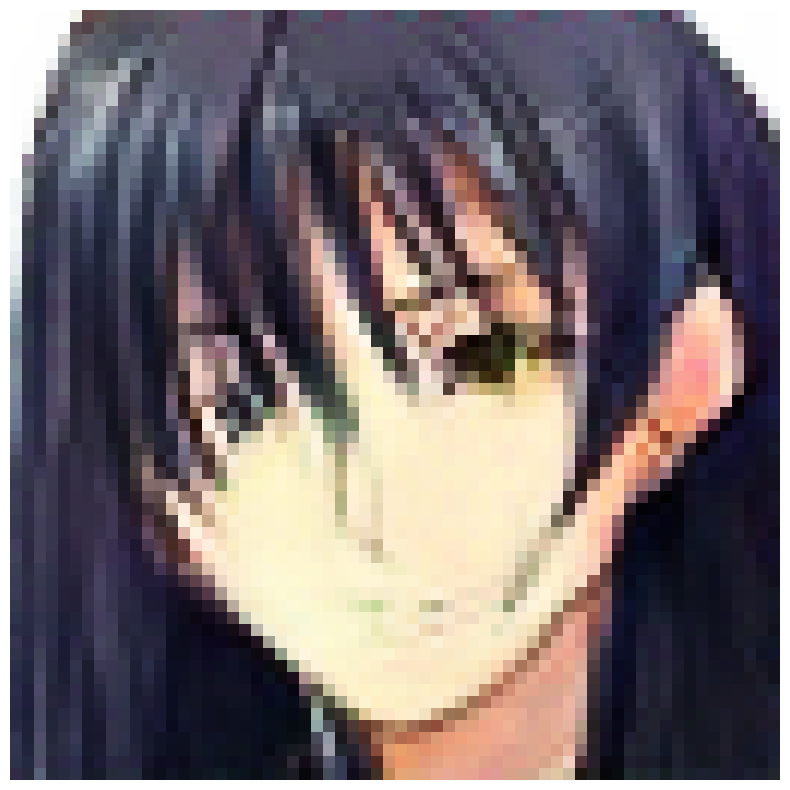

In [53]:
import numpy as np
import tensorflow as tf

# Assuming full_generator is already defined and loaded
latent_dim = 100  # Define the latent dimension

# Initialize z with ones
z = np.ones((1, 1, 1, latent_dim), dtype=np.float32)

# Function to normalize the tensor to [0, 1] for display
def normalize_for_display(tensor):
    return tf.clip_by_value((tensor - tf.reduce_min(tensor)) / (tf.reduce_max(tensor) - tf.reduce_min(tensor)), 0, 1)

for n in range(1, 11):  # Adjust to start from 1 to avoid modifying `z[0:0]`
    limit = min(10 * n, latent_dim)  # Ensure we don't exceed the latent dimension
    z[0, 0, 0, 0:limit] = -1  # Modify the latent vector elements

    # Generate the output from the generator
    Xhat_dict = full_generator(tf.convert_to_tensor(z), training=False)

    # Access and normalize the generated output
    if 'conv_transpose_5' in Xhat_dict:
        Xhat = Xhat_dict['conv_transpose_5']
        Xhat = normalize_for_display(Xhat)  # Normalize for display

        print("Elements from 0 to {} are set to -1".format(limit))
        plot_array(Xhat)  # Plot the generated images
    else:
        print("Key 'conv_transpose_5' not found in the output dictionary.")

### Exercise 2

Repeat the above procedure but set the latent variable $z[0, 0, 0, 0:20*n] = -0.5*n$ each time `for n in range(5)`


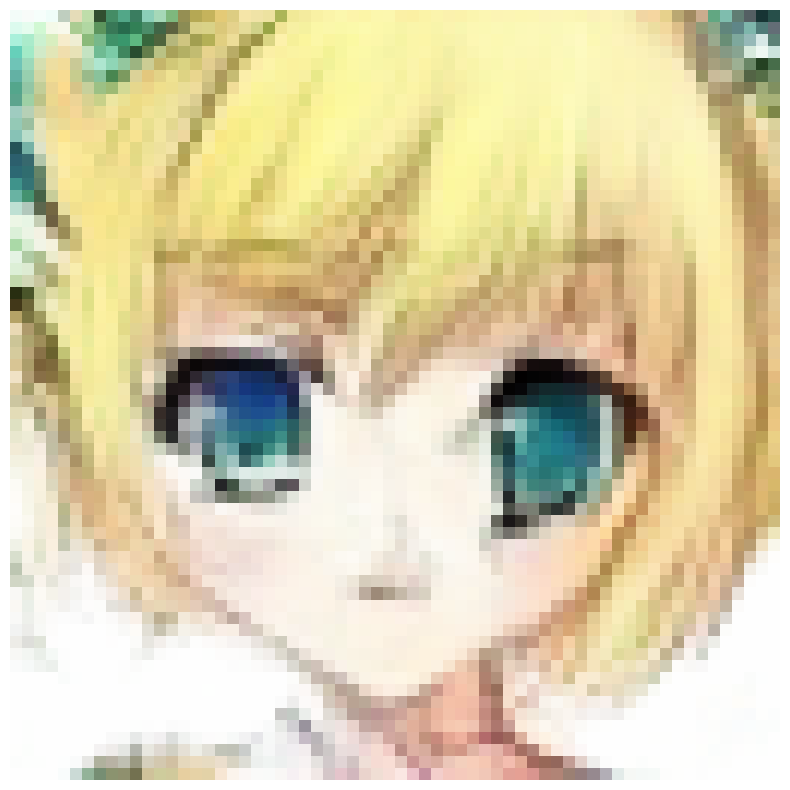

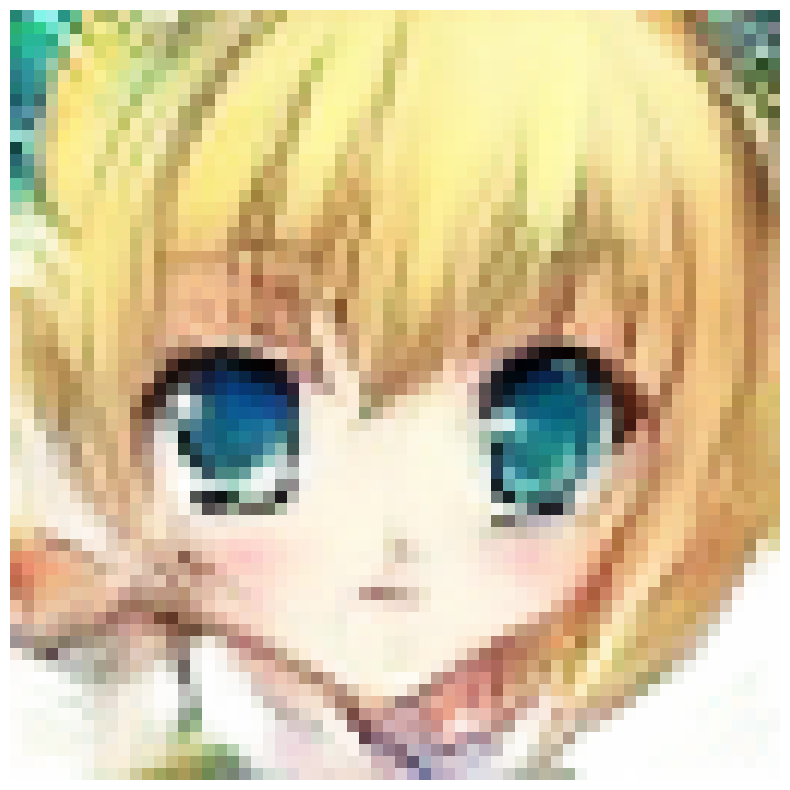

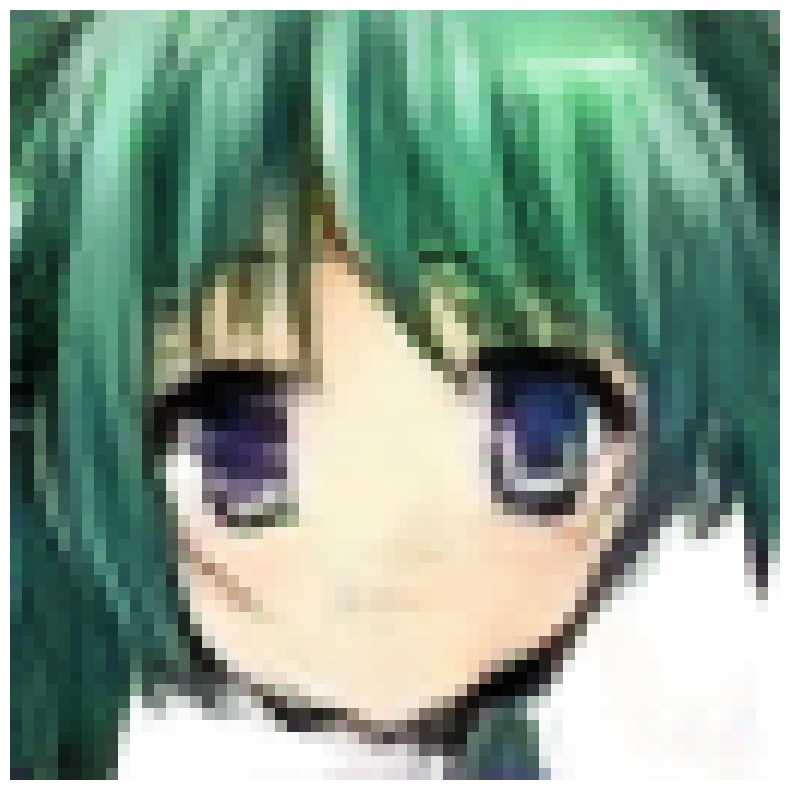

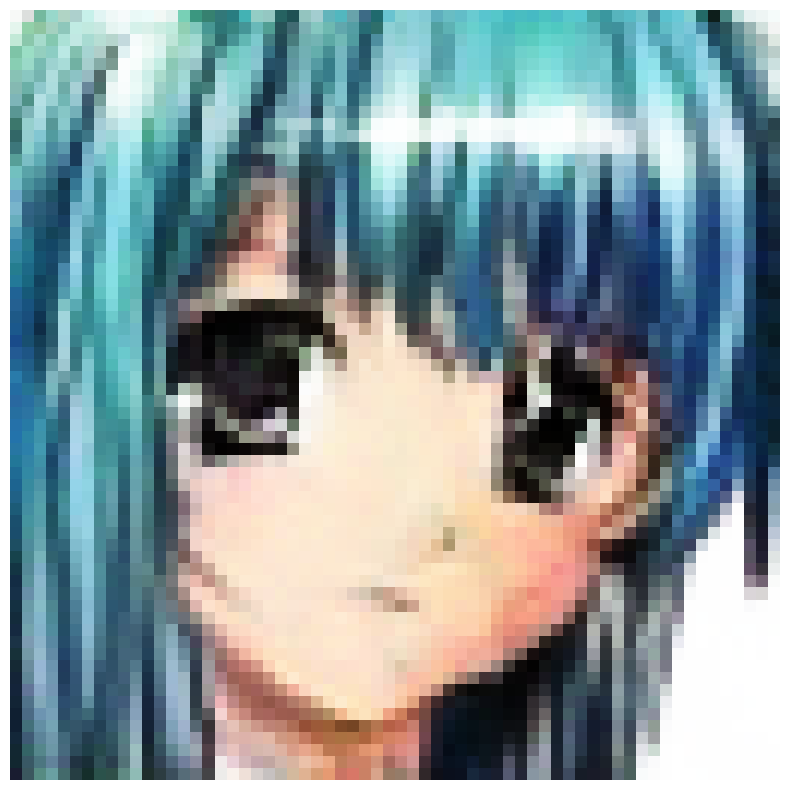

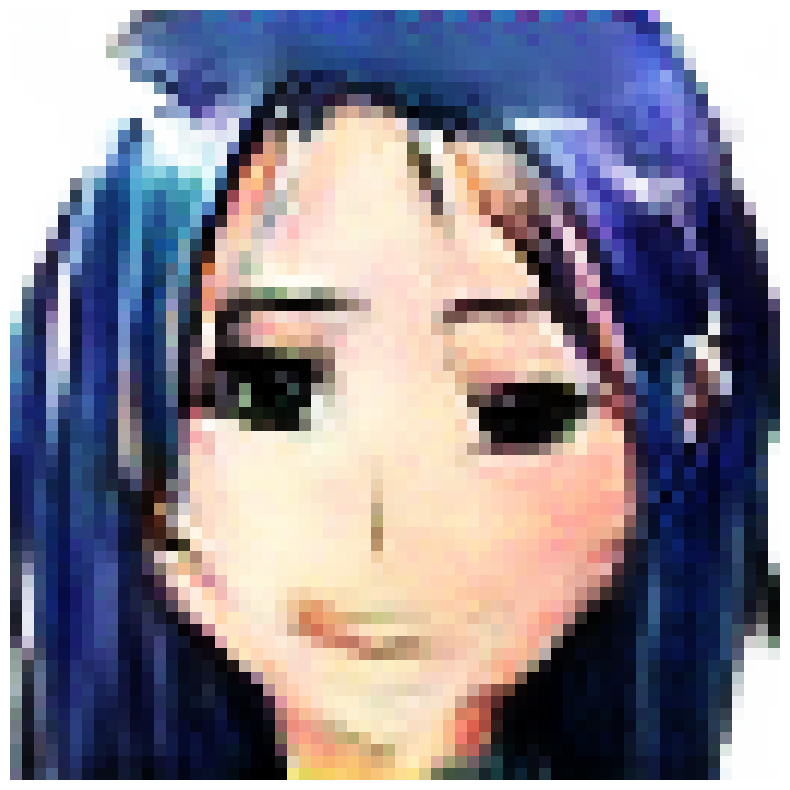

In [54]:
import numpy as np
import tensorflow as tf

def normalize_for_display(tensor):
    """Normalize tensor values to the [0, 1] range for display."""
    return tf.clip_by_value((tensor - tf.reduce_min(tensor)) / (tf.reduce_max(tensor) - tf.reduce_min(tensor)), 0, 1)

def generate_images_with_modified_z(n_iterations):
    """
    Generates images with modified latent variable for each iteration.

    Args:
      n_iterations: Number of iterations to perform.

    Returns:
      A list of generated images for each iteration.
    """
    all_images = []
    z = np.ones((1, 1, 1, latent_dim), dtype=np.float32)  # Initialize z

    for n in range(n_iterations):
        # Modify a portion of the latent vector within bounds
        limit = min(20 * n, latent_dim)
        z[:, :, :, :limit] = -0.5 * n  # Adjust values based on iteration

        # Convert z to TensorFlow tensor
        z_tensor = tf.convert_to_tensor(z)

        # Generate and store image
        xhat_dict = full_generator(z_tensor, training=False)  # Get the dictionary output
        if 'conv_transpose_5' in xhat_dict:  # Verify the correct key
            xhat = xhat_dict['conv_transpose_5']
            xhat = normalize_for_display(xhat)  # Normalize for display
            all_images.append(xhat)
        else:
            print("Key 'conv_transpose_5' not found in the output dictionary.")

    return all_images

# Generate images for 5 iterations
images = generate_images_with_modified_z(5)

# Plot each image
for image in images:
    plot_array(image)

<details>
    <summary>Click here for Solution</summary>

```python
z=np.ones( (1, 1, 1, latent_dim))
for n in range(5):

    z[0, 0, 0, 0:20*n]=-0.5*n

    Xhat=full_generator(z,training=False)

    plot_array(Xhat)
    

 ```   

</details>


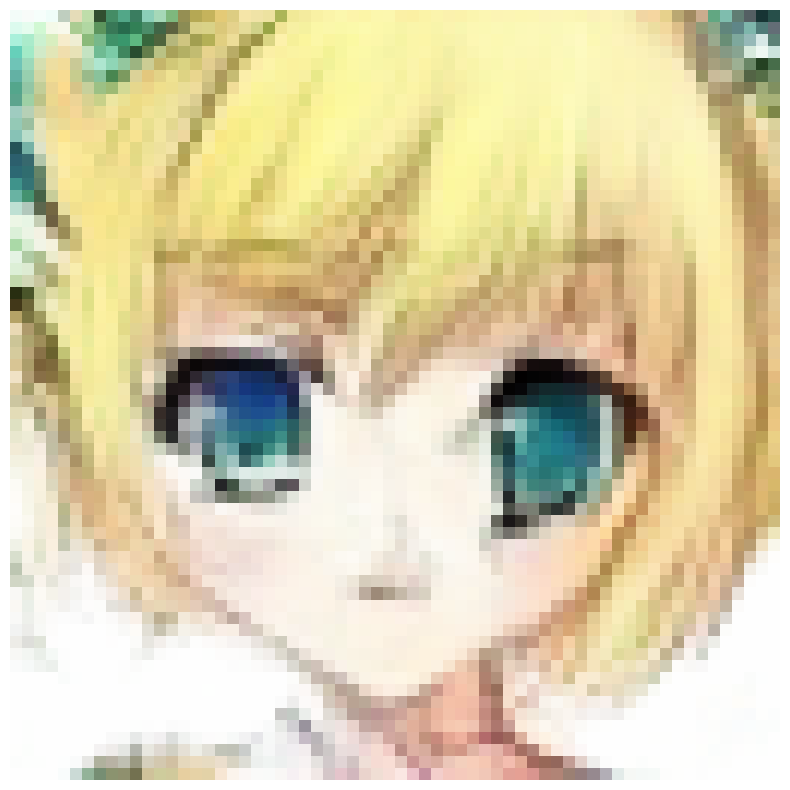

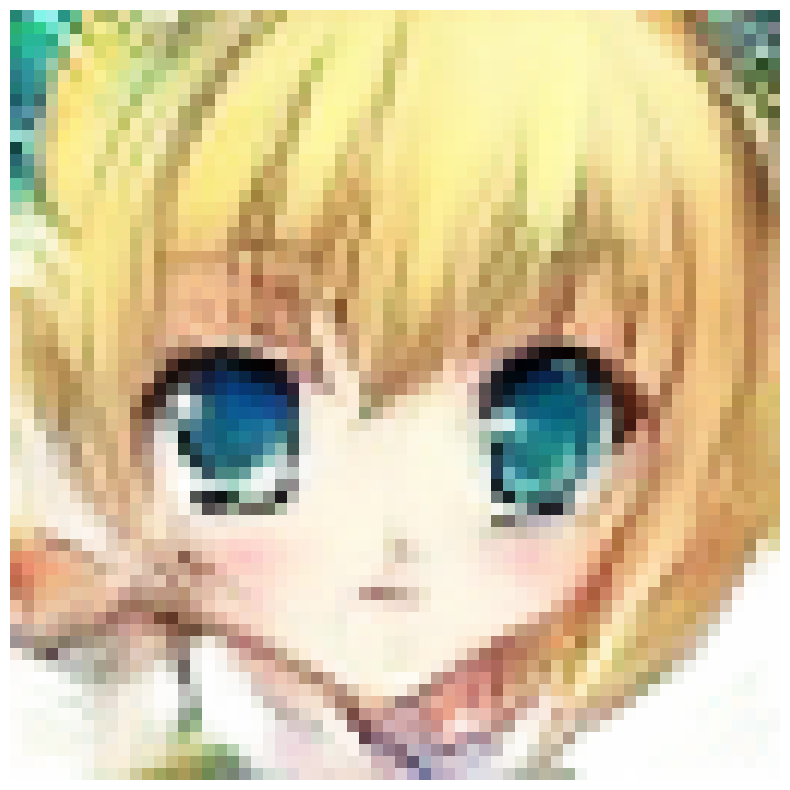

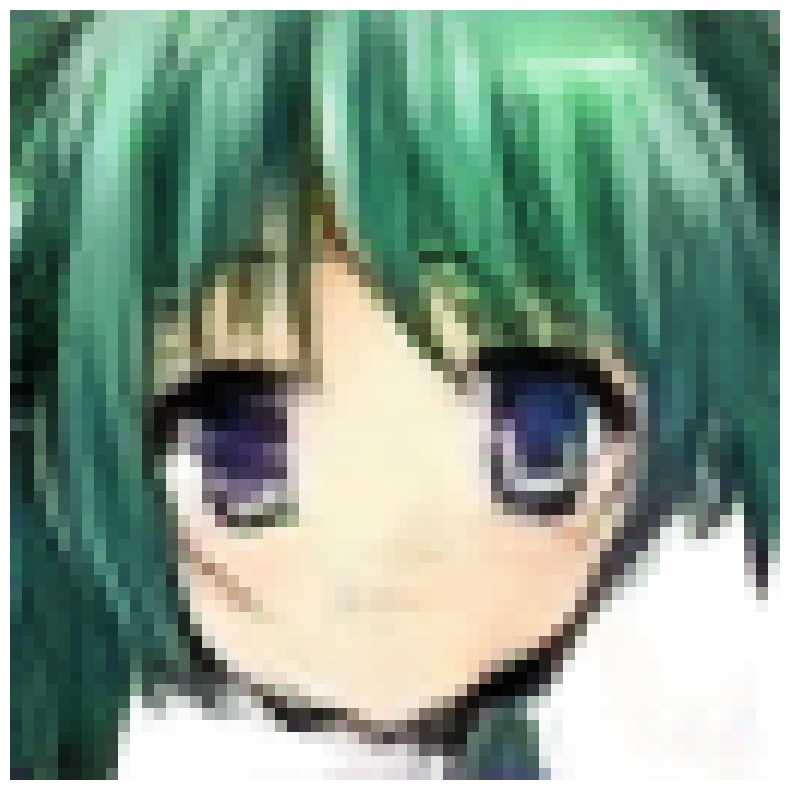

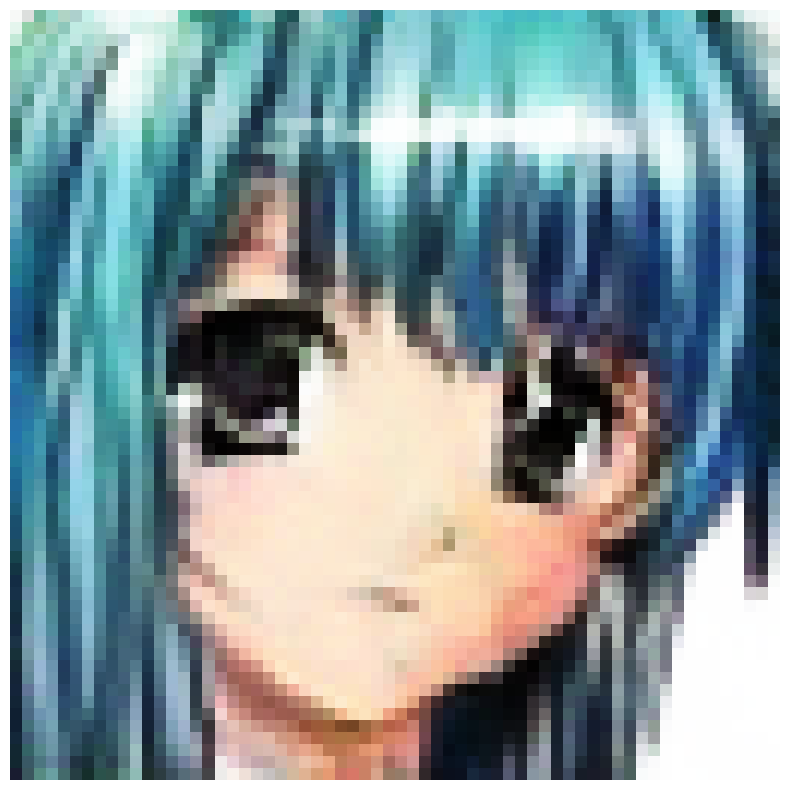

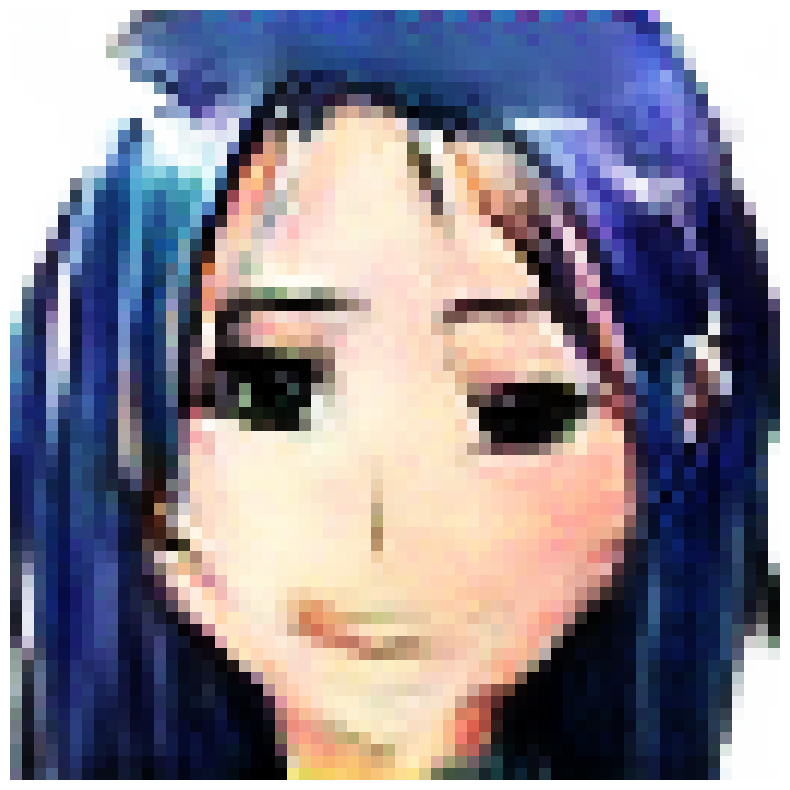

In [55]:
import numpy as np
import tensorflow as tf

# Function to normalize the tensor for display
def normalize_for_display(tensor):
    return tf.clip_by_value((tensor - tf.reduce_min(tensor)) / (tf.reduce_max(tensor) - tf.reduce_min(tensor)), 0, 1)

z = np.ones((1, 1, 1, latent_dim), dtype=np.float32)

for n in range(5):
    # Limit the modification range to avoid exceeding latent_dim
    limit = min(20 * n, latent_dim)
    z[0, 0, 0, :limit] = -0.5 * n

    # Generate image from the modified latent vector
    Xhat_dict = full_generator(tf.convert_to_tensor(z), training=False)

    # Access and normalize the generated output
    if 'conv_transpose_5' in Xhat_dict:
        Xhat = Xhat_dict['conv_transpose_5']
        Xhat = normalize_for_display(Xhat)  # Normalize the image for display

        # Plot the normalized image
        plot_array(Xhat)
    else:
        print("Key 'conv_transpose_5' not found in the output dictionary.")

We can also hold some of the elements of $\mathbf{z}$ constant and randomly change others. Here, we set the first 20 elements to one and randomly change the rest. We see that all through the images change, the hair color remains light.


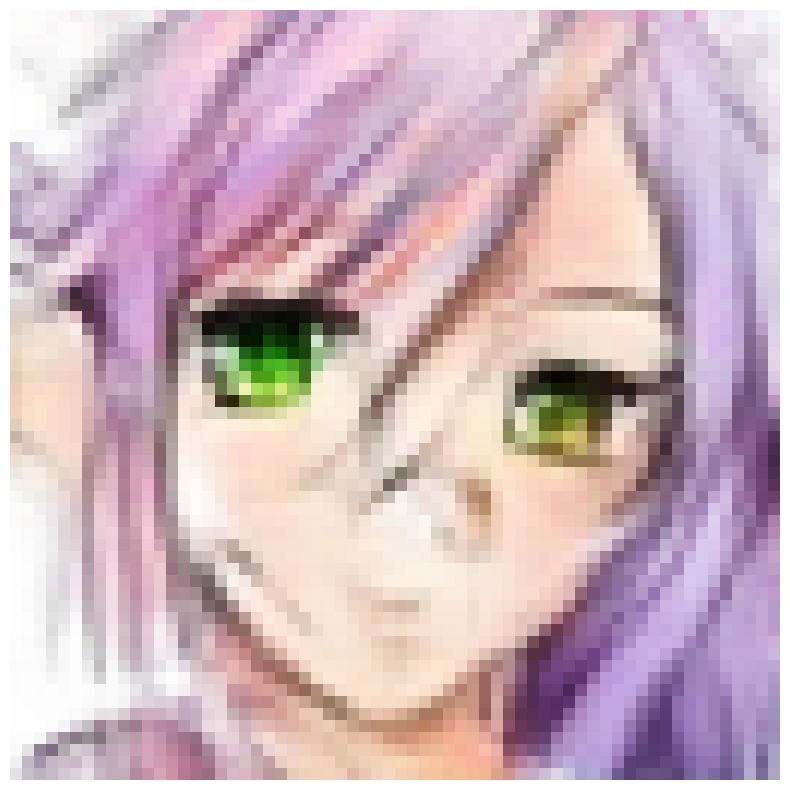

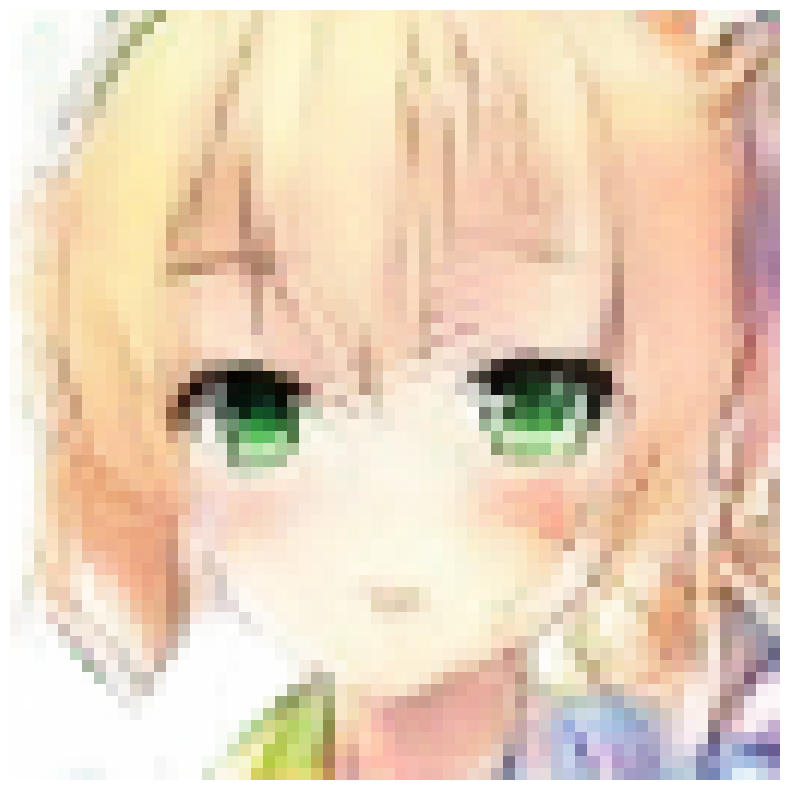

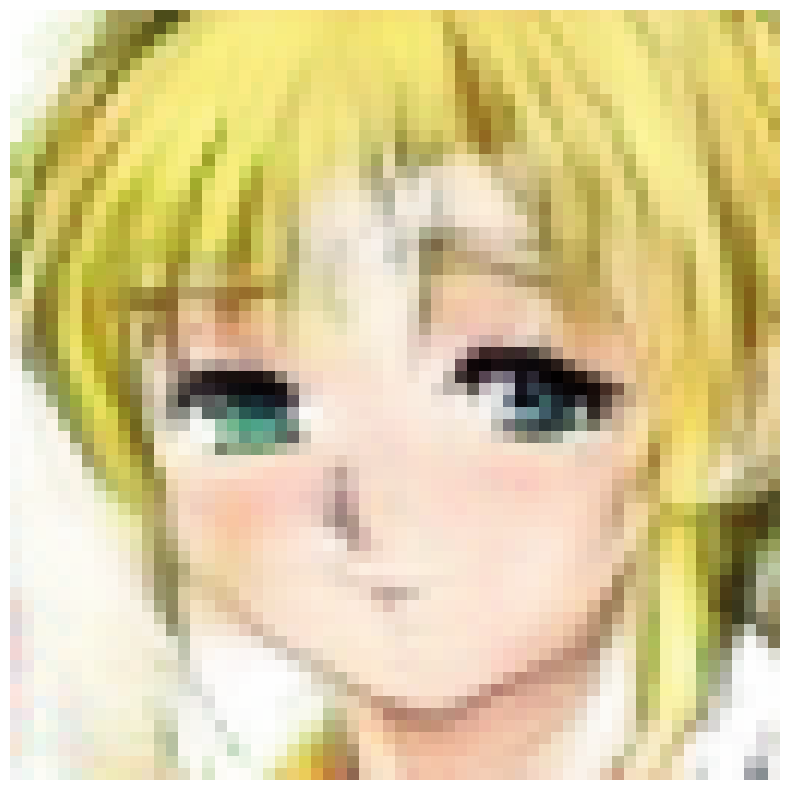

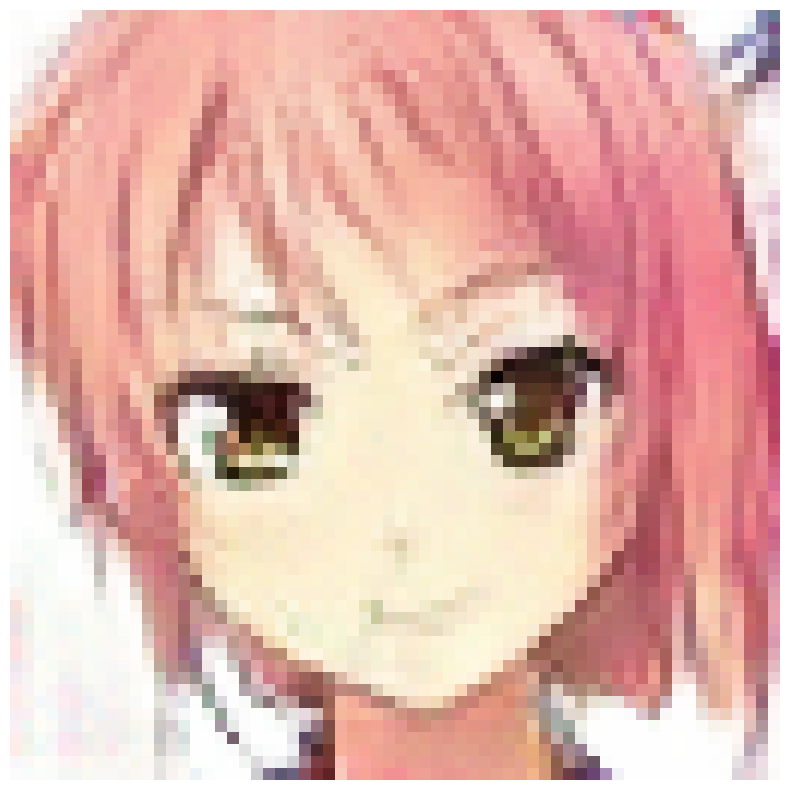

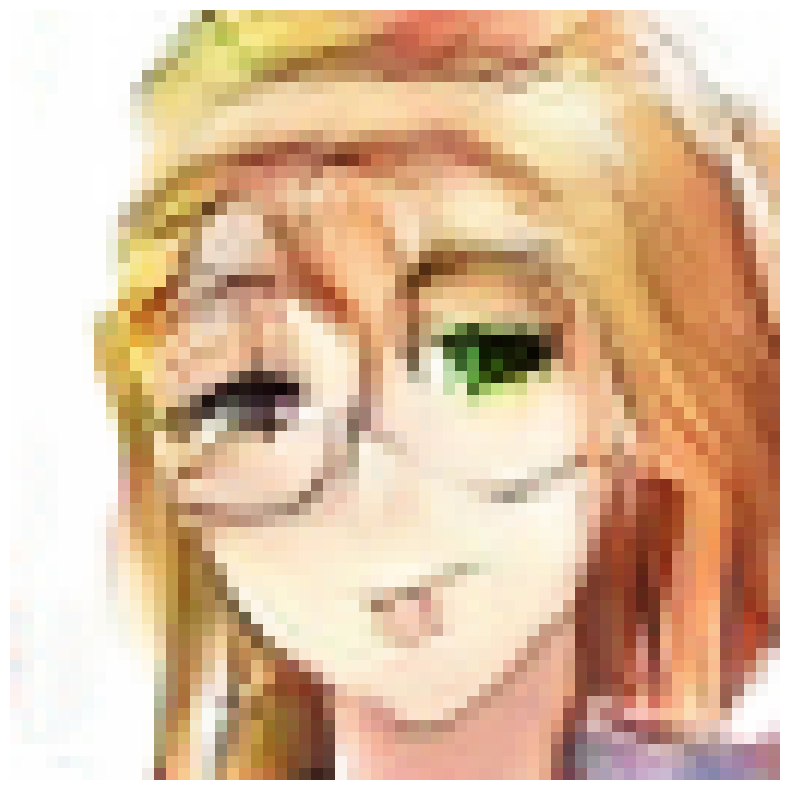

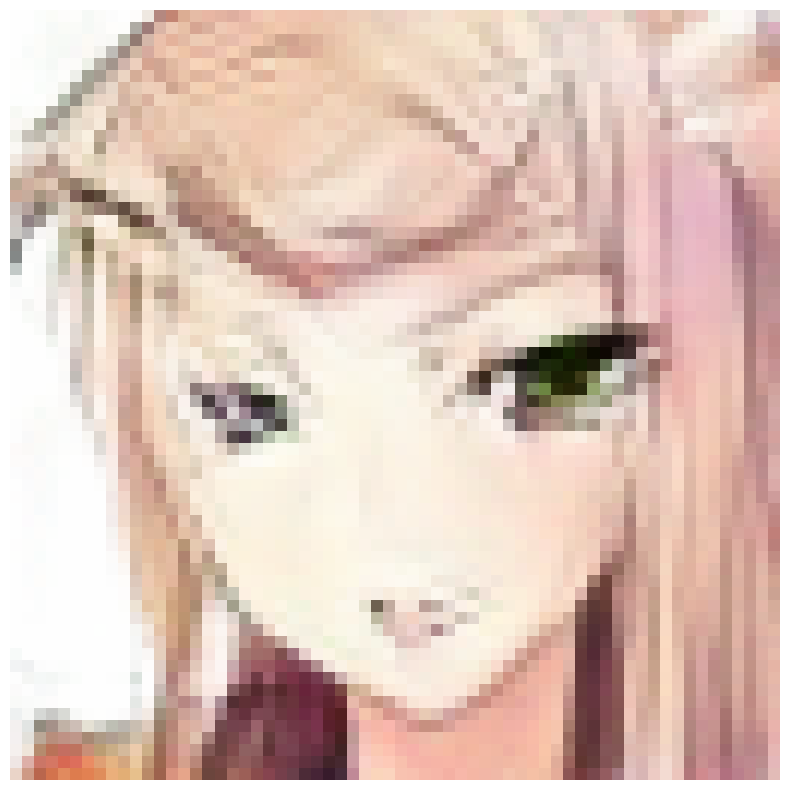

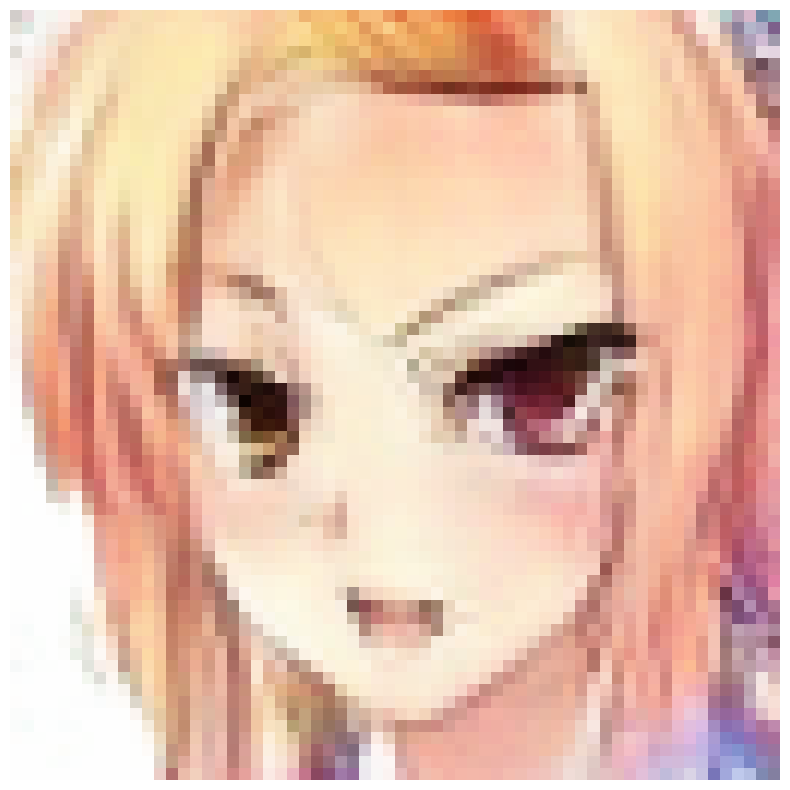

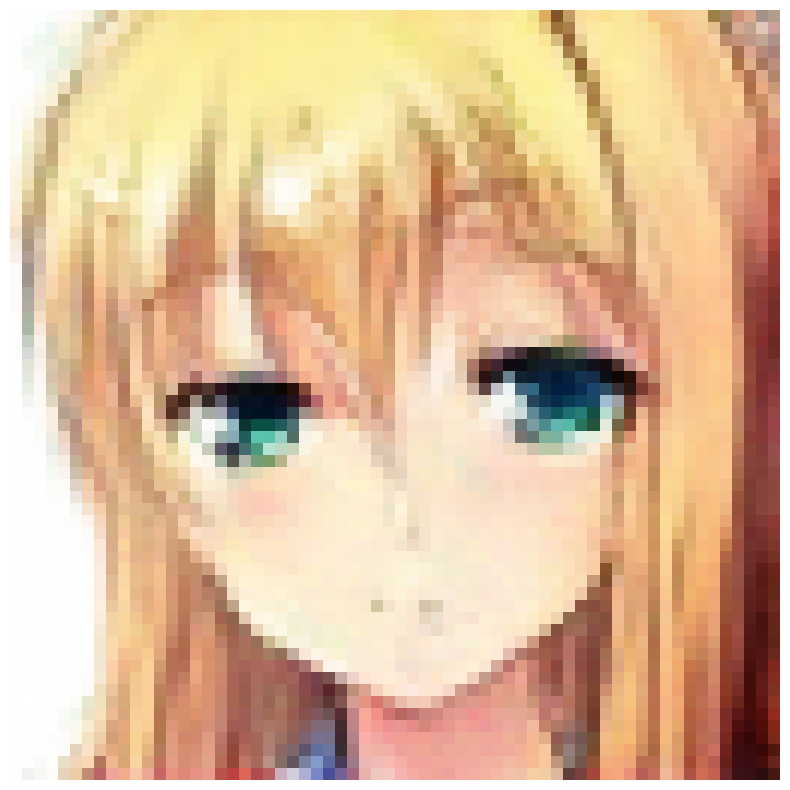

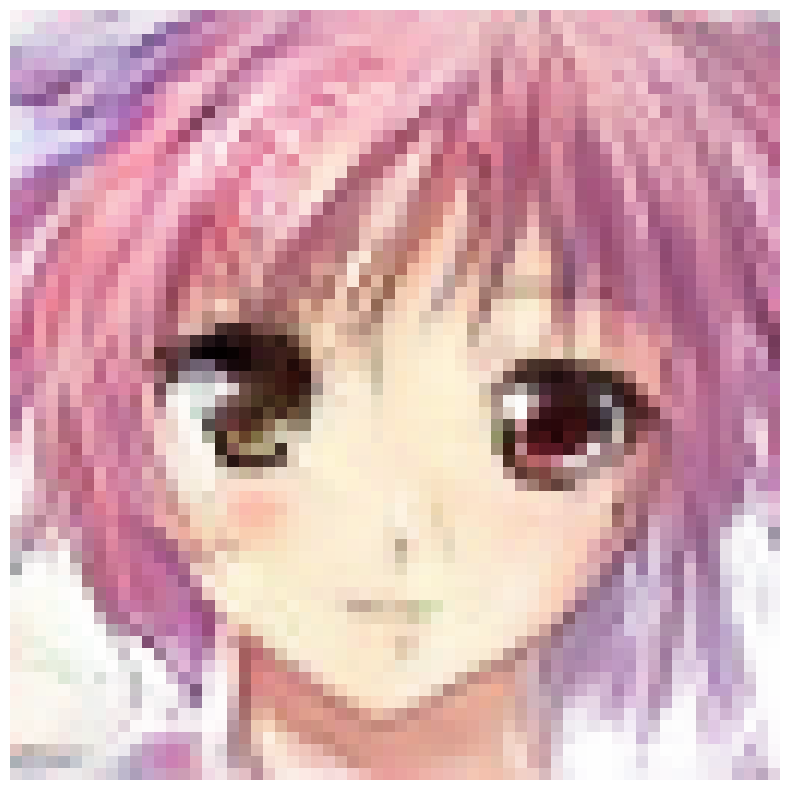

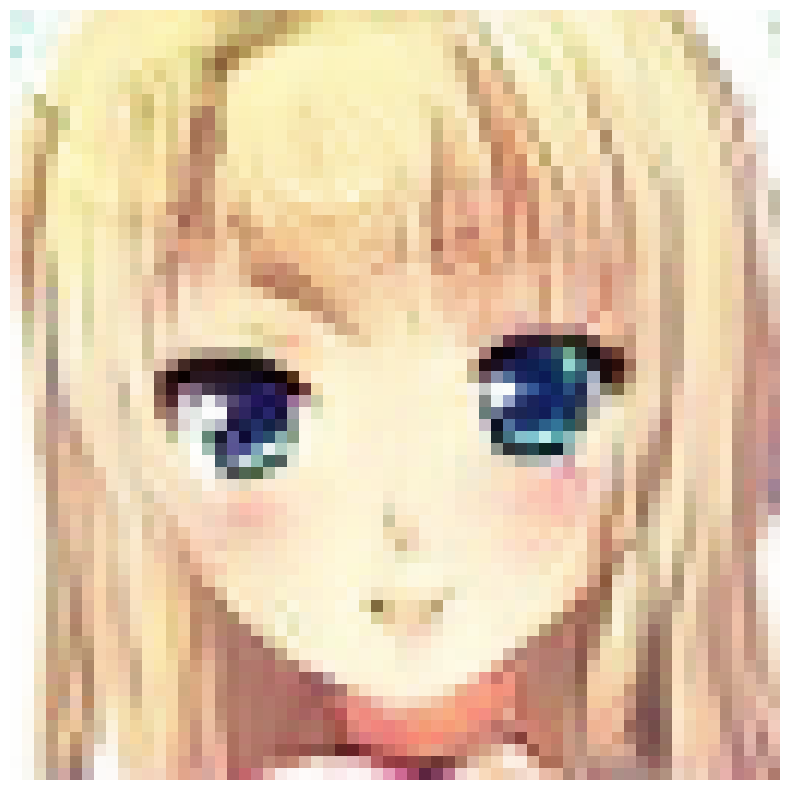

In [56]:
import numpy as np
import tensorflow as tf

# Function to normalize the tensor for display
def normalize_for_display(tensor):
    return tf.clip_by_value((tensor - tf.reduce_min(tensor)) / (tf.reduce_max(tensor) - tf.reduce_min(tensor)), 0, 1)

for n in range(10):
    # Generate a new latent vector with some values set to 1
    z = np.random.normal(0, 1, (1, 1, 1, latent_dim)).astype(np.float32)
    z[0, 0, 0, 0:35] = 1  # Modify the first 35 values

    # Convert `z` to a TensorFlow tensor
    z_tensor = tf.convert_to_tensor(z)

    # Generate image from the modified latent vector
    Xhat_dict = full_generator(z_tensor, training=False)

    # Access and normalize the generated output
    if 'conv_transpose_5' in Xhat_dict:
        Xhat = Xhat_dict['conv_transpose_5']
        Xhat = normalize_for_display(Xhat)  # Normalize for display

        # Plot the normalized image
        plot_array(Xhat)
    else:
        print("Key 'conv_transpose_5' not found in the output dictionary.")

### Exercise 3

Repeat the procedure above, but set the elements of $\mathbf{z}$ from index 0 to 35 to -1


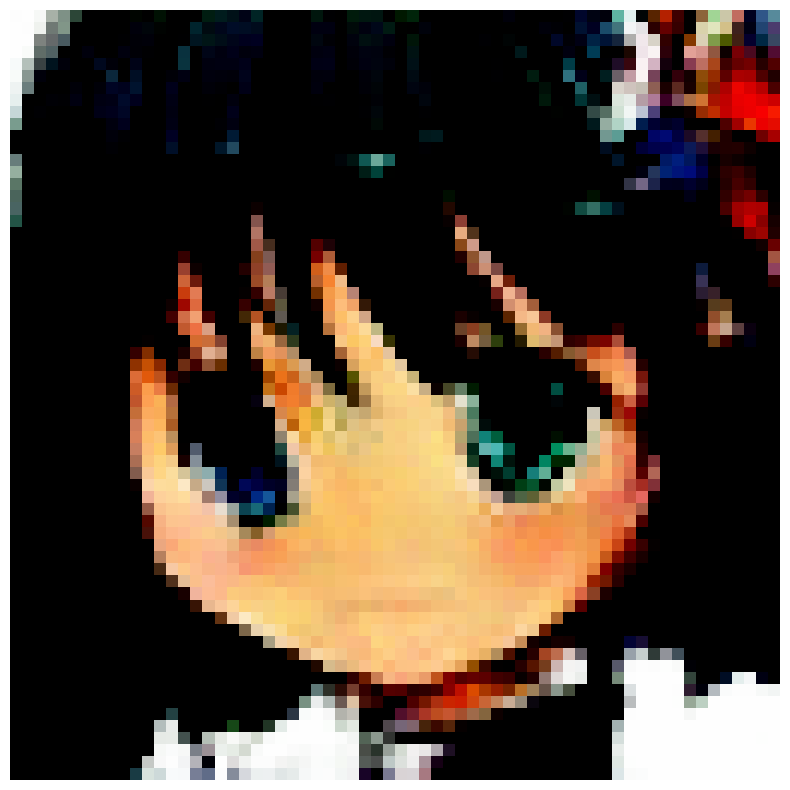

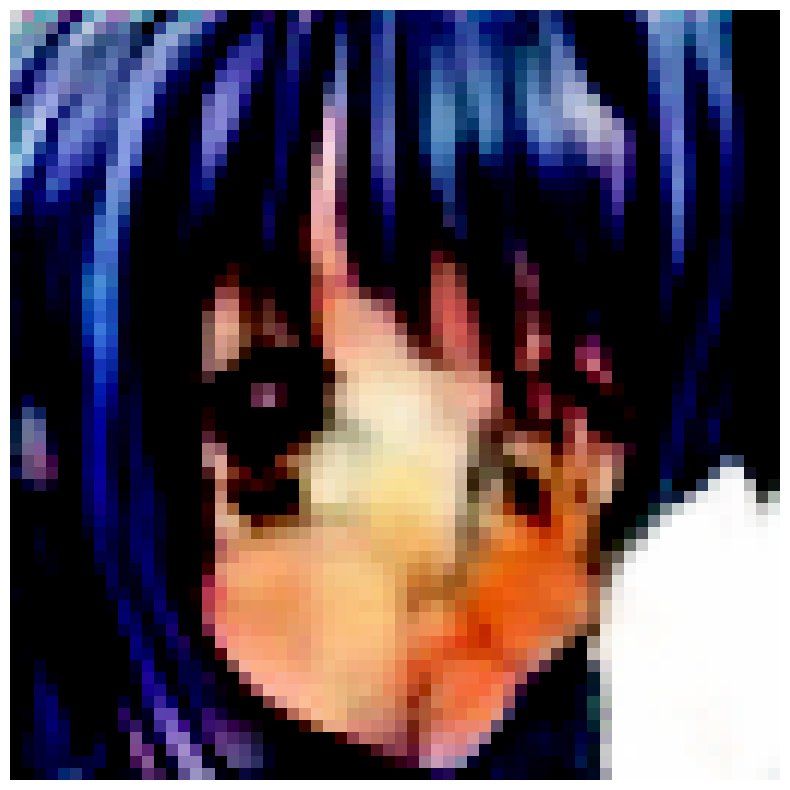

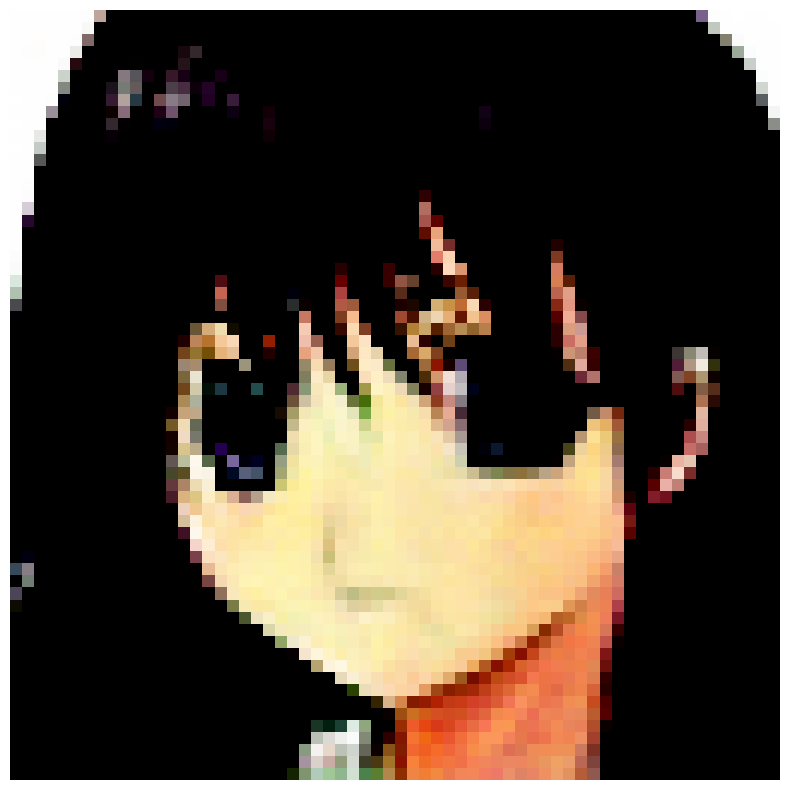

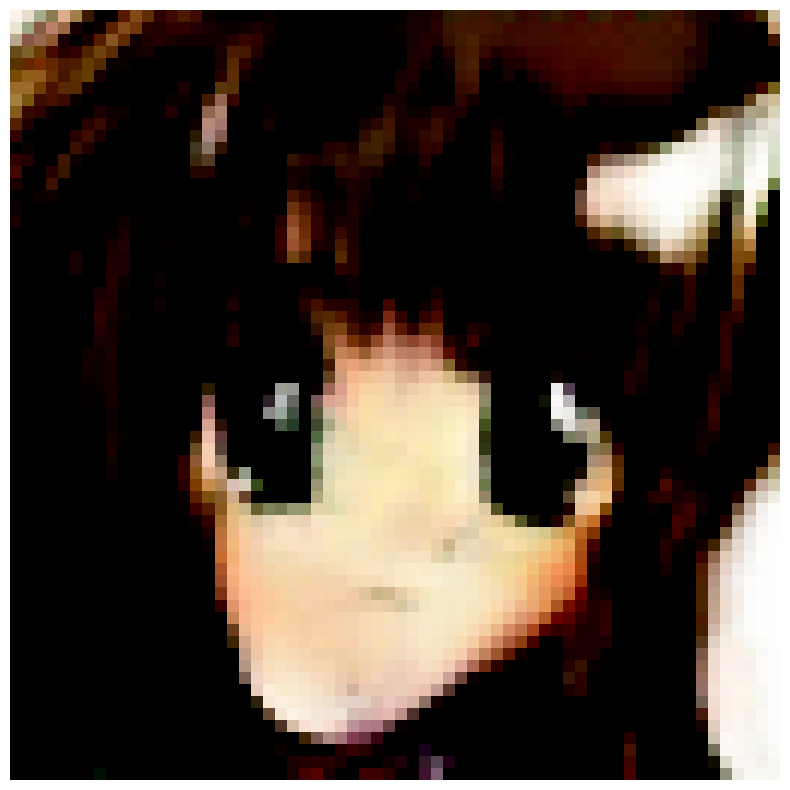

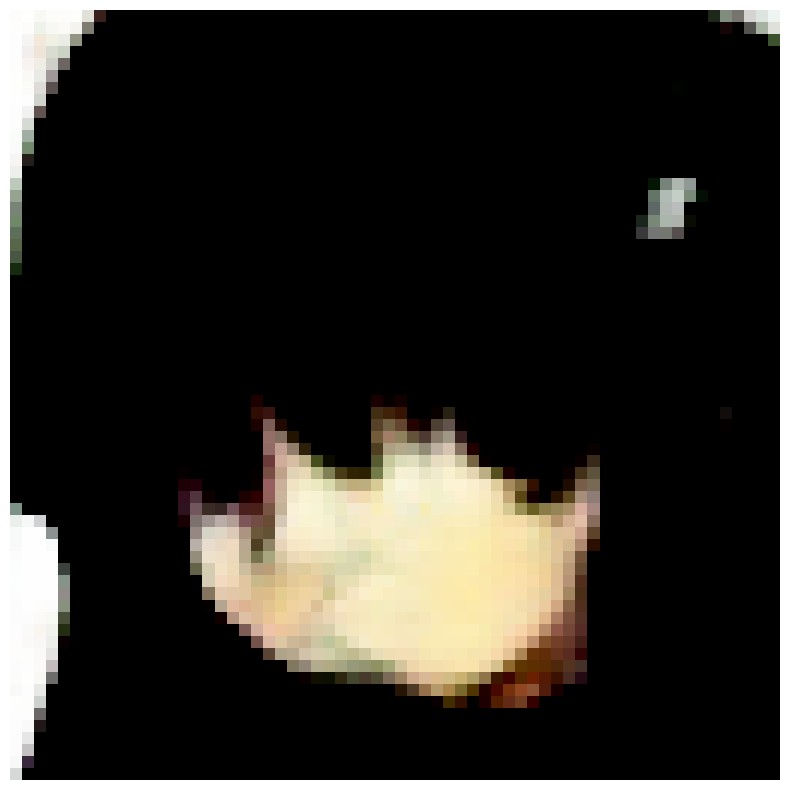

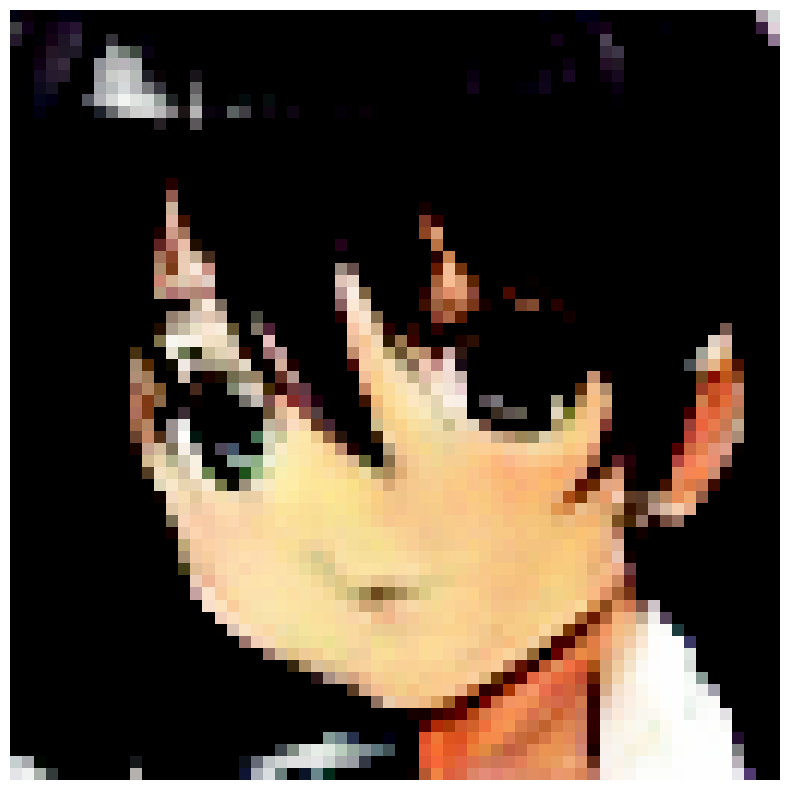

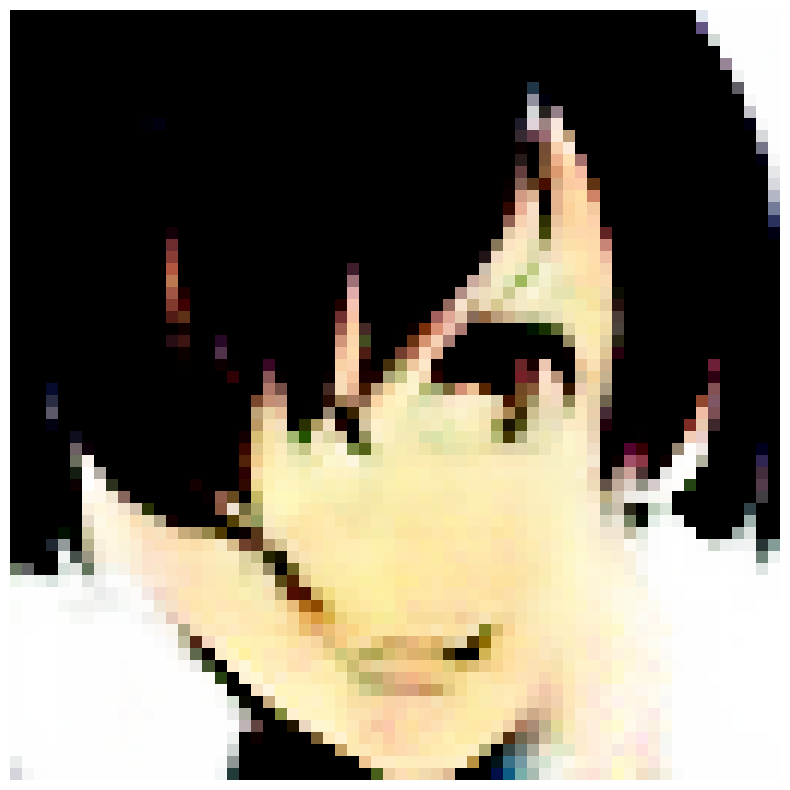

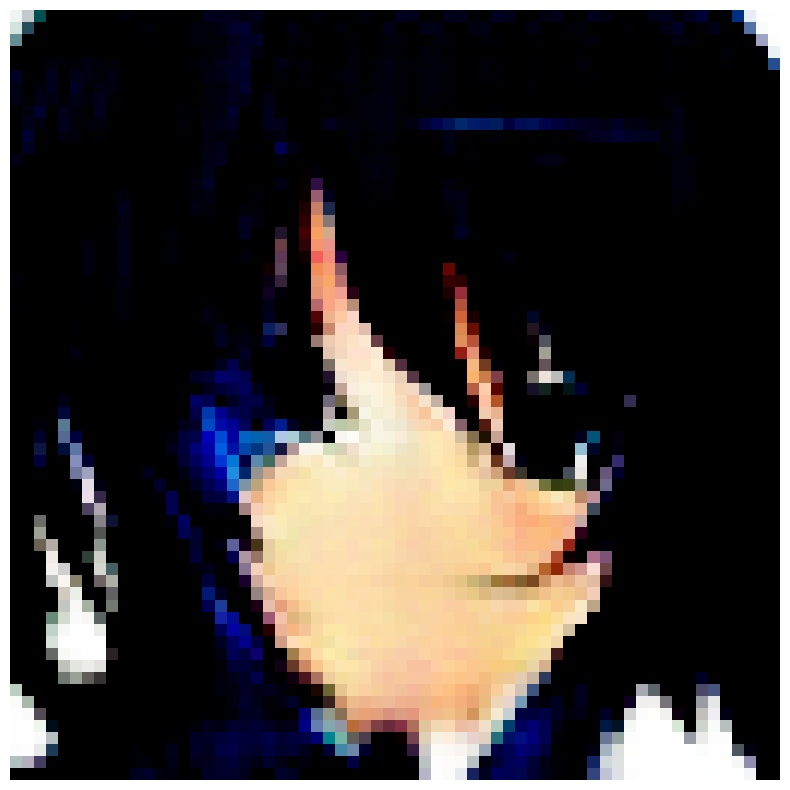

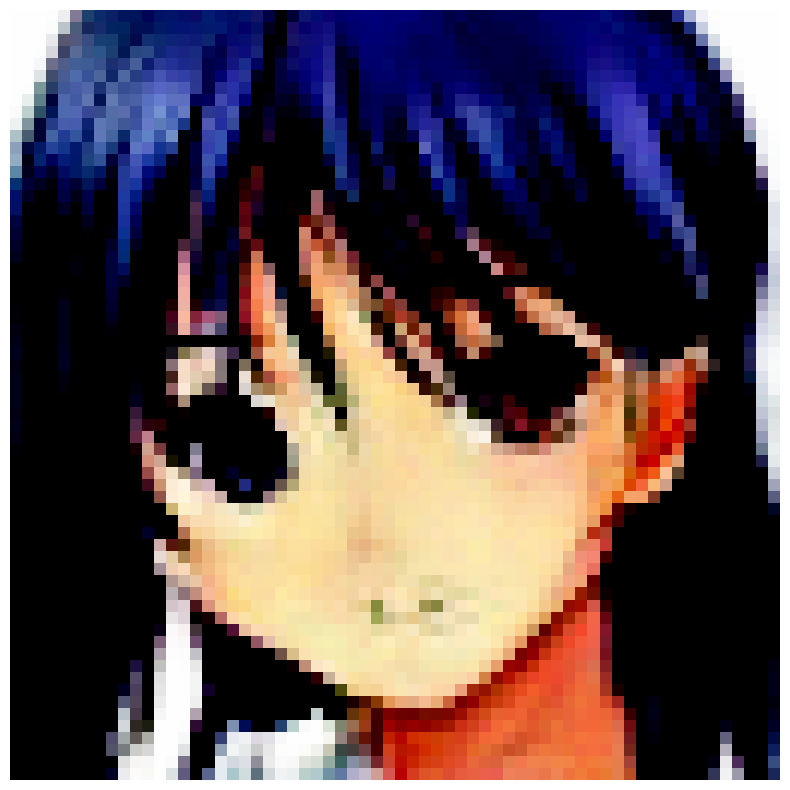

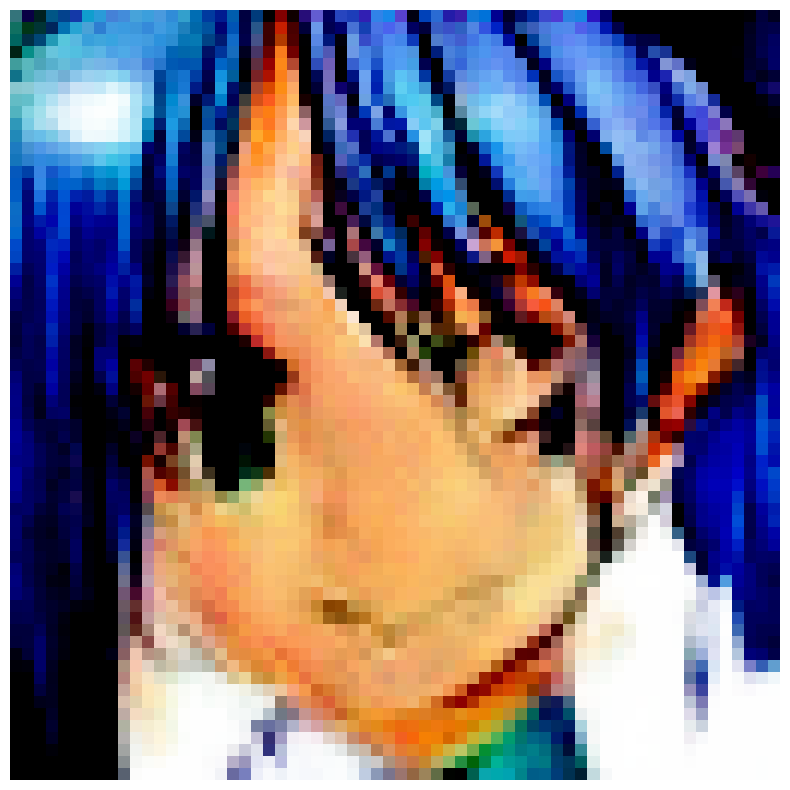

In [57]:
def generate_images_with_modified_z(n_iterations):
  """
  Menghasilkan gambar dengan elemen z yang dimodifikasi untuk setiap iterasi.

  Args:
    n_iterations: Jumlah iterasi yang akan dilakukan.

  Returns:
    Daftar gambar yang dihasilkan untuk setiap iterasi.
  """

  # Menentukan rentang elemen z yang akan dimodifikasi
  modified_indices = np.arange(0, 36)  # Inklusif untuk indeks 35

  all_images = []
  for _ in range(n_iterations):
    # Generate random latent variable
    z = np.random.normal(0, 1, (1, 1, 1, latent_dim))

    # Modify specific elements of z
    z[:, :, :, modified_indices] = -1

    # Generate image using modified z
    xhat_dict = full_generator(z, training=False) # Get the dictionary output
    xhat = xhat_dict['conv_transpose_5'] # Access the actual image tensor using its key

    # Append generated image to list
    all_images.append(xhat)

  return all_images

# Generate images for 10 iterations
images = generate_images_with_modified_z(10)

# Plot images
for image in images:
  plot_array(image) # Now plot_array will receive an array as expected

<details>
    <summary>Click here for Solution</summary>

```python

for n in range(10):
    z=np.random.normal(0, 1, (1, 1, 1, latent_dim))

    z[0,0,0,0:35]=-1

    Xhat=full_generator(z,training=False)

    plot_array(Xhat)
    

 ```   

</details>


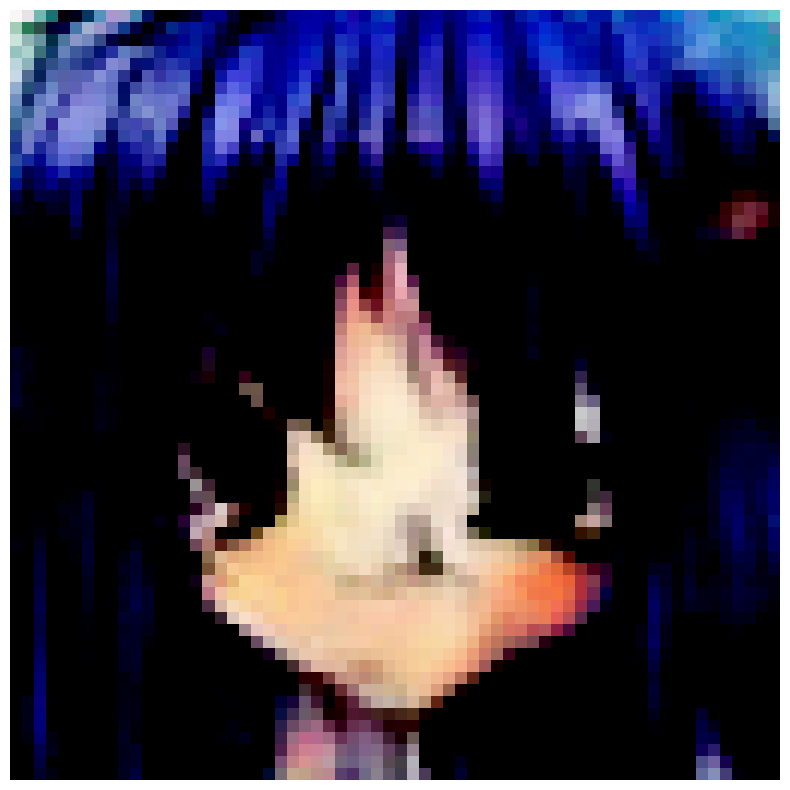

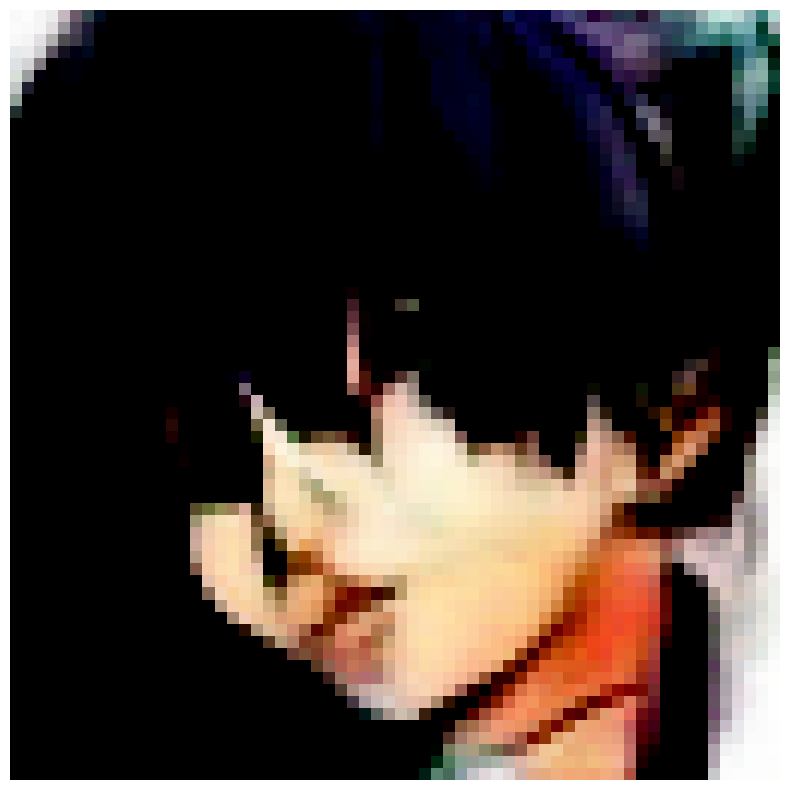

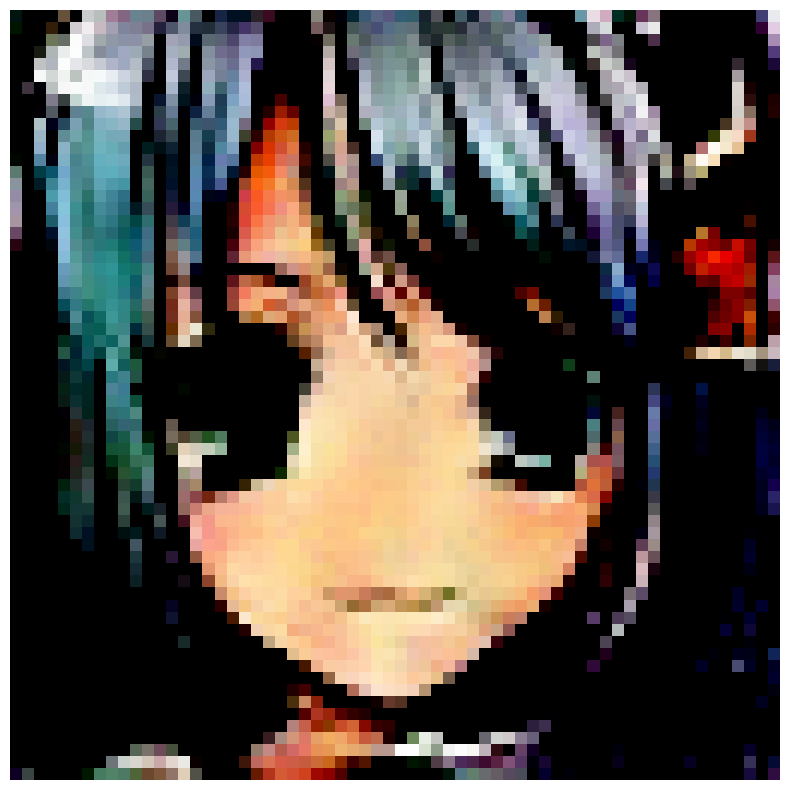

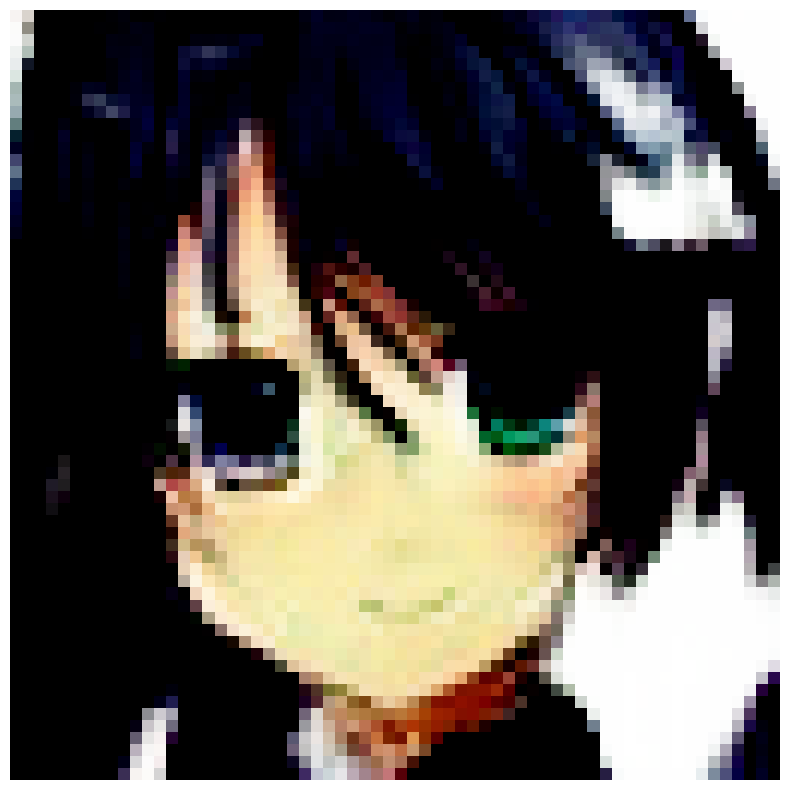

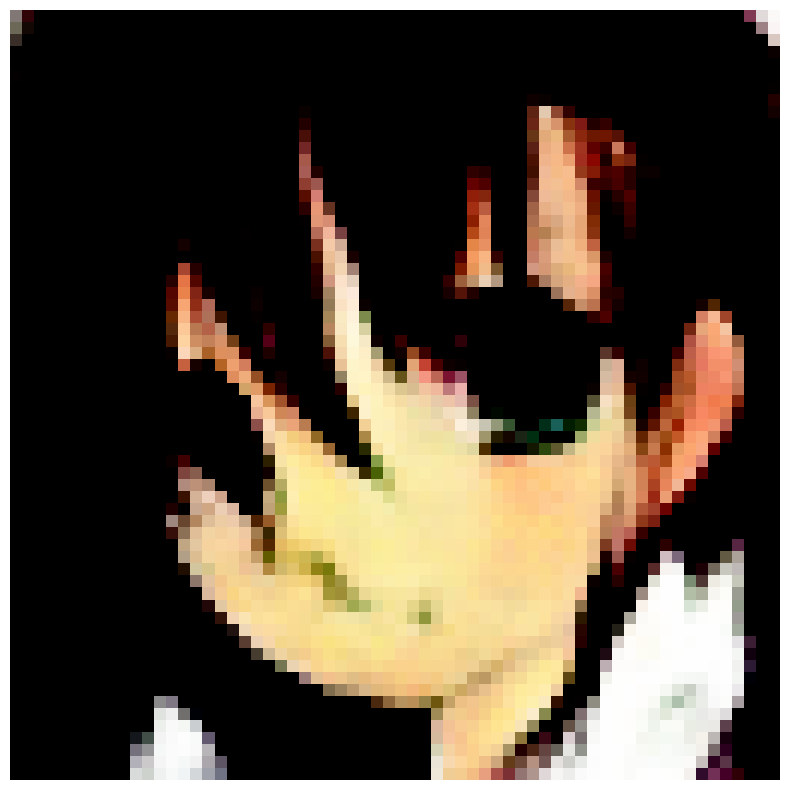

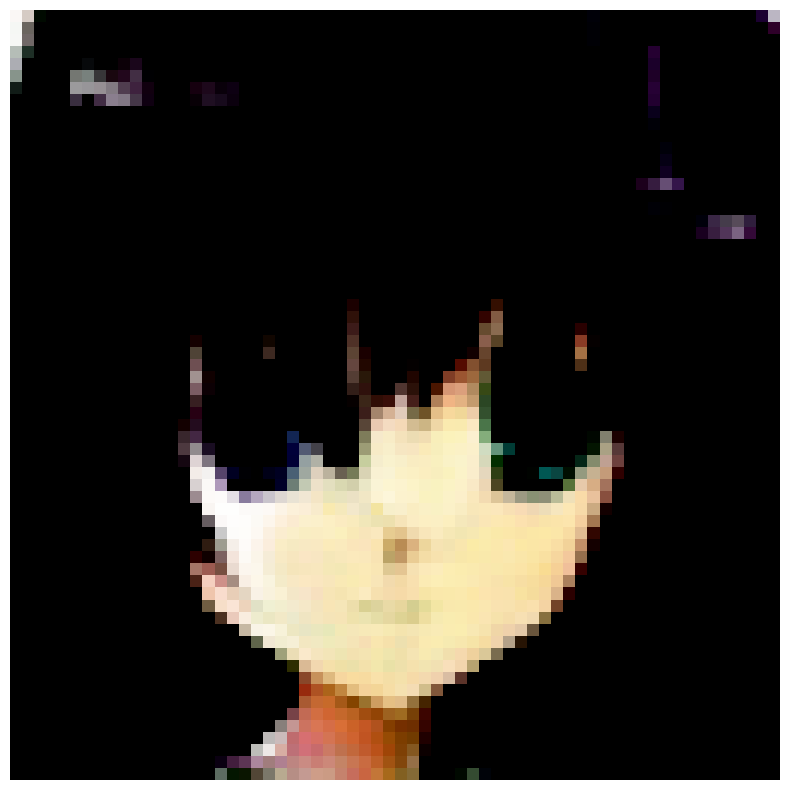

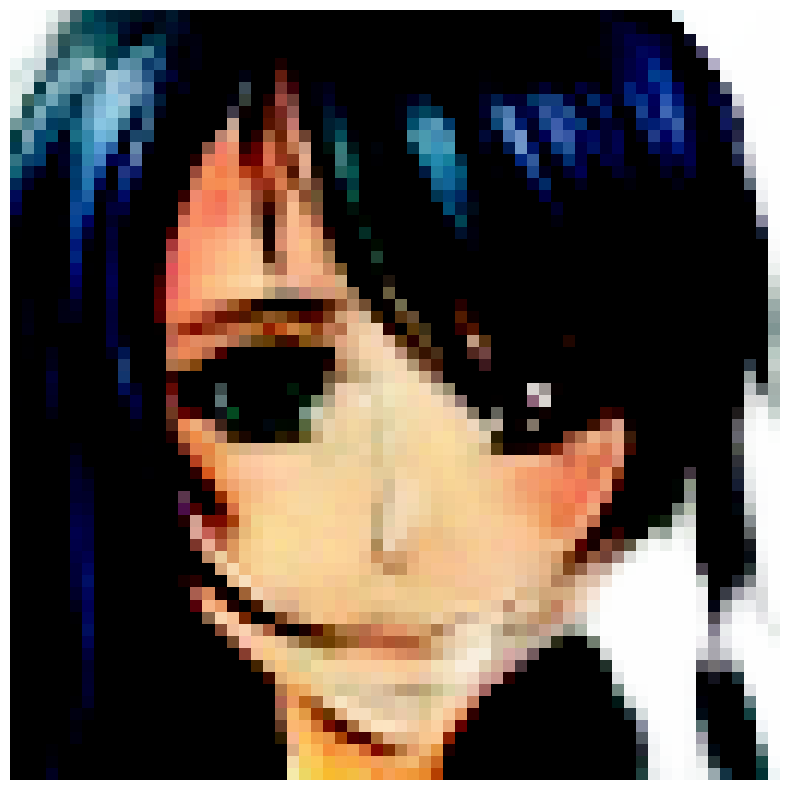

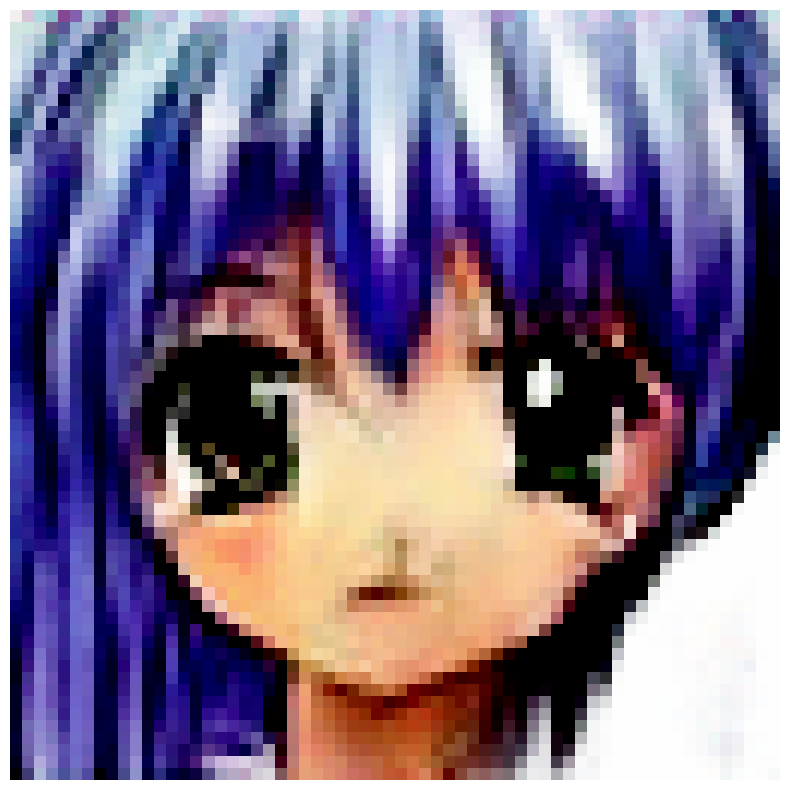

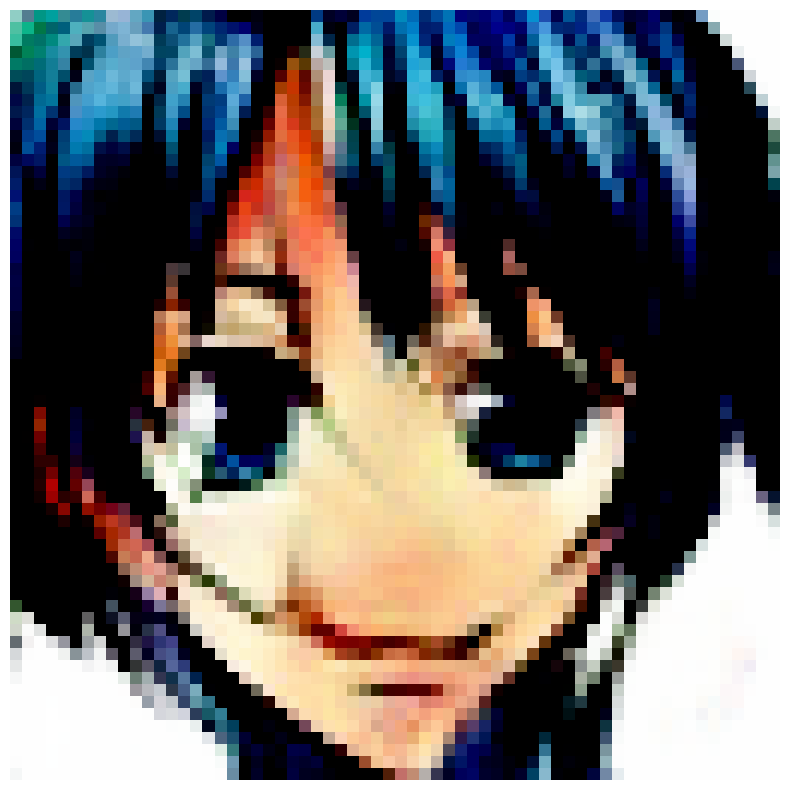

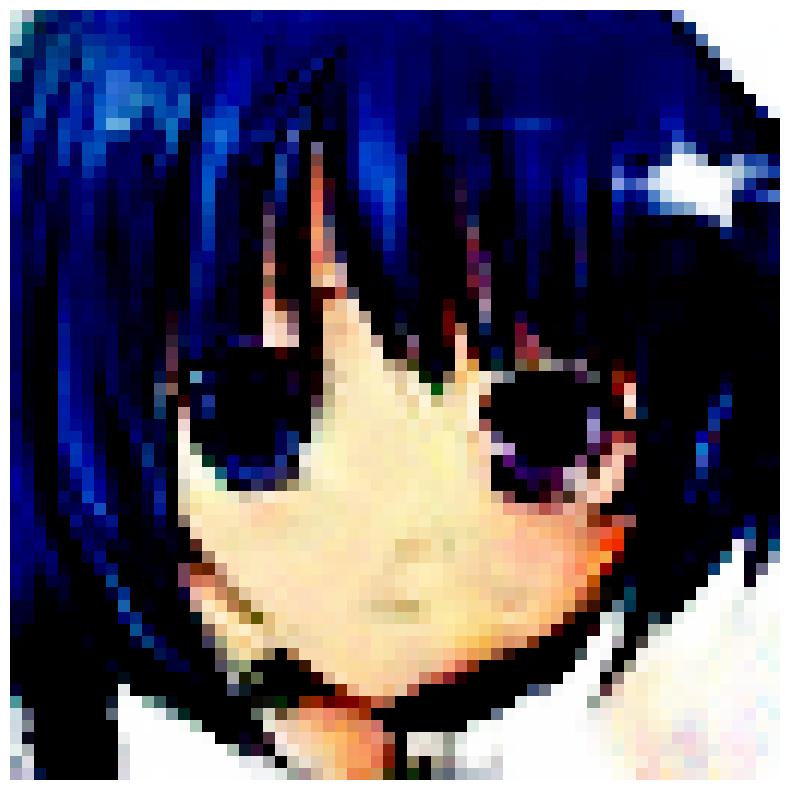

In [58]:
"""
Other Solution for Exercise 3
"""
for n in range(10):
    z=np.random.normal(0, 1, (1, 1, 1, latent_dim))

    z[0,0,0,0:35]=-1

    Xhat_dict = full_generator(z,training=False)  # Get the dictionary output
    Xhat = Xhat_dict['conv_transpose_5'] # Access the actual image tensor using its key

    plot_array(Xhat) # Pass the image tensor to plot_array

__Thank you for completing this lab!__
<center><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-GPXX0XCEEN/images/unknown5.jpeg" width="500px"></center>


----



# **ANALISIS PRIBADI**
===================================================================================================================
## **ABSTRAK**
Notebook ini menunjukkan penerapan Deep Convolutional Generative Adversarial Networks (DCGANs) untuk menciptakan karakter anime yang berbeda. DCGANs adalah tipe model generatif yang dapat memahami dan meniru distribusi data yang rumit, seperti gambar wajah anime. Notebook ini meliputi langkah-langkah pengaturan, penerapan GANs dasar, penerapan DCGANs, dan investigasi variabel laten.

### 1. **Pendahuluan**
Menciptakan karakter yang berbeda untuk setiap pemain dalam permainan video adalah tantangan besar, terutama dengan jumlah pemain yang semakin banyak. Jaringan Adversarial Generatif (GAN) memberikan solusi yang menjanjikan karena kemampuannya dalam menciptakan data baru yang mirip dengan data pelatihan. DCGANs, sebuah variasi dari GANs yang memanfaatkan Convolutional Neural Networks (CNNs), telah terbukti berhasil dalam menciptakan gambar berkualitas tinggi. Buku catatan ini dirancang untuk menerapkan DCGANs dalam menciptakan karakter anime yang berbeda.

### 2. **Setup**

### -- **Instalasi Library**
Library yang dibutuhkan untuk menjalankan notebook ini meliputi:

*  pandas (1.3.4)
*  numpy (1.21.4)
*  seaborn (0.9.0)
*  matplotlib (3.5.0)
*  scikit-learn (0.20.1)
*  skillsnetwork
*  tqdm
*  tensorflow (>= 2.9.0)

### -- **Import Library**
Setelah instalasi, library diimport ke dalam notebook:
```
import warnings
...
from tqdm import tqdm
```

### -- **Fungsi Helper**
Fungsi helper didefinisikan untuk memfasilitasi visualisasi data dan plotting array gambar.

### 3. **GANs Dasar**
Bagian ini membahas prinsip dasar dari Generative Adversarial Networks (GANs), yang terdiri dari dua komponen utama, yaitu Generator dan Discriminator. Generator bertugas menciptakan data baru, sedangkan Discriminator berfungsi untuk membedakan antara data asli dan data yang sudah dibuat. Untuk menggambarkan konsep GANs, digunakan data simulasi, dan kedua komponen ini dilatih dengan data yang terdistribusi normal. Generator diterapkan dengan memanfaatkan jaringan saraf dasar yang dibuat dengan Keras, sedangkan Discriminator diterapkan sebagai fungsi regresi logistik. Fungsi loss ditetapkan untuk menilai performa kedua jaringan ini, dan proses pelatihan GANs dijelaskan secara mendetail untuk memastikan kedua elemen tersebut dapat belajar secara bersamaan dan saling meningkatkan kualitas hasil yang dihasilkan.

### 4. **DCGANs**
Bagian ini membahas penggunaan DCGANs untuk menciptakan avatar anime yang berbeda untuk setiap pemain dalam permainan video. Dataset Anime Face yang terdapat di Kaggle digunakan sebagai data pelatihan, dengan generator data yang dirancang untuk memuat dan mengolah gambar-gambar dalam dataset ini. Arsitektur Generator dan Discriminator untuk DCGAN dijelaskan secara mendetail, dilanjutkan dengan penjelasan tentang fungsi loss yang akan dipakai untuk menilai kinerja keduanya. Proses pelatihan ini memanfaatkan optimizer Adam untuk memperbaharui parameter pada Generator dan Discriminator. Selanjutnya, fungsi langkah pelatihan dirancang untuk melaksanakan satu siklus pelatihan, dan proses pembelajaran DCGAN dijelaskan secara rinci untuk menghasilkan avatar anime yang tampak nyata.

### 5. **Eksplorasi Latent Variables**
Bagian ini berisi latihan untuk mengeksplorasi latent variables pada DCGANs dan pada proyek ini terdapat 3 latihan yang diberikan.

===================================================================================================================
## **TEKNOLOGI YANG DIGUNAKAN**

### 1. **Python**
Python merupakan bahasa pemrograman utama yang digunakan dalam notebook ini. Python dipilih karena fleksibilitasnya, ekosistem library yang luas, dan popularitasnya dalam komunitas machine learning.

### 2. **TensorFlow**
TensorFlow merupakan library machine learning open-source yang dikembangkan oleh Google. TensorFlow digunakan untuk membangun dan melatih model GANs dan DCGANs. TensorFlow menyediakan fleksibilitas dan kontrol tingkat rendah atas operasi matematika dan komputasi yang dibutuhkan untuk deep learning.

### 3. **Keras**
Keras merupakan API tingkat tinggi yang dibangun di atas TensorFlow. Keras digunakan untuk mempermudah pembuatan dan pelatihan model deep learning. Keras menyediakan antarmuka yang lebih intuitif dan mudah digunakan dibandingkan dengan TensorFlow, sehingga mempercepat proses pengembangan.

### 4. **Pandas**
Pandas adalah library Python yang digunakan untuk manipulasi dan analisis data. Pandas menyediakan struktur data yang efisien, seperti DataFrame, yang memudahkan dalam mengelola dan memproses data tabular. Dalam konteks notebook ini, Pandas dapat digunakan untuk memuat dan memproses metadata gambar, seperti nama file dan label.

### 5. **NumPy**
NumPy adalah library Python yang menyediakan dukungan untuk array multidimensi dan operasi matematika yang efisien. NumPy merupakan dasar dari banyak library machine learning di Python, termasuk TensorFlow dan Keras. Dalam konteks notebook ini, NumPy digunakan untuk melakukan operasi matematika pada data gambar, seperti normalisasi dan transformasi.

### 6. **Scikit-learn**
Scikit-learn adalah library Python yang menyediakan berbagai algoritma machine learning dan alat untuk pemrosesan data. Scikit-learn dapat digunakan untuk tugas-tugas seperti klasifikasi, regresi, clustering, dan reduksi dimensi. Dalam konteks notebook ini, Scikit-learn dapat digunakan untuk pra-pemrosesan data, seperti penskalaan fitur dan pembagian data menjadi set pelatihan dan pengujian.

### 7. **Seaborn**
Seaborn adalah library Python untuk visualisasi data statistik. Seaborn dibangun di atas Matplotlib dan menyediakan antarmuka tingkat tinggi untuk membuat plot yang informatif dan menarik secara visual. Dalam konteks notebook ini, Seaborn dapat digunakan untuk memvisualisasikan distribusi data, seperti histogram dan plot kepadatan.

### 8. **Matplotlib**
Matplotlib adalah library Python untuk membuat plot dan visualisasi data. Matplotlib menyediakan berbagai jenis plot, seperti plot garis, plot sebar, histogram, dan plot kotak. Dalam konteks notebook ini, Matplotlib digunakan untuk memvisualisasikan gambar yang dihasilkan oleh DCGANs dan untuk membuat plot yang menunjukkan kinerja model selama pelatihan.

### 9. **tqdm**
tqdm adalah library Python yang menyediakan progress bar untuk loop dan iterasi. tqdm memudahkan dalam memantau kemajuan proses yang berjalan lama, seperti pelatihan model machine learning. Dalam konteks notebook ini, tqdm digunakan untuk menampilkan progress bar selama pelatihan DCGANs.

### 10. **SkillsNetwork**
SkillsNetwork adalah library yang disediakan oleh platform pembelajaran online untuk mengunduh dataset dan materi pembelajaran lainnya. Dalam konteks notebook ini, SkillsNetwork digunakan untuk mengunduh dataset Anime Face dari Kaggle.

===================================================================================================================

## **ANALISIS TEKNOLOGI YANG DIGUNAKAN**

### 1. **TensorFlow dan Keras**  
Pilihan TensorFlow dan Keras untuk membangun dan melatih DCGANs didasarkan pada beberapa faktor:

### -- **Fleksibilitas dan Kontrol**
TensorFlow menyediakan fleksibilitas dan kontrol tingkat rendah atas operasi matematika dan komputasi yang dibutuhkan untuk deep learning. Hal ini memungkinkan untuk mengimplementasikan arsitektur model yang kompleks dan menyesuaikan proses pelatihan sesuai kebutuhan.

### -- **API Tingkat Tinggi**
Keras menyediakan API tingkat tinggi yang mudah digunakan, yang menyederhanakan proses pembuatan dan pelatihan model. Keras memungkinkan untuk mendefinisikan model dengan cara yang lebih intuitif dan mengurangi jumlah kode yang dibutuhkan.

### -- **Ekosistem yang Luas**
TensorFlow dan Keras didukung oleh ekosistem library dan alat yang luas, yang memudahkan dalam melakukan tugas-tugas seperti pra-pemrosesan data, visualisasi, dan deployment model.

### -- **Popularitas**
TensorFlow dan Keras merupakan library machine learning yang populer dan banyak digunakan dalam industri dan penelitian. Hal ini menjamin ketersediaan sumber daya dan dukungan komunitas yang luas.

### 2. **Convolutional Neural Networks (CNNs)**
Penggunaan CNNs dalam DCGANs didasarkan pada kemampuan CNNs untuk mengekstrak fitur hierarkis dari data gambar. CNNs telah terbukti sangat efektif dalam tugas-tugas computer vision, seperti klasifikasi gambar, deteksi objek, dan segmentasi gambar. Dalam konteks DCGANs, CNNs digunakan dalam Generator dan Discriminator untuk memproses dan menghasilkan gambar.

### 3. **Adam Optimizer**
Adam optimizer dipilih untuk melatih DCGANs karena konvergensinya yang cepat dan stabil. Adam optimizer merupakan algoritma optimasi berbasis gradien yang menggabungkan keuntungan dari algoritma momentum dan RMSprop. Adam optimizer secara adaptif menyesuaikan learning rate untuk setiap parameter, yang membantu dalam mencapai konvergensi yang lebih cepat dan menghindari osilasi selama pelatihan.

### 4. **Batch Normalization**
Batch normalization digunakan dalam DCGANs untuk menstabilkan proses pelatihan dan meningkatkan kinerja model. Batch normalization menormalkan aktivasi di setiap lapisan, yang membantu dalam mengurangi internal covariate shift dan mempercepat konvergensi. Batch normalization juga memungkinkan untuk menggunakan learning rate yang lebih besar dan mengurangi overfitting.

### 5. **Fungsi Aktivasi**
Pilihan fungsi aktivasi dalam DCGANs didasarkan pada karakteristik dan kinerja masing-masing fungsi aktivasi. ReLU digunakan dalam Generator karena kemampuannya untuk mempercepat pelatihan dan menghindari vanishing gradient problem. LeakyReLU digunakan dalam Discriminator karena kemampuannya untuk menghindari dying ReLU problem, dimana neuron menjadi tidak aktif dan tidak lagi belajar. Tanh digunakan sebagai fungsi aktivasi pada lapisan output Generator untuk menghasilkan nilai dalam rentang [-1, 1], yang sesuai dengan rentang nilai piksel gambar yang dinormalisasi. Sigmoid digunakan sebagai fungsi aktivasi pada lapisan output Discriminator untuk menghasilkan probabilitas bahwa input adalah gambar asli.

### 6. **Library Pendukung**
Library pendukung seperti Pandas, NumPy, Scikit-learn, Seaborn, dan Matplotlib dipilih karena fungsinya yang penting dalam pra-pemrosesan data, manipulasi data, visualisasi, dan analisis data. Pandas memudahkan dalam mengelola dan memproses data tabular, NumPy menyediakan dukungan untuk array multidimensi dan operasi matematika yang efisien, Scikit-learn menyediakan berbagai algoritma machine learning dan alat untuk pemrosesan data, Seaborn menyediakan antarmuka tingkat tinggi untuk membuat plot yang informatif dan menarik secara visual, dan Matplotlib menyediakan berbagai jenis plot untuk visualisasi data.

### 7. **tqdm**
tqdm digunakan untuk meningkatkan pengalaman pengguna dengan menampilkan progress bar selama proses pelatihan yang berjalan lama. Progress bar memberikan indikasi visual tentang kemajuan pelatihan dan perkiraan waktu yang dibutuhkan untuk menyelesaikan pelatihan. Hal ini memudahkan pengguna untuk memantau proses pelatihan dan mengidentifikasi potensi masalah, seperti pelatihan yang terlalu lambat atau terhenti.

### 8. **SkillsNetwork**
SkillsNetwork digunakan untuk menyediakan akses mudah ke dataset Anime Face yang digunakan dalam notebook ini. SkillsNetwork merupakan platform pembelajaran online yang menyediakan berbagai dataset dan materi pembelajaran lainnya. Dengan menggunakan SkillsNetwork, pengguna dapat dengan mudah mengunduh dataset yang dibutuhkan tanpa harus mencari dan mengunduh secara manual.

### 9. **Google Colab**
Notebook ini dirancang untuk dijalankan di Google Colab, platform cloud untuk machine learning dan data science. Google Colab menyediakan lingkungan pengembangan yang mudah digunakan dengan akses gratis ke GPU dan TPU, yang mempercepat proses pelatihan model deep learning. Google Colab juga memudahkan dalam berbagi dan berkolaborasi pada notebook, yang meningkatkan reproduksibilitas dan kolaborasi dalam proyek machine learning.

===================================================================================================================

## **Kesimpulan**

Pemilihan teknologi dalam notebook ini didasarkan pada pertimbangan yang matang tentang kinerja, efisiensi, kemudahan penggunaan, dan dukungan komunitas. TensorFlow dan Keras dipilih sebagai kerangka kerja deep learning utama karena fleksibilitas, API tingkat tinggi, ekosistem yang luas, dan popularitasnya. CNNs digunakan untuk mengekstrak fitur hierarkis dari data gambar, Adam optimizer dipilih untuk konvergensinya yang cepat dan stabil, dan batch normalization digunakan untuk menstabilkan proses pelatihan. Library pendukung seperti Pandas, NumPy, Scikit-learn, Seaborn, dan Matplotlib digunakan untuk pra-pemrosesan data, manipulasi data, visualisasi, dan analisis data. tqdm digunakan untuk meningkatkan pengalaman pengguna dengan menampilkan progress bar, SkillsNetwork digunakan untuk menyediakan akses mudah ke dataset, dan Google Colab dipilih sebagai platform pengembangan karena kemudahan penggunaan, akses ke sumber daya komputasi, dan fitur kolaborasi.



## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01" target="_blank">Joseph Santarcangelo</a> has a Ph.D. in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

[Roxanne Li](https://www.linkedin.com/in/roxanne-li/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01) is a Data Science intern at IBM Skills Network, entering level-5 study in the Mathematics & Statistics undergraduate Coop program at McMaster University.

[Junxing(J.C.) Chen](https://www.linkedin.com/in/junxing-chen-3591a4162/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0XCEEN72-2022-01-01) is a Data Scientist at IBM with strong interests in machine learning and cutting-edge technologies.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By  | Change Description |
| ----------------- | ------- | ----------- | ------------------ |
| 2022-08-30        | 0.1     | Joseph Santarcangelo  | Created Lab       |
| 2022-09-06        | 0.1     | Roxanne Li  | Reviewed and edited Lab       |
| 2022-09-23        | 0.1     | Steve Hord  | QA pass edits                 |
| 2022-10-11        | 0.2     | Junxing(J.C.) Chen  | Reviewed and edited Lab       |


Copyright © 2022 IBM Corporation. All rights reserved.
